In [ ]:
import seaborn as sns
import tensorflow
import keras
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization,GlobalMaxPooling2D

#sequential import
from keras.models import Sequential

import os

from google.colab.patches import cv2_imshow




In [ ]:
import zipfile

# Specify the name of the zipped file
zip_file_name = "/content/drive/MyDrive/images_with_product_ids.zip"

# Open the zipped file
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    # Extract all files to a specific directory
    zip_ref.extractall()















In [ ]:
model=ResNet50(weights='imagenet',include_top=False,input_shape=(224,224,3))

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
model.trainable=False

In [ ]:
model=tensorflow.keras.Sequential([
    model,
    # Flatten(),

    GlobalMaxPooling2D()
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_max_pooling2d (Globa  (None, 2048)             0         
 lMaxPooling2D)                                                  
                                                                 
Total params: 23,587,712
Trainable params: 0
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# read the image
img = cv2.imread(r"/content/images_with_product_ids/10037.jpg")

img_array=np.array(img)
# img_array=np.expand_dims(img_array,axis=0)
img_array.shape

img_array=cv2.resize(img_array,(224,224))
img_array.shape

# plt.imshow(img_array)



(224, 224, 3)

In [ ]:
# we want ( no of images,224,224,3) as input dimension to train the model

img_expand=np.expand_dims(img_array,axis=0)
img_expand.shape

img_preprocess=preprocess_input(img_expand)
img_preprocess.shape



(1, 224, 224, 3)

In [ ]:
result=(model.predict(img_preprocess)).flatten()

1/1 [==============================] - 9s 9s/step


In [ ]:
result

array([0.       , 0.       , 7.193302 , ..., 1.7917067, 2.2441459,
       9.473214 ], dtype=float32)

In [ ]:
result.shape

(2048,)

In [ ]:
# lets do flatten the result

#lets import norm from numpy
from numpy.linalg import norm

result_norm=result/norm(result)
result_norm



array([0.        , 0.        , 0.02112757, ..., 0.00526245, 0.00659132,
       0.02782394], dtype=float32)

In [ ]:
# lets write all above steps in a function

def feature_extraction(img_path,model):
    img=cv2.imread(img_path)
    img_array=np.array(img)
    img_array=cv2.resize(img_array,(224,224))
    img_expand=np.expand_dims(img_array,axis=0)
    img_preprocess=preprocess_input(img_expand)
    result=(model.predict(img_preprocess)).flatten()
    result_norm=result/norm(result)
    return result_norm



In [ ]:
# lets extract all files from the folder

# Path: feature_extraction.ipynb
import os
import numpy as np
filename=[]
feature_list=[]

for file in os.listdir(r"/content/images_with_product_ids"):
    filename.append(os.path.join(r"/content/images_with_product_ids",file))
    # feature_list.append(feature_extraction(os.path.join(r"C:\Users\viswa\OneDrive\Desktop\archive"),model))


filename

['/content/images_with_product_ids/32812.jpg',
 '/content/images_with_product_ids/37249.jpg',
 '/content/images_with_product_ids/38986.jpg',
 '/content/images_with_product_ids/9053.jpg',
 '/content/images_with_product_ids/24937.jpg',
 '/content/images_with_product_ids/5343.jpg',
 '/content/images_with_product_ids/33515.jpg',
 '/content/images_with_product_ids/37547.jpg',
 '/content/images_with_product_ids/34039.jpg',
 '/content/images_with_product_ids/48243.jpg',
 '/content/images_with_product_ids/4343.jpg',
 '/content/images_with_product_ids/45385.jpg',
 '/content/images_with_product_ids/39011.jpg',
 '/content/images_with_product_ids/23624.jpg',
 '/content/images_with_product_ids/33252.jpg',
 '/content/images_with_product_ids/34006.jpg',
 '/content/images_with_product_ids/5415.jpg',
 '/content/images_with_product_ids/40987.jpg',
 '/content/images_with_product_ids/36319.jpg',
 '/content/images_with_product_ids/43588.jpg',
 '/content/images_with_product_ids/31978.jpg',
 '/content/images

In [ ]:
# feature extraction
from tqdm import tqdm


for file in tqdm(filename):
    feature_list.append(feature_extraction(file,model))


  0%|          | 0/2906 [00:00<?, ?it/s]

1/1 [==============================] - 0s 25ms/step


  0%|          | 1/2906 [00:00<05:13,  9.27it/s]

1/1 [==============================] - 0s 39ms/step


  0%|          | 2/2906 [00:00<05:47,  8.36it/s]

1/1 [==============================] - 0s 35ms/step


  0%|          | 3/2906 [00:00<06:55,  6.99it/s]

1/1 [==============================] - 0s 36ms/step


  0%|          | 4/2906 [00:00<07:37,  6.34it/s]

1/1 [==============================] - 0s 40ms/step


  0%|          | 5/2906 [00:00<08:01,  6.03it/s]

1/1 [==============================] - 0s 37ms/step


  0%|          | 6/2906 [00:00<08:06,  5.96it/s]

1/1 [==============================] - 0s 47ms/step


  0%|          | 7/2906 [00:01<07:40,  6.30it/s]

1/1 [==============================] - 0s 38ms/step


  0%|          | 8/2906 [00:01<07:08,  6.76it/s]

1/1 [==============================] - 0s 37ms/step


  0%|          | 9/2906 [00:01<06:50,  7.05it/s]

1/1 [==============================] - 0s 39ms/step


  0%|          | 10/2906 [00:01<06:38,  7.28it/s]

1/1 [==============================] - 0s 37ms/step


  0%|          | 11/2906 [00:01<07:30,  6.43it/s]

1/1 [==============================] - 0s 34ms/step


  0%|          | 12/2906 [00:01<07:06,  6.79it/s]

1/1 [==============================] - 0s 36ms/step


  0%|          | 13/2906 [00:01<07:10,  6.72it/s]

1/1 [==============================] - 0s 37ms/step


  0%|          | 14/2906 [00:02<07:33,  6.38it/s]

1/1 [==============================] - 0s 34ms/step


  1%|          | 15/2906 [00:02<07:48,  6.17it/s]

1/1 [==============================] - 0s 33ms/step


  1%|          | 16/2906 [00:02<07:14,  6.66it/s]

1/1 [==============================] - 0s 45ms/step


  1%|          | 17/2906 [00:02<08:00,  6.02it/s]

1/1 [==============================] - 0s 34ms/step


  1%|          | 18/2906 [00:02<08:24,  5.73it/s]

1/1 [==============================] - 0s 40ms/step


  1%|          | 19/2906 [00:02<08:39,  5.55it/s]

1/1 [==============================] - 0s 34ms/step


  1%|          | 20/2906 [00:03<08:40,  5.54it/s]

1/1 [==============================] - 0s 36ms/step


  1%|          | 21/2906 [00:03<07:57,  6.04it/s]

1/1 [==============================] - 0s 35ms/step


  1%|          | 22/2906 [00:03<07:16,  6.60it/s]

1/1 [==============================] - 0s 48ms/step


  1%|          | 23/2906 [00:03<08:03,  5.97it/s]

1/1 [==============================] - 0s 31ms/step


  1%|          | 24/2906 [00:03<07:27,  6.44it/s]

1/1 [==============================] - 0s 24ms/step


  1%|          | 25/2906 [00:03<07:06,  6.76it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 27/2906 [00:04<06:00,  7.99it/s]

1/1 [==============================] - 0s 25ms/step


  1%|          | 28/2906 [00:04<06:00,  7.99it/s]

1/1 [==============================] - 0s 25ms/step


  1%|          | 30/2906 [00:04<05:00,  9.58it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 31/2906 [00:04<05:07,  9.34it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 32/2906 [00:04<05:24,  8.87it/s]

1/1 [==============================] - 0s 27ms/step


  1%|          | 33/2906 [00:04<05:16,  9.07it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 34/2906 [00:04<05:39,  8.46it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 36/2906 [00:05<05:27,  8.77it/s]

1/1 [==============================] - 0s 26ms/step


  1%|▏         | 38/2906 [00:05<05:13,  9.16it/s]

1/1 [==============================] - 0s 22ms/step


  1%|▏         | 40/2906 [00:05<05:02,  9.47it/s]

1/1 [==============================] - 0s 23ms/step


  1%|▏         | 41/2906 [00:05<05:10,  9.24it/s]

1/1 [==============================] - 0s 23ms/step


  1%|▏         | 43/2906 [00:05<04:53,  9.76it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 44/2906 [00:05<05:11,  9.20it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 45/2906 [00:06<05:31,  8.63it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 47/2906 [00:06<04:56,  9.65it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 48/2906 [00:06<05:09,  9.25it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 50/2906 [00:06<05:00,  9.51it/s]

1/1 [==============================] - 0s 37ms/step


  2%|▏         | 51/2906 [00:06<05:17,  8.99it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 53/2906 [00:06<05:18,  8.97it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 54/2906 [00:07<05:24,  8.79it/s]

1/1 [==============================] - 0s 25ms/step


  2%|▏         | 55/2906 [00:07<05:25,  8.76it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 56/2906 [00:07<05:27,  8.70it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 57/2906 [00:07<05:43,  8.29it/s]

1/1 [==============================] - 0s 25ms/step


  2%|▏         | 59/2906 [00:07<04:52,  9.73it/s]

1/1 [==============================] - 0s 31ms/step


  2%|▏         | 61/2906 [00:07<04:39, 10.17it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 63/2906 [00:07<04:48,  9.85it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 64/2906 [00:08<05:03,  9.35it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 66/2906 [00:08<04:55,  9.62it/s]

1/1 [==============================] - 0s 31ms/step


  2%|▏         | 67/2906 [00:08<05:12,  9.09it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 69/2906 [00:08<04:55,  9.59it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 70/2906 [00:08<05:09,  9.15it/s]

1/1 [==============================] - 0s 28ms/step


  2%|▏         | 71/2906 [00:08<05:15,  8.98it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 72/2906 [00:08<05:26,  8.68it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 74/2906 [00:09<04:48,  9.80it/s]

1/1 [==============================] - 0s 26ms/step


  3%|▎         | 76/2906 [00:09<04:57,  9.52it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 77/2906 [00:09<05:09,  9.15it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 78/2906 [00:09<05:07,  9.21it/s]

1/1 [==============================] - 0s 28ms/step


  3%|▎         | 80/2906 [00:09<04:45,  9.91it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 82/2906 [00:09<04:36, 10.20it/s]

1/1 [==============================] - 0s 25ms/step


  3%|▎         | 84/2906 [00:10<04:30, 10.44it/s]

1/1 [==============================] - 0s 25ms/step


  3%|▎         | 86/2906 [00:10<05:01,  9.36it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 88/2906 [00:10<05:04,  9.25it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 89/2906 [00:10<05:11,  9.04it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 90/2906 [00:10<05:14,  8.97it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 91/2906 [00:10<05:21,  8.75it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 93/2906 [00:11<04:53,  9.57it/s]

1/1 [==============================] - 0s 25ms/step


  3%|▎         | 94/2906 [00:11<05:07,  9.14it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 95/2906 [00:11<05:19,  8.81it/s]

1/1 [==============================] - 0s 26ms/step


  3%|▎         | 97/2906 [00:11<04:52,  9.61it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 98/2906 [00:11<05:03,  9.24it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 100/2906 [00:11<04:50,  9.65it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 101/2906 [00:12<04:48,  9.72it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▎         | 103/2906 [00:12<04:53,  9.56it/s]

1/1 [==============================] - 0s 24ms/step


  4%|▎         | 105/2906 [00:12<04:34, 10.21it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▎         | 107/2906 [00:12<04:30, 10.35it/s]

1/1 [==============================] - 0s 37ms/step


  4%|▍         | 109/2906 [00:12<05:05,  9.17it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▍         | 110/2906 [00:12<05:13,  8.92it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▍         | 111/2906 [00:13<05:12,  8.95it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▍         | 113/2906 [00:13<04:38, 10.03it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 115/2906 [00:13<04:45,  9.79it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▍         | 116/2906 [00:13<04:55,  9.44it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 117/2906 [00:13<05:03,  9.18it/s]

1/1 [==============================] - 0s 42ms/step


  4%|▍         | 118/2906 [00:13<05:34,  8.34it/s]

1/1 [==============================] - 0s 34ms/step


  4%|▍         | 119/2906 [00:14<06:31,  7.12it/s]

1/1 [==============================] - 0s 33ms/step


  4%|▍         | 120/2906 [00:14<06:56,  6.68it/s]

1/1 [==============================] - 0s 34ms/step


  4%|▍         | 121/2906 [00:14<07:14,  6.40it/s]

1/1 [==============================] - 0s 39ms/step


  4%|▍         | 122/2906 [00:14<07:41,  6.04it/s]

1/1 [==============================] - 0s 36ms/step


  4%|▍         | 123/2906 [00:14<07:10,  6.46it/s]

1/1 [==============================] - 0s 35ms/step


  4%|▍         | 124/2906 [00:14<06:55,  6.69it/s]

1/1 [==============================] - 0s 37ms/step


  4%|▍         | 125/2906 [00:15<07:33,  6.14it/s]

1/1 [==============================] - 0s 36ms/step


  4%|▍         | 126/2906 [00:15<07:49,  5.92it/s]

1/1 [==============================] - 0s 33ms/step


  4%|▍         | 127/2906 [00:15<07:52,  5.89it/s]

1/1 [==============================] - 0s 33ms/step


  4%|▍         | 128/2906 [00:15<07:12,  6.42it/s]

1/1 [==============================] - 0s 34ms/step


  4%|▍         | 129/2906 [00:15<07:22,  6.27it/s]

1/1 [==============================] - 0s 37ms/step


  4%|▍         | 130/2906 [00:15<07:00,  6.60it/s]

1/1 [==============================] - 0s 36ms/step


  5%|▍         | 131/2906 [00:15<06:40,  6.93it/s]

1/1 [==============================] - 0s 34ms/step


  5%|▍         | 132/2906 [00:16<06:26,  7.18it/s]

1/1 [==============================] - 0s 45ms/step


  5%|▍         | 133/2906 [00:16<07:23,  6.25it/s]

1/1 [==============================] - 0s 36ms/step


  5%|▍         | 134/2906 [00:16<07:05,  6.52it/s]

1/1 [==============================] - 0s 36ms/step


  5%|▍         | 135/2906 [00:16<06:45,  6.83it/s]

1/1 [==============================] - 0s 37ms/step


  5%|▍         | 136/2906 [00:16<07:19,  6.30it/s]

1/1 [==============================] - 0s 39ms/step


  5%|▍         | 137/2906 [00:16<07:00,  6.58it/s]

1/1 [==============================] - 0s 40ms/step


  5%|▍         | 138/2906 [00:17<06:53,  6.70it/s]

1/1 [==============================] - 0s 38ms/step


  5%|▍         | 139/2906 [00:17<07:34,  6.09it/s]

1/1 [==============================] - 0s 24ms/step


  5%|▍         | 140/2906 [00:17<07:43,  5.96it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▍         | 142/2906 [00:17<06:25,  7.17it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 144/2906 [00:17<05:58,  7.71it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▍         | 145/2906 [00:17<05:55,  7.77it/s]

1/1 [==============================] - 0s 24ms/step


  5%|▌         | 147/2906 [00:18<05:33,  8.26it/s]

1/1 [==============================] - 0s 26ms/step


  5%|▌         | 148/2906 [00:18<05:39,  8.12it/s]

1/1 [==============================] - 0s 24ms/step


  5%|▌         | 150/2906 [00:18<05:07,  8.96it/s]

1/1 [==============================] - 0s 24ms/step


  5%|▌         | 151/2906 [00:18<05:09,  8.90it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▌         | 153/2906 [00:18<05:04,  9.04it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▌         | 154/2906 [00:18<05:09,  8.88it/s]

1/1 [==============================] - 0s 30ms/step


  5%|▌         | 155/2906 [00:19<05:29,  8.35it/s]

1/1 [==============================] - 0s 24ms/step


  5%|▌         | 156/2906 [00:19<05:32,  8.26it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▌         | 157/2906 [00:19<05:38,  8.13it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▌         | 158/2906 [00:19<05:47,  7.90it/s]

1/1 [==============================] - 0s 24ms/step


  6%|▌         | 160/2906 [00:19<05:16,  8.68it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 162/2906 [00:19<05:13,  8.75it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 163/2906 [00:20<05:16,  8.66it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 165/2906 [00:20<05:06,  8.94it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 166/2906 [00:20<05:23,  8.47it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 168/2906 [00:20<04:47,  9.51it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 170/2906 [00:20<04:48,  9.49it/s]

1/1 [==============================] - 0s 25ms/step


  6%|▌         | 172/2906 [00:20<04:36,  9.89it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 173/2906 [00:21<04:44,  9.60it/s]

1/1 [==============================] - 0s 25ms/step


  6%|▌         | 174/2906 [00:21<04:45,  9.56it/s]

1/1 [==============================] - 0s 24ms/step


  6%|▌         | 175/2906 [00:21<05:04,  8.98it/s]

1/1 [==============================] - 0s 25ms/step


  6%|▌         | 177/2906 [00:21<04:58,  9.13it/s]

1/1 [==============================] - 0s 26ms/step


  6%|▌         | 178/2906 [00:21<05:04,  8.97it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 180/2906 [00:21<04:38,  9.78it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▋         | 182/2906 [00:22<04:46,  9.52it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▋         | 184/2906 [00:22<04:51,  9.34it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▋         | 185/2906 [00:22<04:54,  9.23it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▋         | 187/2906 [00:22<04:42,  9.63it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▋         | 188/2906 [00:22<04:53,  9.25it/s]

1/1 [==============================] - 0s 30ms/step


  7%|▋         | 189/2906 [00:22<05:01,  9.01it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 190/2906 [00:22<05:09,  8.78it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 191/2906 [00:23<05:01,  9.00it/s]

1/1 [==============================] - 0s 24ms/step


  7%|▋         | 192/2906 [00:23<05:06,  8.86it/s]

1/1 [==============================] - 0s 27ms/step


  7%|▋         | 193/2906 [00:23<05:01,  8.98it/s]

1/1 [==============================] - 0s 25ms/step


  7%|▋         | 195/2906 [00:23<04:38,  9.74it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 197/2906 [00:23<04:39,  9.70it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 199/2906 [00:23<04:34,  9.84it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 201/2906 [00:24<04:43,  9.56it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 202/2906 [00:24<04:41,  9.61it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 203/2906 [00:24<04:56,  9.10it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 205/2906 [00:24<04:33,  9.89it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 206/2906 [00:24<04:48,  9.36it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 207/2906 [00:24<04:53,  9.21it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 208/2906 [00:24<05:02,  8.92it/s]

1/1 [==============================] - 0s 27ms/step


  7%|▋         | 209/2906 [00:24<05:29,  8.18it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 210/2906 [00:25<05:30,  8.15it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 212/2906 [00:25<04:56,  9.09it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 213/2906 [00:25<04:54,  9.14it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 214/2906 [00:25<04:54,  9.16it/s]

1/1 [==============================] - 0s 26ms/step


  7%|▋         | 216/2906 [00:25<05:05,  8.80it/s]

1/1 [==============================] - 0s 24ms/step


  8%|▊         | 218/2906 [00:25<04:46,  9.38it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 219/2906 [00:26<05:06,  8.78it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 221/2906 [00:26<04:58,  8.99it/s]

1/1 [==============================] - 0s 25ms/step


  8%|▊         | 222/2906 [00:26<05:11,  8.61it/s]

1/1 [==============================] - 0s 24ms/step


  8%|▊         | 224/2906 [00:26<05:01,  8.89it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 226/2906 [00:26<04:57,  9.02it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 227/2906 [00:26<04:52,  9.14it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 228/2906 [00:27<04:58,  8.96it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 229/2906 [00:27<05:01,  8.87it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 230/2906 [00:27<05:09,  8.64it/s]

1/1 [==============================] - 0s 32ms/step


  8%|▊         | 231/2906 [00:27<05:50,  7.62it/s]

1/1 [==============================] - 0s 40ms/step


  8%|▊         | 232/2906 [00:27<06:32,  6.81it/s]

1/1 [==============================] - 0s 33ms/step


  8%|▊         | 233/2906 [00:27<06:20,  7.02it/s]

1/1 [==============================] - 0s 35ms/step


  8%|▊         | 234/2906 [00:27<06:11,  7.20it/s]

1/1 [==============================] - 0s 37ms/step


  8%|▊         | 235/2906 [00:28<06:08,  7.24it/s]

1/1 [==============================] - 0s 34ms/step


  8%|▊         | 236/2906 [00:28<06:57,  6.39it/s]

1/1 [==============================] - 0s 37ms/step


  8%|▊         | 237/2906 [00:28<06:41,  6.65it/s]

1/1 [==============================] - 0s 46ms/step


  8%|▊         | 238/2906 [00:28<07:11,  6.19it/s]

1/1 [==============================] - 0s 36ms/step


  8%|▊         | 239/2906 [00:28<07:12,  6.17it/s]

1/1 [==============================] - 0s 36ms/step


  8%|▊         | 240/2906 [00:28<06:45,  6.58it/s]

1/1 [==============================] - 0s 37ms/step


  8%|▊         | 241/2906 [00:29<06:26,  6.90it/s]

1/1 [==============================] - 0s 34ms/step


  8%|▊         | 242/2906 [00:29<06:59,  6.35it/s]

1/1 [==============================] - 0s 36ms/step


  8%|▊         | 243/2906 [00:29<06:35,  6.73it/s]

1/1 [==============================] - 0s 34ms/step


  8%|▊         | 244/2906 [00:29<06:22,  6.95it/s]

1/1 [==============================] - 0s 35ms/step


  8%|▊         | 245/2906 [00:29<06:14,  7.11it/s]

1/1 [==============================] - 0s 38ms/step


  8%|▊         | 246/2906 [00:29<06:58,  6.36it/s]

1/1 [==============================] - 0s 36ms/step


  8%|▊         | 247/2906 [00:29<06:41,  6.62it/s]

1/1 [==============================] - 0s 39ms/step


  9%|▊         | 248/2906 [00:30<06:34,  6.74it/s]

1/1 [==============================] - 0s 33ms/step


  9%|▊         | 249/2906 [00:30<06:14,  7.09it/s]

1/1 [==============================] - 0s 40ms/step


  9%|▊         | 250/2906 [00:30<06:40,  6.63it/s]

1/1 [==============================] - 0s 33ms/step


  9%|▊         | 251/2906 [00:30<06:19,  6.99it/s]

1/1 [==============================] - 0s 34ms/step


  9%|▊         | 252/2906 [00:30<06:39,  6.65it/s]

1/1 [==============================] - 0s 34ms/step


  9%|▊         | 253/2906 [00:30<06:19,  6.99it/s]

1/1 [==============================] - 0s 40ms/step


  9%|▊         | 254/2906 [00:30<06:09,  7.17it/s]

1/1 [==============================] - 0s 25ms/step


  9%|▉         | 255/2906 [00:31<06:37,  6.67it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▉         | 256/2906 [00:31<06:09,  7.17it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 257/2906 [00:31<05:52,  7.52it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▉         | 259/2906 [00:31<05:00,  8.80it/s]

1/1 [==============================] - 0s 26ms/step


  9%|▉         | 260/2906 [00:31<05:11,  8.48it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▉         | 261/2906 [00:31<05:25,  8.12it/s]

1/1 [==============================] - 0s 24ms/step


  9%|▉         | 262/2906 [00:31<05:25,  8.13it/s]

1/1 [==============================] - 0s 24ms/step


  9%|▉         | 263/2906 [00:32<05:26,  8.09it/s]

1/1 [==============================] - 0s 24ms/step


  9%|▉         | 264/2906 [00:32<05:20,  8.25it/s]

1/1 [==============================] - 0s 24ms/step


  9%|▉         | 265/2906 [00:32<05:22,  8.18it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 267/2906 [00:32<05:13,  8.41it/s]

1/1 [==============================] - 0s 25ms/step


  9%|▉         | 268/2906 [00:32<05:02,  8.73it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 269/2906 [00:32<04:55,  8.93it/s]

1/1 [==============================] - 0s 28ms/step


  9%|▉         | 271/2906 [00:32<04:49,  9.10it/s]

1/1 [==============================] - 0s 26ms/step


  9%|▉         | 272/2906 [00:33<04:47,  9.16it/s]

1/1 [==============================] - 0s 27ms/step


  9%|▉         | 274/2906 [00:33<04:36,  9.53it/s]

1/1 [==============================] - 0s 25ms/step


  9%|▉         | 275/2906 [00:33<04:36,  9.53it/s]

1/1 [==============================] - 0s 22ms/step


 10%|▉         | 277/2906 [00:33<04:28,  9.80it/s]

1/1 [==============================] - 0s 24ms/step


 10%|▉         | 278/2906 [00:33<04:46,  9.17it/s]

1/1 [==============================] - 0s 25ms/step


 10%|▉         | 279/2906 [00:33<04:58,  8.81it/s]

1/1 [==============================] - 0s 26ms/step


 10%|▉         | 281/2906 [00:33<04:36,  9.51it/s]

1/1 [==============================] - 0s 23ms/step


 10%|▉         | 283/2906 [00:34<04:18, 10.16it/s]

1/1 [==============================] - 0s 22ms/step


 10%|▉         | 284/2906 [00:34<04:33,  9.57it/s]

1/1 [==============================] - 0s 25ms/step


 10%|▉         | 286/2906 [00:34<04:33,  9.60it/s]

1/1 [==============================] - 0s 22ms/step


 10%|▉         | 287/2906 [00:34<04:31,  9.64it/s]

1/1 [==============================] - 0s 22ms/step


 10%|▉         | 288/2906 [00:34<04:43,  9.22it/s]

1/1 [==============================] - 0s 24ms/step


 10%|▉         | 289/2906 [00:34<04:58,  8.78it/s]

1/1 [==============================] - 0s 26ms/step


 10%|▉         | 290/2906 [00:34<05:17,  8.24it/s]

1/1 [==============================] - 0s 25ms/step


 10%|█         | 292/2906 [00:35<04:58,  8.76it/s]

1/1 [==============================] - 0s 25ms/step


 10%|█         | 294/2906 [00:35<04:46,  9.13it/s]

1/1 [==============================] - 0s 23ms/step


 10%|█         | 296/2906 [00:35<04:28,  9.71it/s]

1/1 [==============================] - 0s 23ms/step


 10%|█         | 297/2906 [00:35<04:43,  9.20it/s]

1/1 [==============================] - 0s 26ms/step


 10%|█         | 299/2906 [00:35<04:38,  9.38it/s]

1/1 [==============================] - 0s 24ms/step


 10%|█         | 301/2906 [00:36<04:23,  9.90it/s]

1/1 [==============================] - 0s 32ms/step


 10%|█         | 303/2906 [00:36<04:16, 10.16it/s]

1/1 [==============================] - 0s 26ms/step


 10%|█         | 305/2906 [00:36<04:39,  9.32it/s]

1/1 [==============================] - 0s 24ms/step


 11%|█         | 307/2906 [00:36<04:44,  9.13it/s]

1/1 [==============================] - 0s 24ms/step


 11%|█         | 308/2906 [00:36<04:52,  8.89it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█         | 309/2906 [00:37<05:04,  8.53it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█         | 311/2906 [00:37<04:59,  8.67it/s]

1/1 [==============================] - 0s 25ms/step


 11%|█         | 313/2906 [00:37<04:50,  8.91it/s]

1/1 [==============================] - 0s 26ms/step


 11%|█         | 314/2906 [00:37<05:04,  8.50it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█         | 315/2906 [00:37<05:08,  8.39it/s]

1/1 [==============================] - 0s 28ms/step


 11%|█         | 317/2906 [00:37<04:41,  9.20it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█         | 318/2906 [00:38<04:50,  8.90it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█         | 319/2906 [00:38<04:51,  8.87it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█         | 320/2906 [00:38<04:53,  8.81it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█         | 322/2906 [00:38<04:28,  9.64it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█         | 323/2906 [00:38<04:46,  9.02it/s]

1/1 [==============================] - 0s 30ms/step


 11%|█         | 324/2906 [00:38<04:50,  8.89it/s]

1/1 [==============================] - 0s 24ms/step


 11%|█         | 325/2906 [00:38<05:03,  8.50it/s]

1/1 [==============================] - 0s 24ms/step


 11%|█         | 326/2906 [00:38<05:15,  8.18it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█▏        | 327/2906 [00:39<05:21,  8.02it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█▏        | 328/2906 [00:39<05:24,  7.95it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█▏        | 330/2906 [00:39<04:59,  8.61it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█▏        | 332/2906 [00:39<04:58,  8.63it/s]

1/1 [==============================] - 0s 28ms/step


 11%|█▏        | 334/2906 [00:39<04:38,  9.24it/s]

1/1 [==============================] - 0s 27ms/step


 12%|█▏        | 336/2906 [00:40<04:24,  9.73it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 337/2906 [00:40<04:31,  9.46it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 339/2906 [00:40<04:09, 10.29it/s]

1/1 [==============================] - 0s 24ms/step


 12%|█▏        | 341/2906 [00:40<04:35,  9.31it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 343/2906 [00:40<04:33,  9.36it/s]

1/1 [==============================] - 0s 24ms/step


 12%|█▏        | 345/2906 [00:40<04:16,  9.98it/s]

1/1 [==============================] - 0s 44ms/step


 12%|█▏        | 347/2906 [00:41<04:13, 10.08it/s]

1/1 [==============================] - 0s 39ms/step


 12%|█▏        | 349/2906 [00:41<05:02,  8.44it/s]

1/1 [==============================] - 0s 44ms/step


 12%|█▏        | 350/2906 [00:41<05:13,  8.16it/s]

1/1 [==============================] - 0s 34ms/step


 12%|█▏        | 351/2906 [00:41<05:46,  7.36it/s]

1/1 [==============================] - 0s 34ms/step


 12%|█▏        | 352/2906 [00:41<05:29,  7.75it/s]

1/1 [==============================] - 0s 34ms/step


 12%|█▏        | 353/2906 [00:42<05:57,  7.15it/s]

1/1 [==============================] - 0s 33ms/step


 12%|█▏        | 354/2906 [00:42<05:44,  7.41it/s]

1/1 [==============================] - 0s 41ms/step


 12%|█▏        | 355/2906 [00:42<05:46,  7.36it/s]

1/1 [==============================] - 0s 36ms/step


 12%|█▏        | 356/2906 [00:42<05:32,  7.67it/s]

1/1 [==============================] - 0s 35ms/step


 12%|█▏        | 357/2906 [00:42<06:14,  6.81it/s]

1/1 [==============================] - 0s 36ms/step


 12%|█▏        | 358/2906 [00:42<06:04,  7.00it/s]

1/1 [==============================] - 0s 37ms/step


 12%|█▏        | 359/2906 [00:42<05:53,  7.21it/s]

1/1 [==============================] - 0s 34ms/step


 12%|█▏        | 360/2906 [00:43<05:45,  7.38it/s]

1/1 [==============================] - 0s 41ms/step


 12%|█▏        | 361/2906 [00:43<06:44,  6.29it/s]

1/1 [==============================] - 0s 36ms/step


 12%|█▏        | 362/2906 [00:43<06:23,  6.63it/s]

1/1 [==============================] - 0s 36ms/step


 12%|█▏        | 363/2906 [00:43<05:48,  7.30it/s]

1/1 [==============================] - 0s 35ms/step


 13%|█▎        | 364/2906 [00:43<05:43,  7.41it/s]

1/1 [==============================] - 0s 38ms/step


 13%|█▎        | 365/2906 [00:43<06:18,  6.72it/s]

1/1 [==============================] - 0s 38ms/step


 13%|█▎        | 366/2906 [00:43<06:46,  6.25it/s]

1/1 [==============================] - 0s 38ms/step


 13%|█▎        | 367/2906 [00:44<07:12,  5.87it/s]

1/1 [==============================] - 0s 33ms/step


 13%|█▎        | 368/2906 [00:44<06:37,  6.39it/s]

1/1 [==============================] - 0s 48ms/step


 13%|█▎        | 369/2906 [00:44<07:06,  5.94it/s]

1/1 [==============================] - 0s 35ms/step


 13%|█▎        | 370/2906 [00:44<07:23,  5.72it/s]

1/1 [==============================] - 0s 44ms/step


 13%|█▎        | 371/2906 [00:44<07:06,  5.94it/s]

1/1 [==============================] - 0s 38ms/step


 13%|█▎        | 372/2906 [00:44<06:46,  6.24it/s]

1/1 [==============================] - 0s 25ms/step


 13%|█▎        | 373/2906 [00:45<06:49,  6.19it/s]

1/1 [==============================] - 0s 26ms/step


 13%|█▎        | 375/2906 [00:45<05:30,  7.65it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 376/2906 [00:45<05:27,  7.73it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█▎        | 377/2906 [00:45<05:27,  7.73it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█▎        | 378/2906 [00:45<05:32,  7.61it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 379/2906 [00:45<05:40,  7.42it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█▎        | 380/2906 [00:45<05:18,  7.93it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 382/2906 [00:46<04:41,  8.97it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█▎        | 383/2906 [00:46<04:52,  8.63it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█▎        | 385/2906 [00:46<04:25,  9.49it/s]

1/1 [==============================] - 0s 29ms/step


 13%|█▎        | 386/2906 [00:46<04:40,  9.00it/s]

1/1 [==============================] - 0s 30ms/step


 13%|█▎        | 388/2906 [00:46<04:41,  8.96it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█▎        | 389/2906 [00:46<05:02,  8.31it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█▎        | 390/2906 [00:47<05:01,  8.36it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 392/2906 [00:47<04:49,  8.68it/s]

1/1 [==============================] - 0s 26ms/step


 14%|█▎        | 394/2906 [00:47<04:26,  9.43it/s]

1/1 [==============================] - 0s 27ms/step


 14%|█▎        | 395/2906 [00:47<04:40,  8.95it/s]

1/1 [==============================] - 0s 25ms/step


 14%|█▎        | 396/2906 [00:47<04:51,  8.61it/s]

1/1 [==============================] - 0s 25ms/step


 14%|█▎        | 397/2906 [00:47<04:58,  8.40it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▎        | 399/2906 [00:48<04:34,  9.13it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▍        | 400/2906 [00:48<04:46,  8.75it/s]

1/1 [==============================] - 0s 24ms/step


 14%|█▍        | 401/2906 [00:48<04:57,  8.42it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 403/2906 [00:48<04:53,  8.54it/s]

1/1 [==============================] - 0s 24ms/step


 14%|█▍        | 404/2906 [00:48<05:01,  8.30it/s]

1/1 [==============================] - 0s 24ms/step


 14%|█▍        | 405/2906 [00:48<04:52,  8.56it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▍        | 406/2906 [00:48<05:02,  8.26it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▍        | 407/2906 [00:49<05:04,  8.22it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 409/2906 [00:49<04:47,  8.69it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 411/2906 [00:49<04:31,  9.19it/s]

1/1 [==============================] - 0s 24ms/step


 14%|█▍        | 413/2906 [00:49<04:35,  9.05it/s]

1/1 [==============================] - 0s 24ms/step


 14%|█▍        | 414/2906 [00:49<05:07,  8.11it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 416/2906 [00:50<04:53,  8.49it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 417/2906 [00:50<04:55,  8.42it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 418/2906 [00:50<04:56,  8.39it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 419/2906 [00:50<04:44,  8.73it/s]

1/1 [==============================] - 0s 24ms/step


 14%|█▍        | 420/2906 [00:50<04:42,  8.80it/s]

1/1 [==============================] - 0s 24ms/step


 14%|█▍        | 421/2906 [00:50<05:00,  8.28it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▍        | 422/2906 [00:50<04:48,  8.61it/s]

1/1 [==============================] - 0s 30ms/step


 15%|█▍        | 423/2906 [00:50<04:43,  8.75it/s]

1/1 [==============================] - 0s 24ms/step


 15%|█▍        | 425/2906 [00:51<04:22,  9.45it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▍        | 427/2906 [00:51<04:03, 10.18it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▍        | 429/2906 [00:51<04:09,  9.93it/s]

1/1 [==============================] - 0s 27ms/step


 15%|█▍        | 430/2906 [00:51<04:25,  9.32it/s]

1/1 [==============================] - 0s 24ms/step


 15%|█▍        | 431/2906 [00:51<04:34,  9.02it/s]

1/1 [==============================] - 0s 26ms/step


 15%|█▍        | 433/2906 [00:51<04:25,  9.33it/s]

1/1 [==============================] - 0s 26ms/step


 15%|█▍        | 434/2906 [00:52<04:22,  9.43it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▍        | 435/2906 [00:52<04:37,  8.92it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▌        | 436/2906 [00:52<04:45,  8.65it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▌        | 437/2906 [00:52<04:55,  8.37it/s]

1/1 [==============================] - 0s 26ms/step


 15%|█▌        | 438/2906 [00:52<05:02,  8.15it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▌        | 440/2906 [00:52<04:49,  8.52it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▌        | 442/2906 [00:53<04:52,  8.44it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▌        | 444/2906 [00:53<04:29,  9.14it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▌        | 446/2906 [00:53<04:13,  9.69it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▌        | 447/2906 [00:53<04:25,  9.26it/s]

1/1 [==============================] - 0s 24ms/step


 15%|█▌        | 449/2906 [00:53<04:18,  9.52it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 451/2906 [00:53<04:19,  9.46it/s]

1/1 [==============================] - 0s 25ms/step


 16%|█▌        | 452/2906 [00:54<04:37,  8.85it/s]

1/1 [==============================] - 0s 24ms/step


 16%|█▌        | 453/2906 [00:54<04:46,  8.55it/s]

1/1 [==============================] - 0s 24ms/step


 16%|█▌        | 454/2906 [00:54<04:49,  8.47it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 455/2906 [00:54<04:53,  8.35it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 456/2906 [00:54<04:59,  8.18it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 457/2906 [00:54<05:05,  8.02it/s]

1/1 [==============================] - 0s 24ms/step


 16%|█▌        | 459/2906 [00:54<04:49,  8.45it/s]

1/1 [==============================] - 0s 24ms/step


 16%|█▌        | 460/2906 [00:55<05:00,  8.15it/s]

1/1 [==============================] - 0s 34ms/step


 16%|█▌        | 461/2906 [00:55<05:01,  8.11it/s]

1/1 [==============================] - 0s 38ms/step


 16%|█▌        | 462/2906 [00:55<05:07,  7.95it/s]

1/1 [==============================] - 0s 33ms/step


 16%|█▌        | 463/2906 [00:55<05:10,  7.87it/s]

1/1 [==============================] - 0s 34ms/step


 16%|█▌        | 464/2906 [00:55<05:48,  7.01it/s]

1/1 [==============================] - 0s 55ms/step


 16%|█▌        | 465/2906 [00:55<05:49,  6.99it/s]

1/1 [==============================] - 0s 34ms/step


 16%|█▌        | 466/2906 [00:55<05:24,  7.52it/s]

1/1 [==============================] - 0s 44ms/step


 16%|█▌        | 467/2906 [00:56<06:14,  6.51it/s]

1/1 [==============================] - 0s 37ms/step


 16%|█▌        | 468/2906 [00:56<06:03,  6.71it/s]

1/1 [==============================] - 0s 34ms/step


 16%|█▌        | 469/2906 [00:56<05:42,  7.11it/s]

1/1 [==============================] - 0s 35ms/step


 16%|█▌        | 470/2906 [00:56<05:42,  7.11it/s]

1/1 [==============================] - 0s 34ms/step


 16%|█▌        | 471/2906 [00:56<05:44,  7.08it/s]

1/1 [==============================] - 0s 35ms/step


 16%|█▌        | 472/2906 [00:56<06:17,  6.45it/s]

1/1 [==============================] - 0s 34ms/step


 16%|█▋        | 473/2906 [00:56<06:01,  6.72it/s]

1/1 [==============================] - 0s 34ms/step


 16%|█▋        | 474/2906 [00:57<06:31,  6.22it/s]

1/1 [==============================] - 0s 40ms/step


 16%|█▋        | 475/2906 [00:57<06:44,  6.01it/s]

1/1 [==============================] - 0s 39ms/step


 16%|█▋        | 476/2906 [00:57<07:03,  5.74it/s]

1/1 [==============================] - 0s 37ms/step


 16%|█▋        | 477/2906 [00:57<06:36,  6.13it/s]

1/1 [==============================] - 0s 36ms/step


 16%|█▋        | 478/2906 [00:57<06:13,  6.50it/s]

1/1 [==============================] - 0s 35ms/step


 16%|█▋        | 479/2906 [00:57<06:37,  6.11it/s]

1/1 [==============================] - 0s 39ms/step


 17%|█▋        | 480/2906 [00:58<06:24,  6.31it/s]

1/1 [==============================] - 0s 36ms/step


 17%|█▋        | 481/2906 [00:58<06:06,  6.61it/s]

1/1 [==============================] - 0s 35ms/step


 17%|█▋        | 482/2906 [00:58<05:49,  6.94it/s]

1/1 [==============================] - 0s 33ms/step


 17%|█▋        | 483/2906 [00:58<05:38,  7.16it/s]

1/1 [==============================] - 0s 39ms/step


 17%|█▋        | 484/2906 [00:58<05:57,  6.77it/s]

1/1 [==============================] - 0s 36ms/step


 17%|█▋        | 485/2906 [00:58<06:28,  6.23it/s]

1/1 [==============================] - 0s 38ms/step


 17%|█▋        | 486/2906 [00:59<06:12,  6.50it/s]

1/1 [==============================] - 0s 29ms/step


 17%|█▋        | 487/2906 [00:59<05:52,  6.86it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 488/2906 [00:59<05:26,  7.41it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 489/2906 [00:59<05:11,  7.76it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 490/2906 [00:59<05:13,  7.71it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 491/2906 [00:59<05:11,  7.76it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 492/2906 [00:59<05:20,  7.54it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 493/2906 [00:59<05:22,  7.49it/s]

1/1 [==============================] - 0s 24ms/step


 17%|█▋        | 494/2906 [00:59<04:58,  8.08it/s]

1/1 [==============================] - 0s 24ms/step


 17%|█▋        | 495/2906 [01:00<05:05,  7.89it/s]

1/1 [==============================] - 0s 24ms/step


 17%|█▋        | 496/2906 [01:00<05:06,  7.86it/s]

1/1 [==============================] - 0s 28ms/step


 17%|█▋        | 497/2906 [01:00<05:09,  7.78it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 499/2906 [01:00<04:44,  8.45it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 500/2906 [01:00<04:51,  8.25it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 502/2906 [01:00<04:37,  8.68it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 503/2906 [01:01<04:42,  8.50it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 504/2906 [01:01<04:34,  8.76it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 505/2906 [01:01<04:43,  8.47it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 507/2906 [01:01<04:35,  8.69it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 509/2906 [01:01<04:23,  9.08it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 510/2906 [01:01<04:28,  8.94it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 512/2906 [01:02<04:11,  9.52it/s]

1/1 [==============================] - 0s 24ms/step


 18%|█▊        | 513/2906 [01:02<04:19,  9.20it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 514/2906 [01:02<04:32,  8.79it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 515/2906 [01:02<04:23,  9.06it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 516/2906 [01:02<04:25,  9.01it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 517/2906 [01:02<04:35,  8.66it/s]

1/1 [==============================] - 0s 28ms/step


 18%|█▊        | 518/2906 [01:02<04:45,  8.36it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 520/2906 [01:02<04:10,  9.53it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 522/2906 [01:03<03:57, 10.05it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 523/2906 [01:03<04:07,  9.64it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 524/2906 [01:03<04:05,  9.71it/s]

1/1 [==============================] - 0s 24ms/step


 18%|█▊        | 526/2906 [01:03<04:11,  9.47it/s]

1/1 [==============================] - 0s 26ms/step


 18%|█▊        | 528/2906 [01:03<03:59,  9.95it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 529/2906 [01:03<04:10,  9.49it/s]

1/1 [==============================] - 0s 27ms/step


 18%|█▊        | 530/2906 [01:03<04:23,  9.02it/s]

1/1 [==============================] - 0s 26ms/step


 18%|█▊        | 531/2906 [01:04<04:30,  8.80it/s]

1/1 [==============================] - 0s 31ms/step


 18%|█▊        | 533/2906 [01:04<04:14,  9.33it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 534/2906 [01:04<04:30,  8.78it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 535/2906 [01:04<04:38,  8.52it/s]

1/1 [==============================] - 0s 24ms/step


 18%|█▊        | 536/2906 [01:04<04:42,  8.40it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 537/2906 [01:04<04:45,  8.30it/s]

1/1 [==============================] - 0s 24ms/step


 19%|█▊        | 538/2906 [01:04<04:32,  8.69it/s]

1/1 [==============================] - 0s 30ms/step


 19%|█▊        | 539/2906 [01:05<04:24,  8.95it/s]

1/1 [==============================] - 0s 24ms/step


 19%|█▊        | 540/2906 [01:05<04:17,  9.18it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█▊        | 542/2906 [01:05<04:12,  9.37it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▊        | 544/2906 [01:05<04:01,  9.78it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█▉        | 546/2906 [01:05<03:59,  9.84it/s]

1/1 [==============================] - 0s 29ms/step


 19%|█▉        | 547/2906 [01:05<03:59,  9.86it/s]

1/1 [==============================] - 0s 27ms/step


 19%|█▉        | 548/2906 [01:05<04:22,  8.97it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█▉        | 550/2906 [01:06<04:05,  9.59it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█▉        | 551/2906 [01:06<04:18,  9.10it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█▉        | 552/2906 [01:06<04:14,  9.26it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█▉        | 554/2906 [01:06<03:54, 10.03it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 555/2906 [01:06<04:11,  9.35it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█▉        | 556/2906 [01:06<04:24,  8.89it/s]

1/1 [==============================] - 0s 24ms/step


 19%|█▉        | 557/2906 [01:06<04:36,  8.51it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 558/2906 [01:07<04:44,  8.24it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█▉        | 559/2906 [01:07<04:48,  8.15it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█▉        | 560/2906 [01:07<04:33,  8.57it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 561/2906 [01:07<04:44,  8.25it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█▉        | 563/2906 [01:07<04:33,  8.58it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 564/2906 [01:07<04:45,  8.21it/s]

1/1 [==============================] - 0s 24ms/step


 19%|█▉        | 566/2906 [01:08<04:33,  8.56it/s]

1/1 [==============================] - 0s 22ms/step


 20%|█▉        | 567/2906 [01:08<04:24,  8.84it/s]

1/1 [==============================] - 0s 22ms/step


 20%|█▉        | 568/2906 [01:08<04:29,  8.67it/s]

1/1 [==============================] - 0s 22ms/step


 20%|█▉        | 570/2906 [01:08<04:09,  9.37it/s]

1/1 [==============================] - 0s 25ms/step


 20%|█▉        | 571/2906 [01:08<04:18,  9.02it/s]

1/1 [==============================] - 0s 23ms/step


 20%|█▉        | 573/2906 [01:08<04:18,  9.02it/s]

1/1 [==============================] - 0s 28ms/step


 20%|█▉        | 574/2906 [01:08<04:16,  9.08it/s]

1/1 [==============================] - 0s 23ms/step


 20%|█▉        | 575/2906 [01:09<04:31,  8.59it/s]

1/1 [==============================] - 0s 46ms/step


 20%|█▉        | 576/2906 [01:09<04:39,  8.34it/s]

1/1 [==============================] - 0s 37ms/step


 20%|█▉        | 577/2906 [01:09<05:22,  7.23it/s]

1/1 [==============================] - 0s 37ms/step


 20%|█▉        | 578/2906 [01:09<05:25,  7.16it/s]

1/1 [==============================] - 0s 46ms/step


 20%|█▉        | 579/2906 [01:09<06:08,  6.32it/s]

1/1 [==============================] - 0s 41ms/step


 20%|█▉        | 580/2906 [01:09<06:03,  6.39it/s]

1/1 [==============================] - 0s 37ms/step


 20%|█▉        | 581/2906 [01:10<06:24,  6.04it/s]

1/1 [==============================] - 0s 34ms/step


 20%|██        | 582/2906 [01:10<06:31,  5.94it/s]

1/1 [==============================] - 0s 63ms/step


 20%|██        | 583/2906 [01:10<07:08,  5.42it/s]

1/1 [==============================] - 0s 38ms/step


 20%|██        | 584/2906 [01:10<07:07,  5.43it/s]

1/1 [==============================] - 0s 37ms/step


 20%|██        | 585/2906 [01:10<06:45,  5.72it/s]

1/1 [==============================] - 0s 35ms/step


 20%|██        | 586/2906 [01:10<06:41,  5.77it/s]

1/1 [==============================] - 0s 50ms/step


 20%|██        | 587/2906 [01:11<06:23,  6.04it/s]

1/1 [==============================] - 0s 36ms/step


 20%|██        | 588/2906 [01:11<06:17,  6.14it/s]

1/1 [==============================] - 0s 36ms/step


 20%|██        | 589/2906 [01:11<05:59,  6.44it/s]

1/1 [==============================] - 0s 50ms/step


 20%|██        | 590/2906 [01:11<06:00,  6.42it/s]

1/1 [==============================] - 0s 34ms/step


 20%|██        | 591/2906 [01:11<06:20,  6.09it/s]

1/1 [==============================] - 0s 41ms/step


 20%|██        | 592/2906 [01:11<06:03,  6.36it/s]

1/1 [==============================] - 0s 35ms/step


 20%|██        | 593/2906 [01:12<05:52,  6.56it/s]

1/1 [==============================] - 0s 35ms/step


 20%|██        | 594/2906 [01:12<05:33,  6.94it/s]

1/1 [==============================] - 0s 36ms/step


 20%|██        | 595/2906 [01:12<05:31,  6.98it/s]

1/1 [==============================] - 0s 34ms/step


 21%|██        | 596/2906 [01:12<06:08,  6.27it/s]

1/1 [==============================] - 0s 36ms/step


 21%|██        | 597/2906 [01:12<06:21,  6.05it/s]

1/1 [==============================] - 0s 35ms/step


 21%|██        | 598/2906 [01:12<06:40,  5.76it/s]

1/1 [==============================] - 0s 35ms/step


 21%|██        | 599/2906 [01:13<06:45,  5.69it/s]

1/1 [==============================] - 0s 27ms/step


 21%|██        | 600/2906 [01:13<06:56,  5.54it/s]

1/1 [==============================] - 0s 24ms/step


 21%|██        | 601/2906 [01:13<06:03,  6.34it/s]

1/1 [==============================] - 0s 24ms/step


 21%|██        | 602/2906 [01:13<05:27,  7.04it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██        | 603/2906 [01:13<05:09,  7.44it/s]

1/1 [==============================] - 0s 24ms/step


 21%|██        | 604/2906 [01:13<04:49,  7.96it/s]

1/1 [==============================] - 0s 25ms/step


 21%|██        | 605/2906 [01:13<04:54,  7.82it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 606/2906 [01:13<04:42,  8.14it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 608/2906 [01:14<04:31,  8.47it/s]

1/1 [==============================] - 0s 24ms/step


 21%|██        | 609/2906 [01:14<04:40,  8.19it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██        | 610/2906 [01:14<04:44,  8.06it/s]

1/1 [==============================] - 0s 25ms/step


 21%|██        | 612/2906 [01:14<04:34,  8.36it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██        | 613/2906 [01:14<04:40,  8.16it/s]

1/1 [==============================] - 0s 34ms/step


 21%|██        | 615/2906 [01:14<04:30,  8.46it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██        | 616/2906 [01:15<04:37,  8.25it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██        | 617/2906 [01:15<04:45,  8.00it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██▏       | 618/2906 [01:15<04:52,  7.83it/s]

1/1 [==============================] - 0s 28ms/step


 21%|██▏       | 619/2906 [01:15<04:58,  7.67it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██▏       | 621/2906 [01:15<04:45,  8.01it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██▏       | 623/2906 [01:15<04:12,  9.03it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 625/2906 [01:16<03:57,  9.59it/s]

1/1 [==============================] - 0s 25ms/step


 22%|██▏       | 627/2906 [01:16<04:05,  9.27it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 628/2906 [01:16<04:12,  9.03it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 630/2906 [01:16<03:58,  9.55it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 632/2906 [01:16<04:02,  9.39it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 634/2906 [01:17<04:02,  9.37it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 635/2906 [01:17<04:16,  8.87it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 636/2906 [01:17<04:10,  9.04it/s]

1/1 [==============================] - 0s 25ms/step


 22%|██▏       | 637/2906 [01:17<04:24,  8.58it/s]

1/1 [==============================] - 0s 27ms/step


 22%|██▏       | 638/2906 [01:17<04:27,  8.47it/s]

1/1 [==============================] - 0s 31ms/step


 22%|██▏       | 639/2906 [01:17<04:44,  7.96it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 641/2906 [01:17<04:24,  8.58it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██▏       | 642/2906 [01:18<04:18,  8.76it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██▏       | 644/2906 [01:18<03:57,  9.54it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██▏       | 645/2906 [01:18<04:13,  8.92it/s]

1/1 [==============================] - 0s 25ms/step


 22%|██▏       | 646/2906 [01:18<04:29,  8.40it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 647/2906 [01:18<04:32,  8.30it/s]

1/1 [==============================] - 0s 29ms/step


 22%|██▏       | 648/2906 [01:18<04:21,  8.63it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 649/2906 [01:18<04:15,  8.83it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 650/2906 [01:18<04:25,  8.49it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 652/2906 [01:19<04:12,  8.92it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 653/2906 [01:19<04:09,  9.04it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 654/2906 [01:19<04:24,  8.50it/s]

1/1 [==============================] - 0s 24ms/step


 23%|██▎       | 656/2906 [01:19<04:19,  8.66it/s]

1/1 [==============================] - 0s 28ms/step


 23%|██▎       | 657/2906 [01:19<04:33,  8.23it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 659/2906 [01:19<04:18,  8.69it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 660/2906 [01:20<04:28,  8.37it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 662/2906 [01:20<04:04,  9.19it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 663/2906 [01:20<04:14,  8.82it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 664/2906 [01:20<04:23,  8.51it/s]

1/1 [==============================] - 0s 24ms/step


 23%|██▎       | 665/2906 [01:20<04:24,  8.47it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 666/2906 [01:20<04:36,  8.09it/s]

1/1 [==============================] - 0s 25ms/step


 23%|██▎       | 667/2906 [01:20<04:47,  7.79it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 668/2906 [01:21<04:49,  7.73it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 669/2906 [01:21<04:51,  7.69it/s]

1/1 [==============================] - 0s 25ms/step


 23%|██▎       | 670/2906 [01:21<04:58,  7.48it/s]

1/1 [==============================] - 0s 27ms/step


 23%|██▎       | 672/2906 [01:21<04:28,  8.31it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 673/2906 [01:21<04:20,  8.56it/s]

1/1 [==============================] - 0s 31ms/step


 23%|██▎       | 674/2906 [01:21<04:14,  8.78it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 675/2906 [01:21<04:08,  8.99it/s]

1/1 [==============================] - 0s 24ms/step


 23%|██▎       | 676/2906 [01:22<04:03,  9.16it/s]

1/1 [==============================] - 0s 26ms/step


 23%|██▎       | 677/2906 [01:22<04:11,  8.85it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 678/2906 [01:22<04:23,  8.45it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 679/2906 [01:22<04:36,  8.05it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 680/2906 [01:22<04:40,  7.93it/s]

1/1 [==============================] - 0s 25ms/step


 23%|██▎       | 681/2906 [01:22<04:51,  7.63it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 682/2906 [01:22<04:35,  8.06it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▎       | 684/2906 [01:22<04:00,  9.26it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▎       | 685/2906 [01:23<04:08,  8.92it/s]

1/1 [==============================] - 0s 37ms/step


 24%|██▎       | 686/2906 [01:23<04:29,  8.25it/s]

1/1 [==============================] - 0s 33ms/step


 24%|██▎       | 687/2906 [01:23<05:19,  6.96it/s]

1/1 [==============================] - 0s 35ms/step


 24%|██▎       | 688/2906 [01:23<05:34,  6.63it/s]

1/1 [==============================] - 0s 35ms/step


 24%|██▎       | 689/2906 [01:23<05:25,  6.82it/s]

1/1 [==============================] - 0s 35ms/step


 24%|██▎       | 690/2906 [01:23<06:06,  6.04it/s]

1/1 [==============================] - 0s 33ms/step


 24%|██▍       | 691/2906 [01:24<05:45,  6.41it/s]

1/1 [==============================] - 0s 36ms/step


 24%|██▍       | 692/2906 [01:24<05:23,  6.83it/s]

1/1 [==============================] - 0s 33ms/step


 24%|██▍       | 693/2906 [01:24<05:52,  6.28it/s]

1/1 [==============================] - 0s 33ms/step


 24%|██▍       | 694/2906 [01:24<06:12,  5.94it/s]

1/1 [==============================] - 0s 34ms/step


 24%|██▍       | 695/2906 [01:24<05:50,  6.31it/s]

1/1 [==============================] - 0s 39ms/step


 24%|██▍       | 696/2906 [01:24<06:13,  5.92it/s]

1/1 [==============================] - 0s 34ms/step


 24%|██▍       | 697/2906 [01:25<05:59,  6.15it/s]

1/1 [==============================] - 0s 37ms/step


 24%|██▍       | 698/2906 [01:25<06:05,  6.04it/s]

1/1 [==============================] - 0s 34ms/step


 24%|██▍       | 699/2906 [01:25<06:18,  5.83it/s]

1/1 [==============================] - 0s 36ms/step


 24%|██▍       | 700/2906 [01:25<05:50,  6.29it/s]

1/1 [==============================] - 0s 36ms/step


 24%|██▍       | 701/2906 [01:25<06:15,  5.87it/s]

1/1 [==============================] - 0s 61ms/step


 24%|██▍       | 702/2906 [01:25<06:13,  5.90it/s]

1/1 [==============================] - 0s 34ms/step


 24%|██▍       | 703/2906 [01:26<05:52,  6.25it/s]

1/1 [==============================] - 0s 33ms/step


 24%|██▍       | 704/2906 [01:26<05:45,  6.37it/s]

1/1 [==============================] - 0s 49ms/step


 24%|██▍       | 705/2906 [01:26<06:07,  5.99it/s]

1/1 [==============================] - 0s 34ms/step


 24%|██▍       | 706/2906 [01:26<05:51,  6.26it/s]

1/1 [==============================] - 0s 39ms/step


 24%|██▍       | 707/2906 [01:26<05:38,  6.50it/s]

1/1 [==============================] - 0s 39ms/step


 24%|██▍       | 708/2906 [01:26<06:11,  5.92it/s]

1/1 [==============================] - 0s 47ms/step


 24%|██▍       | 709/2906 [01:27<06:11,  5.91it/s]

1/1 [==============================] - 0s 33ms/step


 24%|██▍       | 710/2906 [01:27<06:35,  5.56it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▍       | 712/2906 [01:27<05:32,  6.61it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 713/2906 [01:27<05:21,  6.83it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▍       | 714/2906 [01:27<04:55,  7.42it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 715/2906 [01:27<04:52,  7.48it/s]

1/1 [==============================] - 0s 25ms/step


 25%|██▍       | 716/2906 [01:27<04:48,  7.59it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▍       | 717/2906 [01:28<05:02,  7.24it/s]

1/1 [==============================] - 0s 27ms/step


 25%|██▍       | 719/2906 [01:28<04:35,  7.93it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 721/2906 [01:28<04:17,  8.48it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▍       | 722/2906 [01:28<04:42,  7.73it/s]

1/1 [==============================] - 0s 30ms/step


 25%|██▍       | 724/2906 [01:28<04:13,  8.60it/s]

1/1 [==============================] - 0s 26ms/step


 25%|██▍       | 725/2906 [01:29<04:21,  8.32it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▍       | 726/2906 [01:29<04:16,  8.49it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██▌       | 727/2906 [01:29<04:26,  8.18it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▌       | 728/2906 [01:29<04:17,  8.46it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▌       | 729/2906 [01:29<04:19,  8.40it/s]

1/1 [==============================] - 0s 26ms/step


 25%|██▌       | 730/2906 [01:29<04:32,  7.98it/s]

1/1 [==============================] - 0s 28ms/step


 25%|██▌       | 731/2906 [01:29<04:25,  8.20it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▌       | 732/2906 [01:29<04:27,  8.13it/s]

1/1 [==============================] - 0s 27ms/step


 25%|██▌       | 734/2906 [01:30<04:22,  8.27it/s]

1/1 [==============================] - 0s 25ms/step


 25%|██▌       | 735/2906 [01:30<04:16,  8.46it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▌       | 736/2906 [01:30<04:24,  8.21it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▌       | 737/2906 [01:30<04:32,  7.96it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██▌       | 738/2906 [01:30<04:32,  7.95it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▌       | 739/2906 [01:30<04:40,  7.74it/s]

1/1 [==============================] - 0s 25ms/step


 25%|██▌       | 740/2906 [01:30<04:24,  8.19it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██▌       | 741/2906 [01:31<04:12,  8.58it/s]

1/1 [==============================] - 0s 28ms/step


 26%|██▌       | 742/2906 [01:31<04:22,  8.24it/s]

1/1 [==============================] - 0s 24ms/step


 26%|██▌       | 743/2906 [01:31<04:39,  7.75it/s]

1/1 [==============================] - 0s 24ms/step


 26%|██▌       | 744/2906 [01:31<04:22,  8.23it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 745/2906 [01:31<04:30,  8.00it/s]

1/1 [==============================] - 0s 24ms/step


 26%|██▌       | 746/2906 [01:31<04:26,  8.11it/s]

1/1 [==============================] - 0s 25ms/step


 26%|██▌       | 747/2906 [01:31<04:27,  8.07it/s]

1/1 [==============================] - 0s 26ms/step


 26%|██▌       | 748/2906 [01:31<04:29,  8.02it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 749/2906 [01:32<04:35,  7.83it/s]

1/1 [==============================] - 0s 32ms/step


 26%|██▌       | 750/2906 [01:32<04:42,  7.64it/s]

1/1 [==============================] - 0s 24ms/step


 26%|██▌       | 751/2906 [01:32<04:50,  7.41it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 752/2906 [01:32<04:32,  7.92it/s]

1/1 [==============================] - 0s 24ms/step


 26%|██▌       | 753/2906 [01:32<04:16,  8.39it/s]

1/1 [==============================] - 0s 24ms/step


 26%|██▌       | 754/2906 [01:32<04:25,  8.11it/s]

1/1 [==============================] - 0s 25ms/step


 26%|██▌       | 755/2906 [01:32<04:12,  8.53it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 756/2906 [01:32<04:04,  8.81it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 757/2906 [01:32<04:12,  8.51it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 759/2906 [01:33<03:45,  9.54it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 760/2906 [01:33<03:50,  9.29it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 761/2906 [01:33<03:59,  8.96it/s]

1/1 [==============================] - 0s 25ms/step


 26%|██▌       | 762/2906 [01:33<04:11,  8.53it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▋       | 763/2906 [01:33<04:01,  8.88it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▋       | 764/2906 [01:33<04:19,  8.25it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▋       | 765/2906 [01:33<04:23,  8.14it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▋       | 767/2906 [01:34<04:15,  8.37it/s]

1/1 [==============================] - 0s 30ms/step


 26%|██▋       | 768/2906 [01:34<04:05,  8.69it/s]

1/1 [==============================] - 0s 26ms/step


 26%|██▋       | 769/2906 [01:34<04:13,  8.44it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▋       | 770/2906 [01:34<04:26,  8.02it/s]

1/1 [==============================] - 0s 24ms/step


 27%|██▋       | 771/2906 [01:34<04:14,  8.39it/s]

1/1 [==============================] - 0s 24ms/step


 27%|██▋       | 772/2906 [01:34<04:03,  8.77it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 773/2906 [01:34<04:18,  8.26it/s]

1/1 [==============================] - 0s 26ms/step


 27%|██▋       | 774/2906 [01:34<04:11,  8.47it/s]

1/1 [==============================] - 0s 24ms/step


 27%|██▋       | 776/2906 [01:35<03:58,  8.92it/s]

1/1 [==============================] - 0s 24ms/step


 27%|██▋       | 777/2906 [01:35<04:13,  8.41it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 778/2906 [01:35<04:21,  8.14it/s]

1/1 [==============================] - 0s 26ms/step


 27%|██▋       | 779/2906 [01:35<04:33,  7.77it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 780/2906 [01:35<04:20,  8.17it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 782/2906 [01:35<03:55,  9.01it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 783/2906 [01:36<04:06,  8.63it/s]

1/1 [==============================] - 0s 24ms/step


 27%|██▋       | 784/2906 [01:36<04:16,  8.27it/s]

1/1 [==============================] - 0s 36ms/step


 27%|██▋       | 785/2906 [01:36<04:32,  7.79it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 786/2906 [01:36<04:30,  7.84it/s]

1/1 [==============================] - 0s 31ms/step


 27%|██▋       | 787/2906 [01:36<04:33,  7.74it/s]

1/1 [==============================] - 0s 24ms/step


 27%|██▋       | 788/2906 [01:36<04:43,  7.48it/s]

1/1 [==============================] - 0s 25ms/step


 27%|██▋       | 789/2906 [01:36<04:36,  7.67it/s]

1/1 [==============================] - 0s 24ms/step


 27%|██▋       | 791/2906 [01:37<04:01,  8.76it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 792/2906 [01:37<03:55,  8.96it/s]

1/1 [==============================] - 0s 29ms/step


 27%|██▋       | 793/2906 [01:37<03:58,  8.86it/s]

1/1 [==============================] - 0s 38ms/step


 27%|██▋       | 794/2906 [01:37<04:18,  8.16it/s]

1/1 [==============================] - 0s 35ms/step


 27%|██▋       | 795/2906 [01:37<05:08,  6.85it/s]

1/1 [==============================] - 0s 33ms/step


 27%|██▋       | 796/2906 [01:37<05:27,  6.45it/s]

1/1 [==============================] - 0s 35ms/step


 27%|██▋       | 797/2906 [01:37<06:02,  5.82it/s]

1/1 [==============================] - 0s 35ms/step


 27%|██▋       | 798/2906 [01:38<05:40,  6.19it/s]

1/1 [==============================] - 0s 34ms/step


 27%|██▋       | 799/2906 [01:38<05:24,  6.50it/s]

1/1 [==============================] - 0s 37ms/step


 28%|██▊       | 800/2906 [01:38<05:17,  6.63it/s]

1/1 [==============================] - 0s 39ms/step


 28%|██▊       | 801/2906 [01:38<05:01,  6.98it/s]

1/1 [==============================] - 0s 35ms/step


 28%|██▊       | 802/2906 [01:38<05:34,  6.29it/s]

1/1 [==============================] - 0s 36ms/step


 28%|██▊       | 803/2906 [01:38<05:54,  5.93it/s]

1/1 [==============================] - 0s 41ms/step


 28%|██▊       | 804/2906 [01:39<05:46,  6.07it/s]

1/1 [==============================] - 0s 33ms/step


 28%|██▊       | 805/2906 [01:39<05:39,  6.18it/s]

1/1 [==============================] - 0s 55ms/step


 28%|██▊       | 806/2906 [01:39<05:44,  6.10it/s]

1/1 [==============================] - 0s 37ms/step


 28%|██▊       | 807/2906 [01:39<09:56,  3.52it/s]

1/1 [==============================] - 0s 37ms/step


 28%|██▊       | 808/2906 [01:40<08:27,  4.14it/s]

1/1 [==============================] - 0s 37ms/step


 28%|██▊       | 809/2906 [01:40<07:33,  4.62it/s]

1/1 [==============================] - 0s 42ms/step


 28%|██▊       | 810/2906 [01:40<07:34,  4.61it/s]

1/1 [==============================] - 0s 39ms/step


 28%|██▊       | 811/2906 [01:40<06:55,  5.04it/s]

1/1 [==============================] - 0s 36ms/step


 28%|██▊       | 812/2906 [01:40<06:11,  5.64it/s]

1/1 [==============================] - 0s 38ms/step


 28%|██▊       | 813/2906 [01:40<06:23,  5.46it/s]

1/1 [==============================] - 0s 41ms/step


 28%|██▊       | 814/2906 [01:41<06:31,  5.34it/s]

1/1 [==============================] - 0s 44ms/step


 28%|██▊       | 815/2906 [01:41<06:10,  5.64it/s]

1/1 [==============================] - 0s 28ms/step


 28%|██▊       | 816/2906 [01:41<05:36,  6.21it/s]

1/1 [==============================] - 0s 31ms/step


 28%|██▊       | 817/2906 [01:41<05:25,  6.41it/s]

1/1 [==============================] - 0s 26ms/step


 28%|██▊       | 818/2906 [01:41<05:25,  6.42it/s]

1/1 [==============================] - 0s 29ms/step


 28%|██▊       | 819/2906 [01:41<05:15,  6.62it/s]

1/1 [==============================] - 0s 26ms/step


 28%|██▊       | 820/2906 [01:41<04:43,  7.36it/s]

1/1 [==============================] - 0s 26ms/step


 28%|██▊       | 821/2906 [01:42<04:38,  7.50it/s]

1/1 [==============================] - 0s 27ms/step


 28%|██▊       | 822/2906 [01:42<04:45,  7.31it/s]

1/1 [==============================] - 0s 27ms/step


 28%|██▊       | 823/2906 [01:42<04:53,  7.10it/s]

1/1 [==============================] - 0s 30ms/step


 28%|██▊       | 824/2906 [01:42<05:03,  6.87it/s]

1/1 [==============================] - 0s 31ms/step


 28%|██▊       | 825/2906 [01:42<04:39,  7.45it/s]

1/1 [==============================] - 0s 29ms/step


 28%|██▊       | 826/2906 [01:42<04:23,  7.89it/s]

1/1 [==============================] - 0s 32ms/step


 28%|██▊       | 827/2906 [01:42<04:10,  8.29it/s]

1/1 [==============================] - 0s 28ms/step


 28%|██▊       | 828/2906 [01:42<04:01,  8.62it/s]

1/1 [==============================] - 0s 28ms/step


 29%|██▊       | 829/2906 [01:43<04:14,  8.16it/s]

1/1 [==============================] - 0s 26ms/step


 29%|██▊       | 830/2906 [01:43<04:32,  7.62it/s]

1/1 [==============================] - 0s 27ms/step


 29%|██▊       | 831/2906 [01:43<04:14,  8.15it/s]

1/1 [==============================] - 0s 27ms/step


 29%|██▊       | 832/2906 [01:43<04:23,  7.87it/s]

1/1 [==============================] - 0s 26ms/step


 29%|██▊       | 833/2906 [01:43<04:18,  8.01it/s]

1/1 [==============================] - 0s 27ms/step


 29%|██▊       | 834/2906 [01:43<04:05,  8.44it/s]

1/1 [==============================] - 0s 39ms/step


 29%|██▊       | 835/2906 [01:43<04:01,  8.58it/s]

1/1 [==============================] - 0s 29ms/step


 29%|██▉       | 836/2906 [01:44<04:20,  7.95it/s]

1/1 [==============================] - 0s 32ms/step


 29%|██▉       | 837/2906 [01:44<04:08,  8.31it/s]

1/1 [==============================] - 0s 26ms/step


 29%|██▉       | 838/2906 [01:44<04:15,  8.10it/s]

1/1 [==============================] - 0s 25ms/step


 29%|██▉       | 839/2906 [01:44<04:05,  8.42it/s]

1/1 [==============================] - 0s 26ms/step


 29%|██▉       | 840/2906 [01:44<04:14,  8.12it/s]

1/1 [==============================] - 0s 26ms/step


 29%|██▉       | 841/2906 [01:44<04:36,  7.48it/s]

1/1 [==============================] - 0s 26ms/step


 29%|██▉       | 842/2906 [01:44<04:19,  7.95it/s]

1/1 [==============================] - 0s 27ms/step


 29%|██▉       | 843/2906 [01:44<04:09,  8.27it/s]

1/1 [==============================] - 0s 29ms/step


 29%|██▉       | 844/2906 [01:45<04:26,  7.73it/s]

1/1 [==============================] - 0s 26ms/step


 29%|██▉       | 845/2906 [01:45<04:31,  7.59it/s]

1/1 [==============================] - 0s 26ms/step


 29%|██▉       | 846/2906 [01:45<04:38,  7.39it/s]

1/1 [==============================] - 0s 30ms/step


 29%|██▉       | 847/2906 [01:45<04:30,  7.61it/s]

1/1 [==============================] - 0s 26ms/step


 29%|██▉       | 848/2906 [01:45<04:11,  8.18it/s]

1/1 [==============================] - 0s 27ms/step


 29%|██▉       | 849/2906 [01:45<04:03,  8.43it/s]

1/1 [==============================] - 0s 31ms/step


 29%|██▉       | 850/2906 [01:45<04:03,  8.43it/s]

1/1 [==============================] - 0s 28ms/step


 29%|██▉       | 851/2906 [01:45<04:09,  8.25it/s]

1/1 [==============================] - 0s 31ms/step


 29%|██▉       | 852/2906 [01:46<04:19,  7.92it/s]

1/1 [==============================] - 0s 28ms/step


 29%|██▉       | 853/2906 [01:46<04:56,  6.92it/s]

1/1 [==============================] - 0s 24ms/step


 29%|██▉       | 855/2906 [01:46<04:11,  8.15it/s]

1/1 [==============================] - 0s 26ms/step


 29%|██▉       | 856/2906 [01:46<04:04,  8.37it/s]

1/1 [==============================] - 0s 31ms/step


 29%|██▉       | 857/2906 [01:46<04:27,  7.65it/s]

1/1 [==============================] - 0s 27ms/step


 30%|██▉       | 858/2906 [01:46<04:42,  7.25it/s]

1/1 [==============================] - 0s 27ms/step


 30%|██▉       | 859/2906 [01:46<04:31,  7.53it/s]

1/1 [==============================] - 0s 26ms/step


 30%|██▉       | 860/2906 [01:47<04:40,  7.30it/s]

1/1 [==============================] - 0s 27ms/step


 30%|██▉       | 861/2906 [01:47<04:46,  7.14it/s]

1/1 [==============================] - 0s 26ms/step


 30%|██▉       | 862/2906 [01:47<04:37,  7.38it/s]

1/1 [==============================] - 0s 28ms/step


 30%|██▉       | 863/2906 [01:47<04:51,  7.01it/s]

1/1 [==============================] - 0s 36ms/step


 30%|██▉       | 864/2906 [01:47<04:29,  7.56it/s]

1/1 [==============================] - 0s 27ms/step


 30%|██▉       | 865/2906 [01:47<04:14,  8.03it/s]

1/1 [==============================] - 0s 28ms/step


 30%|██▉       | 866/2906 [01:47<04:32,  7.49it/s]

1/1 [==============================] - 0s 25ms/step


 30%|██▉       | 867/2906 [01:47<04:15,  7.99it/s]

1/1 [==============================] - 0s 27ms/step


 30%|██▉       | 868/2906 [01:48<04:06,  8.26it/s]

1/1 [==============================] - 0s 26ms/step


 30%|██▉       | 869/2906 [01:48<04:19,  7.86it/s]

1/1 [==============================] - 0s 26ms/step


 30%|██▉       | 870/2906 [01:48<04:05,  8.31it/s]

1/1 [==============================] - 0s 26ms/step


 30%|██▉       | 871/2906 [01:48<03:56,  8.59it/s]

1/1 [==============================] - 0s 26ms/step


 30%|███       | 872/2906 [01:48<03:48,  8.88it/s]

1/1 [==============================] - 0s 26ms/step


 30%|███       | 873/2906 [01:48<03:50,  8.83it/s]

1/1 [==============================] - 0s 25ms/step


 30%|███       | 874/2906 [01:48<04:09,  8.14it/s]

1/1 [==============================] - 0s 24ms/step


 30%|███       | 875/2906 [01:48<04:21,  7.77it/s]

1/1 [==============================] - 0s 26ms/step


 30%|███       | 876/2906 [01:49<04:13,  8.01it/s]

1/1 [==============================] - 0s 26ms/step


 30%|███       | 877/2906 [01:49<04:20,  7.78it/s]

1/1 [==============================] - 0s 25ms/step


 30%|███       | 878/2906 [01:49<04:06,  8.23it/s]

1/1 [==============================] - 0s 28ms/step


 30%|███       | 879/2906 [01:49<04:02,  8.36it/s]

1/1 [==============================] - 0s 26ms/step


 30%|███       | 880/2906 [01:49<03:54,  8.63it/s]

1/1 [==============================] - 0s 25ms/step


 30%|███       | 881/2906 [01:49<04:15,  7.92it/s]

1/1 [==============================] - 0s 24ms/step


 30%|███       | 882/2906 [01:49<04:05,  8.26it/s]

1/1 [==============================] - 0s 23ms/step


 30%|███       | 883/2906 [01:49<04:09,  8.11it/s]

1/1 [==============================] - 0s 25ms/step


 30%|███       | 884/2906 [01:50<04:20,  7.76it/s]

1/1 [==============================] - 0s 26ms/step


 30%|███       | 885/2906 [01:50<04:30,  7.47it/s]

1/1 [==============================] - 0s 23ms/step


 30%|███       | 886/2906 [01:50<04:14,  7.93it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███       | 887/2906 [01:50<04:22,  7.68it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███       | 888/2906 [01:50<04:32,  7.42it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███       | 889/2906 [01:50<04:20,  7.74it/s]

1/1 [==============================] - 0s 25ms/step


 31%|███       | 891/2906 [01:50<03:50,  8.73it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███       | 892/2906 [01:51<03:58,  8.45it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███       | 893/2906 [01:51<04:07,  8.13it/s]

1/1 [==============================] - 0s 30ms/step


 31%|███       | 894/2906 [01:51<04:24,  7.62it/s]

1/1 [==============================] - 0s 38ms/step


 31%|███       | 895/2906 [01:51<04:53,  6.84it/s]

1/1 [==============================] - 0s 43ms/step


 31%|███       | 896/2906 [01:51<04:58,  6.73it/s]

1/1 [==============================] - 0s 36ms/step


 31%|███       | 897/2906 [01:51<05:34,  6.01it/s]

1/1 [==============================] - 0s 37ms/step


 31%|███       | 898/2906 [01:52<05:47,  5.78it/s]

1/1 [==============================] - 0s 38ms/step


 31%|███       | 899/2906 [01:52<05:22,  6.22it/s]

1/1 [==============================] - 0s 35ms/step


 31%|███       | 900/2906 [01:52<05:16,  6.33it/s]

1/1 [==============================] - 0s 35ms/step


 31%|███       | 901/2906 [01:52<05:08,  6.50it/s]

1/1 [==============================] - 0s 37ms/step


 31%|███       | 902/2906 [01:52<05:13,  6.39it/s]

1/1 [==============================] - 0s 37ms/step


 31%|███       | 903/2906 [01:52<05:37,  5.94it/s]

1/1 [==============================] - 0s 40ms/step


 31%|███       | 904/2906 [01:53<05:52,  5.68it/s]

1/1 [==============================] - 0s 39ms/step


 31%|███       | 905/2906 [01:53<05:56,  5.61it/s]

1/1 [==============================] - 0s 36ms/step


 31%|███       | 906/2906 [01:53<06:17,  5.30it/s]

1/1 [==============================] - 0s 38ms/step


 31%|███       | 907/2906 [01:53<06:08,  5.42it/s]

1/1 [==============================] - 0s 42ms/step


 31%|███       | 908/2906 [01:53<05:41,  5.85it/s]

1/1 [==============================] - 0s 47ms/step


 31%|███▏      | 909/2906 [01:53<05:25,  6.13it/s]

1/1 [==============================] - 0s 36ms/step


 31%|███▏      | 910/2906 [01:54<05:36,  5.93it/s]

1/1 [==============================] - 0s 39ms/step


 31%|███▏      | 911/2906 [01:54<05:49,  5.71it/s]

1/1 [==============================] - 0s 36ms/step


 31%|███▏      | 912/2906 [01:54<05:34,  5.96it/s]

1/1 [==============================] - 0s 36ms/step


 31%|███▏      | 913/2906 [01:54<05:52,  5.65it/s]

1/1 [==============================] - 0s 34ms/step


 31%|███▏      | 914/2906 [01:54<05:59,  5.55it/s]

1/1 [==============================] - 0s 34ms/step


 31%|███▏      | 915/2906 [01:54<05:35,  5.94it/s]

1/1 [==============================] - 0s 34ms/step


 32%|███▏      | 916/2906 [01:55<05:15,  6.31it/s]

1/1 [==============================] - 0s 39ms/step


 32%|███▏      | 917/2906 [01:55<05:00,  6.61it/s]

1/1 [==============================] - 0s 35ms/step


 32%|███▏      | 918/2906 [01:55<04:39,  7.12it/s]

1/1 [==============================] - 0s 33ms/step


 32%|███▏      | 919/2906 [01:55<04:39,  7.12it/s]

1/1 [==============================] - 0s 38ms/step


 32%|███▏      | 920/2906 [01:55<05:03,  6.55it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███▏      | 921/2906 [01:55<05:07,  6.46it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███▏      | 922/2906 [01:56<05:21,  6.17it/s]

1/1 [==============================] - 0s 21ms/step


 32%|███▏      | 924/2906 [01:56<04:31,  7.30it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███▏      | 926/2906 [01:56<04:12,  7.85it/s]

1/1 [==============================] - 0s 24ms/step


 32%|███▏      | 927/2906 [01:56<04:01,  8.20it/s]

1/1 [==============================] - 0s 22ms/step


 32%|███▏      | 929/2906 [01:56<03:41,  8.93it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███▏      | 930/2906 [01:56<03:39,  9.00it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███▏      | 931/2906 [01:57<04:00,  8.23it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███▏      | 932/2906 [01:57<04:02,  8.14it/s]

1/1 [==============================] - 0s 22ms/step


 32%|███▏      | 933/2906 [01:57<04:00,  8.20it/s]

1/1 [==============================] - 0s 22ms/step


 32%|███▏      | 934/2906 [01:57<03:52,  8.49it/s]

1/1 [==============================] - 0s 22ms/step


 32%|███▏      | 935/2906 [01:57<03:46,  8.70it/s]

1/1 [==============================] - 0s 27ms/step


 32%|███▏      | 936/2906 [01:57<03:55,  8.36it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███▏      | 937/2906 [01:57<03:47,  8.67it/s]

1/1 [==============================] - 0s 25ms/step


 32%|███▏      | 938/2906 [01:57<03:49,  8.59it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███▏      | 939/2906 [01:57<04:01,  8.13it/s]

1/1 [==============================] - 0s 24ms/step


 32%|███▏      | 940/2906 [01:58<03:49,  8.55it/s]

1/1 [==============================] - 0s 22ms/step


 32%|███▏      | 941/2906 [01:58<03:45,  8.73it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███▏      | 942/2906 [01:58<03:55,  8.34it/s]

1/1 [==============================] - 0s 21ms/step


 32%|███▏      | 943/2906 [01:58<04:04,  8.03it/s]

1/1 [==============================] - 0s 21ms/step


 33%|███▎      | 945/2906 [01:58<03:39,  8.93it/s]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 947/2906 [01:58<03:23,  9.64it/s]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 949/2906 [01:59<03:19,  9.81it/s]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 950/2906 [01:59<03:20,  9.76it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 951/2906 [01:59<03:35,  9.09it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 952/2906 [01:59<03:51,  8.43it/s]

1/1 [==============================] - 0s 21ms/step


 33%|███▎      | 953/2906 [01:59<03:42,  8.78it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 954/2906 [01:59<03:59,  8.15it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 955/2906 [01:59<04:05,  7.95it/s]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 956/2906 [01:59<04:16,  7.60it/s]

1/1 [==============================] - 0s 36ms/step


 33%|███▎      | 957/2906 [02:00<04:51,  6.68it/s]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 959/2906 [02:00<04:15,  7.62it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 960/2906 [02:00<04:18,  7.52it/s]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 962/2906 [02:00<03:52,  8.35it/s]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 964/2906 [02:00<03:31,  9.18it/s]

1/1 [==============================] - 0s 24ms/step


 33%|███▎      | 965/2906 [02:01<03:54,  8.27it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 966/2906 [02:01<03:47,  8.54it/s]

1/1 [==============================] - 0s 26ms/step


 33%|███▎      | 967/2906 [02:01<03:42,  8.72it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 968/2906 [02:01<03:56,  8.19it/s]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 970/2906 [02:01<03:47,  8.51it/s]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 971/2906 [02:01<04:00,  8.06it/s]

1/1 [==============================] - 0s 21ms/step


 33%|███▎      | 972/2906 [02:01<03:48,  8.45it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▎      | 974/2906 [02:02<03:46,  8.55it/s]

1/1 [==============================] - 0s 23ms/step


 34%|███▎      | 975/2906 [02:02<03:39,  8.78it/s]

1/1 [==============================] - 0s 23ms/step


 34%|███▎      | 976/2906 [02:02<03:34,  8.99it/s]

1/1 [==============================] - 0s 23ms/step


 34%|███▎      | 977/2906 [02:02<03:33,  9.04it/s]

1/1 [==============================] - 0s 23ms/step


 34%|███▎      | 978/2906 [02:02<03:42,  8.66it/s]

1/1 [==============================] - 0s 28ms/step


 34%|███▎      | 979/2906 [02:02<03:52,  8.30it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▎      | 980/2906 [02:02<04:00,  8.01it/s]

1/1 [==============================] - 0s 28ms/step


 34%|███▍      | 982/2906 [02:03<03:54,  8.19it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 983/2906 [02:03<03:49,  8.38it/s]

1/1 [==============================] - 0s 23ms/step


 34%|███▍      | 984/2906 [02:03<03:42,  8.64it/s]

1/1 [==============================] - 0s 29ms/step


 34%|███▍      | 985/2906 [02:03<03:58,  8.04it/s]

1/1 [==============================] - 0s 21ms/step


 34%|███▍      | 986/2906 [02:03<03:59,  8.02it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 987/2906 [02:03<03:48,  8.41it/s]

1/1 [==============================] - 0s 24ms/step


 34%|███▍      | 988/2906 [02:03<03:39,  8.73it/s]

1/1 [==============================] - 0s 23ms/step


 34%|███▍      | 989/2906 [02:03<03:58,  8.04it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 990/2906 [02:04<04:01,  7.93it/s]

1/1 [==============================] - 0s 24ms/step


 34%|███▍      | 991/2906 [02:04<03:53,  8.19it/s]

1/1 [==============================] - 0s 30ms/step


 34%|███▍      | 992/2906 [02:04<04:02,  7.88it/s]

1/1 [==============================] - 0s 26ms/step


 34%|███▍      | 993/2906 [02:04<04:12,  7.56it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 995/2906 [02:04<03:40,  8.65it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 996/2906 [02:04<03:36,  8.82it/s]

1/1 [==============================] - 0s 23ms/step


 34%|███▍      | 997/2906 [02:04<03:48,  8.37it/s]

1/1 [==============================] - 0s 23ms/step


 34%|███▍      | 998/2906 [02:04<03:54,  8.12it/s]

1/1 [==============================] - 0s 29ms/step


 34%|███▍      | 999/2906 [02:05<03:47,  8.39it/s]

1/1 [==============================] - 0s 23ms/step


 34%|███▍      | 1001/2906 [02:05<03:36,  8.80it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 1002/2906 [02:05<03:49,  8.31it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███▍      | 1003/2906 [02:05<03:40,  8.64it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███▍      | 1004/2906 [02:05<03:52,  8.17it/s]

1/1 [==============================] - 0s 40ms/step


 35%|███▍      | 1005/2906 [02:05<03:46,  8.39it/s]

1/1 [==============================] - 0s 36ms/step


 35%|███▍      | 1006/2906 [02:05<03:59,  7.93it/s]

1/1 [==============================] - 0s 41ms/step


 35%|███▍      | 1007/2906 [02:06<04:13,  7.48it/s]

1/1 [==============================] - 0s 34ms/step


 35%|███▍      | 1008/2906 [02:06<04:26,  7.13it/s]

1/1 [==============================] - 0s 35ms/step


 35%|███▍      | 1009/2906 [02:06<04:22,  7.23it/s]

1/1 [==============================] - 0s 54ms/step


 35%|███▍      | 1010/2906 [02:06<05:12,  6.07it/s]

1/1 [==============================] - 0s 34ms/step


 35%|███▍      | 1011/2906 [02:06<05:38,  5.60it/s]

1/1 [==============================] - 0s 35ms/step


 35%|███▍      | 1012/2906 [02:06<05:21,  5.90it/s]

1/1 [==============================] - 0s 43ms/step


 35%|███▍      | 1013/2906 [02:07<05:02,  6.27it/s]

1/1 [==============================] - 0s 50ms/step


 35%|███▍      | 1014/2906 [02:07<05:42,  5.53it/s]

1/1 [==============================] - 0s 36ms/step


 35%|███▍      | 1015/2906 [02:07<05:17,  5.95it/s]

1/1 [==============================] - 0s 41ms/step


 35%|███▍      | 1016/2906 [02:07<05:07,  6.14it/s]

1/1 [==============================] - 0s 38ms/step


 35%|███▍      | 1017/2906 [02:07<05:02,  6.25it/s]

1/1 [==============================] - 0s 35ms/step


 35%|███▌      | 1018/2906 [02:07<05:20,  5.90it/s]

1/1 [==============================] - 0s 39ms/step


 35%|███▌      | 1019/2906 [02:08<05:37,  5.59it/s]

1/1 [==============================] - 0s 35ms/step


 35%|███▌      | 1020/2906 [02:08<05:25,  5.80it/s]

1/1 [==============================] - 0s 40ms/step


 35%|███▌      | 1021/2906 [02:08<05:41,  5.52it/s]

1/1 [==============================] - 0s 37ms/step


 35%|███▌      | 1022/2906 [02:08<05:28,  5.74it/s]

1/1 [==============================] - 0s 34ms/step


 35%|███▌      | 1023/2906 [02:08<05:13,  6.00it/s]

1/1 [==============================] - 0s 37ms/step


 35%|███▌      | 1024/2906 [02:08<05:02,  6.22it/s]

1/1 [==============================] - 0s 35ms/step


 35%|███▌      | 1025/2906 [02:09<05:27,  5.74it/s]

1/1 [==============================] - 0s 51ms/step


 35%|███▌      | 1026/2906 [02:09<05:13,  6.00it/s]

1/1 [==============================] - 0s 36ms/step


 35%|███▌      | 1027/2906 [02:09<05:00,  6.25it/s]

1/1 [==============================] - 0s 41ms/step


 35%|███▌      | 1028/2906 [02:09<05:06,  6.13it/s]

1/1 [==============================] - 0s 38ms/step


 35%|███▌      | 1029/2906 [02:09<04:56,  6.33it/s]

1/1 [==============================] - 0s 37ms/step


 35%|███▌      | 1030/2906 [02:09<04:45,  6.58it/s]

1/1 [==============================] - 0s 36ms/step


 35%|███▌      | 1031/2906 [02:10<05:16,  5.92it/s]

1/1 [==============================] - 0s 24ms/step


 36%|███▌      | 1032/2906 [02:10<04:42,  6.62it/s]

1/1 [==============================] - 0s 28ms/step


 36%|███▌      | 1033/2906 [02:10<04:25,  7.05it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▌      | 1034/2906 [02:10<04:17,  7.27it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███▌      | 1035/2906 [02:10<04:17,  7.28it/s]

1/1 [==============================] - 0s 35ms/step


 36%|███▌      | 1036/2906 [02:10<04:39,  6.69it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███▌      | 1037/2906 [02:10<04:13,  7.39it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▌      | 1038/2906 [02:11<04:05,  7.61it/s]

1/1 [==============================] - 0s 24ms/step


 36%|███▌      | 1039/2906 [02:11<03:48,  8.17it/s]

1/1 [==============================] - 0s 24ms/step


 36%|███▌      | 1040/2906 [02:11<03:41,  8.44it/s]

1/1 [==============================] - 0s 27ms/step


 36%|███▌      | 1041/2906 [02:11<03:54,  7.94it/s]

1/1 [==============================] - 0s 24ms/step


 36%|███▌      | 1042/2906 [02:11<03:44,  8.31it/s]

1/1 [==============================] - 0s 28ms/step


 36%|███▌      | 1043/2906 [02:11<03:35,  8.65it/s]

1/1 [==============================] - 0s 25ms/step


 36%|███▌      | 1044/2906 [02:11<03:55,  7.89it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███▌      | 1045/2906 [02:11<03:48,  8.13it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███▌      | 1046/2906 [02:12<04:06,  7.54it/s]

1/1 [==============================] - 0s 27ms/step


 36%|███▌      | 1047/2906 [02:12<04:15,  7.27it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███▌      | 1048/2906 [02:12<04:19,  7.16it/s]

1/1 [==============================] - 0s 24ms/step


 36%|███▌      | 1049/2906 [02:12<04:02,  7.64it/s]

1/1 [==============================] - 0s 24ms/step


 36%|███▌      | 1050/2906 [02:12<03:53,  7.93it/s]

1/1 [==============================] - 0s 30ms/step


 36%|███▌      | 1051/2906 [02:12<03:47,  8.14it/s]

1/1 [==============================] - 0s 24ms/step


 36%|███▌      | 1052/2906 [02:12<04:03,  7.63it/s]

1/1 [==============================] - 0s 24ms/step


 36%|███▌      | 1053/2906 [02:12<03:54,  7.91it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███▋      | 1054/2906 [02:13<04:09,  7.41it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███▋      | 1055/2906 [02:13<04:05,  7.54it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███▋      | 1056/2906 [02:13<03:58,  7.77it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▋      | 1057/2906 [02:13<03:59,  7.73it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▋      | 1058/2906 [02:13<04:04,  7.56it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███▋      | 1059/2906 [02:13<04:04,  7.54it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▋      | 1060/2906 [02:13<04:02,  7.63it/s]

1/1 [==============================] - 0s 26ms/step


 37%|███▋      | 1061/2906 [02:13<03:47,  8.09it/s]

1/1 [==============================] - 0s 29ms/step


 37%|███▋      | 1062/2906 [02:14<04:00,  7.67it/s]

1/1 [==============================] - 0s 26ms/step


 37%|███▋      | 1063/2906 [02:14<04:10,  7.36it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 1064/2906 [02:14<04:13,  7.26it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 1065/2906 [02:14<04:19,  7.11it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 1067/2906 [02:14<03:39,  8.36it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███▋      | 1069/2906 [02:14<03:37,  8.46it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 1070/2906 [02:15<03:33,  8.60it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 1071/2906 [02:15<03:48,  8.04it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 1072/2906 [02:15<03:48,  8.03it/s]

1/1 [==============================] - 0s 31ms/step


 37%|███▋      | 1073/2906 [02:15<03:40,  8.30it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 1074/2906 [02:15<03:46,  8.08it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 1075/2906 [02:15<03:36,  8.47it/s]

1/1 [==============================] - 0s 25ms/step


 37%|███▋      | 1076/2906 [02:15<03:28,  8.77it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 1077/2906 [02:15<03:41,  8.24it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 1078/2906 [02:16<03:51,  7.91it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 1079/2906 [02:16<03:40,  8.27it/s]

1/1 [==============================] - 0s 25ms/step


 37%|███▋      | 1080/2906 [02:16<03:37,  8.40it/s]

1/1 [==============================] - 0s 34ms/step


 37%|███▋      | 1081/2906 [02:16<03:30,  8.65it/s]

1/1 [==============================] - 0s 25ms/step


 37%|███▋      | 1082/2906 [02:16<03:45,  8.08it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███▋      | 1083/2906 [02:16<03:58,  7.63it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███▋      | 1084/2906 [02:16<03:47,  8.00it/s]

1/1 [==============================] - 0s 25ms/step


 37%|███▋      | 1085/2906 [02:16<03:52,  7.82it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 1086/2906 [02:17<03:41,  8.20it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 1087/2906 [02:17<03:33,  8.51it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 1088/2906 [02:17<03:42,  8.15it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███▋      | 1089/2906 [02:17<03:57,  7.66it/s]

1/1 [==============================] - 0s 25ms/step


 38%|███▊      | 1090/2906 [02:17<03:46,  8.01it/s]

1/1 [==============================] - 0s 24ms/step


 38%|███▊      | 1091/2906 [02:17<03:59,  7.58it/s]

1/1 [==============================] - 0s 23ms/step


 38%|███▊      | 1092/2906 [02:17<04:11,  7.22it/s]

1/1 [==============================] - 0s 29ms/step


 38%|███▊      | 1093/2906 [02:17<03:54,  7.73it/s]

1/1 [==============================] - 0s 24ms/step


 38%|███▊      | 1094/2906 [02:18<04:02,  7.48it/s]

1/1 [==============================] - 0s 23ms/step


 38%|███▊      | 1096/2906 [02:18<03:48,  7.94it/s]

1/1 [==============================] - 0s 23ms/step


 38%|███▊      | 1097/2906 [02:18<03:58,  7.57it/s]

1/1 [==============================] - 0s 26ms/step


 38%|███▊      | 1098/2906 [02:18<03:51,  7.79it/s]

1/1 [==============================] - 0s 23ms/step


 38%|███▊      | 1099/2906 [02:18<03:43,  8.09it/s]

1/1 [==============================] - 0s 23ms/step


 38%|███▊      | 1100/2906 [02:18<03:52,  7.76it/s]

1/1 [==============================] - 0s 23ms/step


 38%|███▊      | 1101/2906 [02:18<03:41,  8.15it/s]

1/1 [==============================] - 0s 25ms/step


 38%|███▊      | 1102/2906 [02:19<03:30,  8.57it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 1103/2906 [02:19<03:42,  8.09it/s]

1/1 [==============================] - 0s 26ms/step


 38%|███▊      | 1104/2906 [02:19<03:51,  7.77it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 1105/2906 [02:19<03:50,  7.81it/s]

1/1 [==============================] - 0s 24ms/step


 38%|███▊      | 1106/2906 [02:19<04:00,  7.49it/s]

1/1 [==============================] - 0s 23ms/step


 38%|███▊      | 1107/2906 [02:19<03:46,  7.94it/s]

1/1 [==============================] - 0s 24ms/step


 38%|███▊      | 1108/2906 [02:19<03:59,  7.50it/s]

1/1 [==============================] - 0s 23ms/step


 38%|███▊      | 1109/2906 [02:19<03:47,  7.91it/s]

1/1 [==============================] - 0s 25ms/step


 38%|███▊      | 1110/2906 [02:20<03:41,  8.09it/s]

1/1 [==============================] - 0s 35ms/step


 38%|███▊      | 1111/2906 [02:20<03:50,  7.78it/s]

1/1 [==============================] - 0s 35ms/step


 38%|███▊      | 1112/2906 [02:20<03:48,  7.84it/s]

1/1 [==============================] - 0s 38ms/step


 38%|███▊      | 1113/2906 [02:20<04:16,  6.99it/s]

1/1 [==============================] - 0s 33ms/step


 38%|███▊      | 1114/2906 [02:20<04:48,  6.20it/s]

1/1 [==============================] - 0s 37ms/step


 38%|███▊      | 1115/2906 [02:20<05:03,  5.91it/s]

1/1 [==============================] - 0s 38ms/step


 38%|███▊      | 1116/2906 [02:21<05:11,  5.74it/s]

1/1 [==============================] - 0s 44ms/step


 38%|███▊      | 1117/2906 [02:21<05:15,  5.66it/s]

1/1 [==============================] - 0s 41ms/step


 38%|███▊      | 1118/2906 [02:21<05:28,  5.44it/s]

1/1 [==============================] - 0s 57ms/step


 39%|███▊      | 1119/2906 [02:21<05:50,  5.10it/s]

1/1 [==============================] - 0s 35ms/step


 39%|███▊      | 1120/2906 [02:21<05:42,  5.21it/s]

1/1 [==============================] - 0s 34ms/step


 39%|███▊      | 1121/2906 [02:22<05:10,  5.74it/s]

1/1 [==============================] - 0s 40ms/step


 39%|███▊      | 1122/2906 [02:22<05:26,  5.47it/s]

1/1 [==============================] - 0s 41ms/step


 39%|███▊      | 1123/2906 [02:22<04:58,  5.98it/s]

1/1 [==============================] - 0s 42ms/step


 39%|███▊      | 1124/2906 [02:22<05:16,  5.63it/s]

1/1 [==============================] - 0s 49ms/step


 39%|███▊      | 1125/2906 [02:22<05:06,  5.82it/s]

1/1 [==============================] - 0s 37ms/step


 39%|███▊      | 1126/2906 [02:22<04:46,  6.20it/s]

1/1 [==============================] - 0s 35ms/step


 39%|███▉      | 1127/2906 [02:23<04:53,  6.05it/s]

1/1 [==============================] - 0s 31ms/step


 39%|███▉      | 1128/2906 [02:23<04:29,  6.59it/s]

1/1 [==============================] - 0s 35ms/step


 39%|███▉      | 1129/2906 [02:23<04:45,  6.23it/s]

1/1 [==============================] - 0s 34ms/step


 39%|███▉      | 1130/2906 [02:23<04:48,  6.15it/s]

1/1 [==============================] - 0s 37ms/step


 39%|███▉      | 1131/2906 [02:23<04:32,  6.51it/s]

1/1 [==============================] - 0s 35ms/step


 39%|███▉      | 1132/2906 [02:23<05:07,  5.77it/s]

1/1 [==============================] - 0s 40ms/step


 39%|███▉      | 1133/2906 [02:24<05:03,  5.85it/s]

1/1 [==============================] - 0s 44ms/step


 39%|███▉      | 1134/2906 [02:24<05:04,  5.83it/s]

1/1 [==============================] - 0s 39ms/step


 39%|███▉      | 1135/2906 [02:24<04:47,  6.16it/s]

1/1 [==============================] - 0s 33ms/step


 39%|███▉      | 1136/2906 [02:24<04:33,  6.48it/s]

1/1 [==============================] - 0s 38ms/step


 39%|███▉      | 1137/2906 [02:24<04:54,  6.01it/s]

1/1 [==============================] - 0s 48ms/step


 39%|███▉      | 1138/2906 [02:24<05:11,  5.68it/s]

1/1 [==============================] - 0s 25ms/step


 39%|███▉      | 1139/2906 [02:25<04:48,  6.13it/s]

1/1 [==============================] - 0s 23ms/step


 39%|███▉      | 1140/2906 [02:25<04:22,  6.73it/s]

1/1 [==============================] - 0s 25ms/step


 39%|███▉      | 1141/2906 [02:25<03:58,  7.41it/s]

1/1 [==============================] - 0s 26ms/step


 39%|███▉      | 1142/2906 [02:25<04:05,  7.19it/s]

1/1 [==============================] - 0s 25ms/step


 39%|███▉      | 1143/2906 [02:25<03:50,  7.65it/s]

1/1 [==============================] - 0s 25ms/step


 39%|███▉      | 1144/2906 [02:25<03:41,  7.95it/s]

1/1 [==============================] - 0s 26ms/step


 39%|███▉      | 1145/2906 [02:25<03:30,  8.37it/s]

1/1 [==============================] - 0s 24ms/step


 39%|███▉      | 1146/2906 [02:25<03:27,  8.49it/s]

1/1 [==============================] - 0s 25ms/step


 39%|███▉      | 1147/2906 [02:25<03:35,  8.18it/s]

1/1 [==============================] - 0s 22ms/step


 40%|███▉      | 1148/2906 [02:26<03:49,  7.67it/s]

1/1 [==============================] - 0s 22ms/step


 40%|███▉      | 1149/2906 [02:26<03:37,  8.07it/s]

1/1 [==============================] - 0s 24ms/step


 40%|███▉      | 1150/2906 [02:26<03:47,  7.70it/s]

1/1 [==============================] - 0s 23ms/step


 40%|███▉      | 1151/2906 [02:26<03:53,  7.50it/s]

1/1 [==============================] - 0s 24ms/step


 40%|███▉      | 1152/2906 [02:26<04:08,  7.05it/s]

1/1 [==============================] - 0s 25ms/step


 40%|███▉      | 1153/2906 [02:26<03:59,  7.33it/s]

1/1 [==============================] - 0s 24ms/step


 40%|███▉      | 1154/2906 [02:26<03:41,  7.92it/s]

1/1 [==============================] - 0s 24ms/step


 40%|███▉      | 1155/2906 [02:27<03:34,  8.15it/s]

1/1 [==============================] - 0s 23ms/step


 40%|███▉      | 1156/2906 [02:27<03:29,  8.34it/s]

1/1 [==============================] - 0s 24ms/step


 40%|███▉      | 1157/2906 [02:27<03:43,  7.82it/s]

1/1 [==============================] - 0s 36ms/step


 40%|███▉      | 1158/2906 [02:27<03:35,  8.12it/s]

1/1 [==============================] - 0s 23ms/step


 40%|███▉      | 1159/2906 [02:27<03:44,  7.79it/s]

1/1 [==============================] - 0s 23ms/step


 40%|███▉      | 1160/2906 [02:27<03:46,  7.71it/s]

1/1 [==============================] - 0s 28ms/step


 40%|███▉      | 1161/2906 [02:27<03:50,  7.57it/s]

1/1 [==============================] - 0s 22ms/step


 40%|███▉      | 1162/2906 [02:27<03:55,  7.39it/s]

1/1 [==============================] - 0s 23ms/step


 40%|████      | 1163/2906 [02:28<04:01,  7.20it/s]

1/1 [==============================] - 0s 22ms/step


 40%|████      | 1164/2906 [02:28<03:44,  7.77it/s]

1/1 [==============================] - 0s 26ms/step


 40%|████      | 1166/2906 [02:28<03:10,  9.13it/s]

1/1 [==============================] - 0s 23ms/step


 40%|████      | 1167/2906 [02:28<03:09,  9.16it/s]

1/1 [==============================] - 0s 23ms/step


 40%|████      | 1169/2906 [02:28<03:15,  8.87it/s]

1/1 [==============================] - 0s 26ms/step


 40%|████      | 1170/2906 [02:28<03:31,  8.21it/s]

1/1 [==============================] - 0s 27ms/step


 40%|████      | 1171/2906 [02:29<03:44,  7.74it/s]

1/1 [==============================] - 0s 23ms/step


 40%|████      | 1172/2906 [02:29<03:44,  7.71it/s]

1/1 [==============================] - 0s 24ms/step


 40%|████      | 1173/2906 [02:29<03:51,  7.49it/s]

1/1 [==============================] - 0s 24ms/step


 40%|████      | 1174/2906 [02:29<03:39,  7.88it/s]

1/1 [==============================] - 0s 25ms/step


 40%|████      | 1175/2906 [02:29<03:39,  7.88it/s]

1/1 [==============================] - 0s 27ms/step


 40%|████      | 1176/2906 [02:29<03:48,  7.56it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████      | 1177/2906 [02:29<03:58,  7.25it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████      | 1178/2906 [02:29<04:04,  7.07it/s]

1/1 [==============================] - 0s 28ms/step


 41%|████      | 1179/2906 [02:30<03:51,  7.47it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████      | 1180/2906 [02:30<03:53,  7.41it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████      | 1182/2906 [02:30<03:22,  8.52it/s]

1/1 [==============================] - 0s 25ms/step


 41%|████      | 1183/2906 [02:30<03:35,  8.00it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████      | 1184/2906 [02:30<03:24,  8.40it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████      | 1185/2906 [02:30<03:18,  8.66it/s]

1/1 [==============================] - 0s 25ms/step


 41%|████      | 1186/2906 [02:30<03:36,  7.96it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████      | 1187/2906 [02:31<03:51,  7.43it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████      | 1188/2906 [02:31<03:59,  7.16it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████      | 1189/2906 [02:31<03:58,  7.19it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████      | 1190/2906 [02:31<03:40,  7.79it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████      | 1191/2906 [02:31<03:30,  8.16it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████      | 1192/2906 [02:31<03:22,  8.45it/s]

1/1 [==============================] - 0s 26ms/step


 41%|████      | 1193/2906 [02:31<03:24,  8.36it/s]

1/1 [==============================] - 0s 25ms/step


 41%|████      | 1194/2906 [02:31<03:32,  8.05it/s]

1/1 [==============================] - 0s 28ms/step


 41%|████      | 1195/2906 [02:32<03:44,  7.62it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████      | 1196/2906 [02:32<03:52,  7.35it/s]

1/1 [==============================] - 0s 26ms/step


 41%|████      | 1197/2906 [02:32<03:41,  7.71it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████      | 1198/2906 [02:32<03:47,  7.50it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████▏     | 1199/2906 [02:32<03:57,  7.20it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████▏     | 1200/2906 [02:32<03:39,  7.77it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████▏     | 1201/2906 [02:32<03:45,  7.55it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████▏     | 1202/2906 [02:33<03:52,  7.32it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████▏     | 1203/2906 [02:33<03:58,  7.15it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████▏     | 1204/2906 [02:33<03:41,  7.69it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████▏     | 1205/2906 [02:33<03:28,  8.15it/s]

1/1 [==============================] - 0s 24ms/step


 42%|████▏     | 1206/2906 [02:33<03:30,  8.06it/s]

1/1 [==============================] - 0s 26ms/step


 42%|████▏     | 1207/2906 [02:33<03:39,  7.73it/s]

1/1 [==============================] - 0s 23ms/step


 42%|████▏     | 1208/2906 [02:33<03:48,  7.43it/s]

1/1 [==============================] - 0s 31ms/step


 42%|████▏     | 1209/2906 [02:33<03:50,  7.37it/s]

1/1 [==============================] - 0s 28ms/step


 42%|████▏     | 1210/2906 [02:34<03:57,  7.15it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 1211/2906 [02:34<03:56,  7.18it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 1212/2906 [02:34<03:38,  7.75it/s]

1/1 [==============================] - 0s 23ms/step


 42%|████▏     | 1213/2906 [02:34<03:29,  8.07it/s]

1/1 [==============================] - 0s 24ms/step


 42%|████▏     | 1214/2906 [02:34<03:43,  7.58it/s]

1/1 [==============================] - 0s 25ms/step


 42%|████▏     | 1215/2906 [02:34<03:48,  7.40it/s]

1/1 [==============================] - 0s 26ms/step


 42%|████▏     | 1216/2906 [02:34<03:35,  7.84it/s]

1/1 [==============================] - 0s 34ms/step


 42%|████▏     | 1217/2906 [02:35<04:05,  6.88it/s]

1/1 [==============================] - 0s 40ms/step


 42%|████▏     | 1218/2906 [02:35<04:02,  6.96it/s]

1/1 [==============================] - 0s 37ms/step


 42%|████▏     | 1219/2906 [02:35<04:21,  6.45it/s]

1/1 [==============================] - 0s 37ms/step


 42%|████▏     | 1220/2906 [02:35<04:41,  6.00it/s]

1/1 [==============================] - 0s 35ms/step


 42%|████▏     | 1221/2906 [02:35<04:20,  6.46it/s]

1/1 [==============================] - 0s 34ms/step


 42%|████▏     | 1222/2906 [02:35<04:12,  6.68it/s]

1/1 [==============================] - 0s 35ms/step


 42%|████▏     | 1223/2906 [02:36<04:28,  6.27it/s]

1/1 [==============================] - 0s 50ms/step


 42%|████▏     | 1224/2906 [02:36<04:56,  5.67it/s]

1/1 [==============================] - 0s 36ms/step


 42%|████▏     | 1225/2906 [02:36<05:03,  5.54it/s]

1/1 [==============================] - 0s 38ms/step


 42%|████▏     | 1226/2906 [02:36<04:35,  6.10it/s]

1/1 [==============================] - 0s 36ms/step


 42%|████▏     | 1227/2906 [02:36<04:17,  6.53it/s]

1/1 [==============================] - 0s 39ms/step


 42%|████▏     | 1228/2906 [02:36<04:37,  6.05it/s]

1/1 [==============================] - 0s 34ms/step


 42%|████▏     | 1229/2906 [02:36<04:16,  6.53it/s]

1/1 [==============================] - 0s 36ms/step


 42%|████▏     | 1230/2906 [02:37<04:38,  6.01it/s]

1/1 [==============================] - 0s 38ms/step


 42%|████▏     | 1231/2906 [02:37<04:33,  6.13it/s]

1/1 [==============================] - 0s 37ms/step


 42%|████▏     | 1232/2906 [02:37<04:20,  6.43it/s]

1/1 [==============================] - 0s 36ms/step


 42%|████▏     | 1233/2906 [02:37<04:15,  6.54it/s]

1/1 [==============================] - 0s 34ms/step


 42%|████▏     | 1234/2906 [02:37<04:43,  5.90it/s]

1/1 [==============================] - 0s 36ms/step


 42%|████▏     | 1235/2906 [02:38<05:02,  5.53it/s]

1/1 [==============================] - 0s 39ms/step


 43%|████▎     | 1236/2906 [02:38<04:38,  5.99it/s]

1/1 [==============================] - 0s 48ms/step


 43%|████▎     | 1237/2906 [02:38<04:43,  5.89it/s]

1/1 [==============================] - 0s 37ms/step


 43%|████▎     | 1238/2906 [02:38<04:30,  6.16it/s]

1/1 [==============================] - 0s 57ms/step


 43%|████▎     | 1239/2906 [02:38<04:29,  6.18it/s]

1/1 [==============================] - 0s 37ms/step


 43%|████▎     | 1240/2906 [02:38<05:17,  5.25it/s]

1/1 [==============================] - 0s 37ms/step


 43%|████▎     | 1241/2906 [02:39<05:22,  5.16it/s]

1/1 [==============================] - 0s 36ms/step


 43%|████▎     | 1242/2906 [02:39<05:19,  5.22it/s]

1/1 [==============================] - 0s 54ms/step


 43%|████▎     | 1243/2906 [02:39<05:16,  5.26it/s]

1/1 [==============================] - 0s 37ms/step


 43%|████▎     | 1244/2906 [02:39<04:58,  5.57it/s]

1/1 [==============================] - 0s 34ms/step


 43%|████▎     | 1245/2906 [02:39<04:58,  5.56it/s]

1/1 [==============================] - 0s 38ms/step


 43%|████▎     | 1246/2906 [02:39<04:39,  5.94it/s]

1/1 [==============================] - 0s 25ms/step


 43%|████▎     | 1247/2906 [02:40<04:49,  5.74it/s]

1/1 [==============================] - 0s 25ms/step


 43%|████▎     | 1248/2906 [02:40<04:17,  6.44it/s]

1/1 [==============================] - 0s 27ms/step


 43%|████▎     | 1249/2906 [02:40<04:40,  5.92it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████▎     | 1250/2906 [02:40<04:07,  6.70it/s]

1/1 [==============================] - 0s 24ms/step


 43%|████▎     | 1251/2906 [02:40<03:57,  6.98it/s]

1/1 [==============================] - 0s 24ms/step


 43%|████▎     | 1252/2906 [02:40<03:43,  7.41it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████▎     | 1253/2906 [02:40<03:50,  7.18it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████▎     | 1254/2906 [02:41<03:52,  7.12it/s]

1/1 [==============================] - 0s 21ms/step


 43%|████▎     | 1255/2906 [02:41<03:47,  7.25it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████▎     | 1256/2906 [02:41<03:47,  7.26it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 1257/2906 [02:41<03:44,  7.34it/s]

1/1 [==============================] - 0s 24ms/step


 43%|████▎     | 1258/2906 [02:41<03:56,  6.98it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████▎     | 1260/2906 [02:41<03:35,  7.64it/s]

1/1 [==============================] - 0s 25ms/step


 43%|████▎     | 1261/2906 [02:42<03:28,  7.90it/s]

1/1 [==============================] - 0s 30ms/step


 43%|████▎     | 1262/2906 [02:42<03:23,  8.10it/s]

1/1 [==============================] - 0s 25ms/step


 43%|████▎     | 1263/2906 [02:42<03:20,  8.21it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████▎     | 1264/2906 [02:42<03:20,  8.17it/s]

1/1 [==============================] - 0s 23ms/step


 44%|████▎     | 1265/2906 [02:42<03:38,  7.50it/s]

1/1 [==============================] - 0s 22ms/step


 44%|████▎     | 1266/2906 [02:42<03:26,  7.95it/s]

1/1 [==============================] - 0s 26ms/step


 44%|████▎     | 1267/2906 [02:42<03:19,  8.20it/s]

1/1 [==============================] - 0s 27ms/step


 44%|████▎     | 1268/2906 [02:42<03:16,  8.32it/s]

1/1 [==============================] - 0s 22ms/step


 44%|████▎     | 1270/2906 [02:43<03:08,  8.70it/s]

1/1 [==============================] - 0s 22ms/step


 44%|████▎     | 1271/2906 [02:43<03:22,  8.08it/s]

1/1 [==============================] - 0s 23ms/step


 44%|████▍     | 1272/2906 [02:43<03:29,  7.79it/s]

1/1 [==============================] - 0s 23ms/step


 44%|████▍     | 1273/2906 [02:43<03:39,  7.45it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████▍     | 1274/2906 [02:43<03:28,  7.84it/s]

1/1 [==============================] - 0s 26ms/step


 44%|████▍     | 1275/2906 [02:43<03:21,  8.08it/s]

1/1 [==============================] - 0s 36ms/step


 44%|████▍     | 1276/2906 [02:43<03:41,  7.37it/s]

1/1 [==============================] - 0s 23ms/step


 44%|████▍     | 1277/2906 [02:44<03:27,  7.84it/s]

1/1 [==============================] - 0s 23ms/step


 44%|████▍     | 1278/2906 [02:44<03:26,  7.90it/s]

1/1 [==============================] - 0s 22ms/step


 44%|████▍     | 1279/2906 [02:44<03:34,  7.59it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████▍     | 1280/2906 [02:44<03:38,  7.45it/s]

1/1 [==============================] - 0s 26ms/step


 44%|████▍     | 1281/2906 [02:44<03:25,  7.92it/s]

1/1 [==============================] - 0s 23ms/step


 44%|████▍     | 1282/2906 [02:44<03:18,  8.18it/s]

1/1 [==============================] - 0s 22ms/step


 44%|████▍     | 1283/2906 [02:44<03:23,  7.99it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████▍     | 1284/2906 [02:44<03:18,  8.17it/s]

1/1 [==============================] - 0s 22ms/step


 44%|████▍     | 1285/2906 [02:45<03:30,  7.70it/s]

1/1 [==============================] - 0s 26ms/step


 44%|████▍     | 1286/2906 [02:45<03:18,  8.15it/s]

1/1 [==============================] - 0s 25ms/step


 44%|████▍     | 1287/2906 [02:45<03:18,  8.16it/s]

1/1 [==============================] - 0s 23ms/step


 44%|████▍     | 1288/2906 [02:45<03:15,  8.29it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████▍     | 1290/2906 [02:45<02:55,  9.18it/s]

1/1 [==============================] - 0s 23ms/step


 44%|████▍     | 1291/2906 [02:45<03:11,  8.42it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████▍     | 1293/2906 [02:46<03:18,  8.12it/s]

1/1 [==============================] - 0s 23ms/step


 45%|████▍     | 1294/2906 [02:46<03:27,  7.78it/s]

1/1 [==============================] - 0s 24ms/step


 45%|████▍     | 1295/2906 [02:46<03:34,  7.52it/s]

1/1 [==============================] - 0s 22ms/step


 45%|████▍     | 1296/2906 [02:46<03:32,  7.56it/s]

1/1 [==============================] - 0s 25ms/step


 45%|████▍     | 1298/2906 [02:46<03:25,  7.84it/s]

1/1 [==============================] - 0s 24ms/step


 45%|████▍     | 1299/2906 [02:46<03:31,  7.58it/s]

1/1 [==============================] - 0s 23ms/step


 45%|████▍     | 1300/2906 [02:46<03:39,  7.33it/s]

1/1 [==============================] - 0s 24ms/step


 45%|████▍     | 1301/2906 [02:47<03:45,  7.11it/s]

1/1 [==============================] - 0s 24ms/step


 45%|████▍     | 1302/2906 [02:47<03:46,  7.07it/s]

1/1 [==============================] - 0s 25ms/step


 45%|████▍     | 1303/2906 [02:47<03:53,  6.86it/s]

1/1 [==============================] - 0s 24ms/step


 45%|████▍     | 1304/2906 [02:47<03:34,  7.48it/s]

1/1 [==============================] - 0s 24ms/step


 45%|████▍     | 1305/2906 [02:47<03:42,  7.19it/s]

1/1 [==============================] - 0s 25ms/step


 45%|████▍     | 1306/2906 [02:47<03:57,  6.74it/s]

1/1 [==============================] - 0s 22ms/step


 45%|████▍     | 1307/2906 [02:47<03:37,  7.34it/s]

1/1 [==============================] - 0s 22ms/step


 45%|████▌     | 1308/2906 [02:48<03:22,  7.88it/s]

1/1 [==============================] - 0s 31ms/step


 45%|████▌     | 1309/2906 [02:48<03:13,  8.24it/s]

1/1 [==============================] - 0s 25ms/step


 45%|████▌     | 1310/2906 [02:48<03:11,  8.32it/s]

1/1 [==============================] - 0s 24ms/step


 45%|████▌     | 1311/2906 [02:48<03:27,  7.70it/s]

1/1 [==============================] - 0s 24ms/step


 45%|████▌     | 1312/2906 [02:48<03:34,  7.44it/s]

1/1 [==============================] - 0s 23ms/step


 45%|████▌     | 1313/2906 [02:48<03:46,  7.05it/s]

1/1 [==============================] - 0s 24ms/step


 45%|████▌     | 1314/2906 [02:48<03:26,  7.70it/s]

1/1 [==============================] - 0s 24ms/step


 45%|████▌     | 1315/2906 [02:48<03:30,  7.55it/s]

1/1 [==============================] - 0s 22ms/step


 45%|████▌     | 1316/2906 [02:49<03:41,  7.17it/s]

1/1 [==============================] - 0s 22ms/step


 45%|████▌     | 1317/2906 [02:49<03:41,  7.16it/s]

1/1 [==============================] - 0s 26ms/step


 45%|████▌     | 1318/2906 [02:49<03:26,  7.67it/s]

1/1 [==============================] - 0s 23ms/step


 45%|████▌     | 1319/2906 [02:49<03:32,  7.45it/s]

1/1 [==============================] - 0s 24ms/step


 45%|████▌     | 1320/2906 [02:49<03:47,  6.97it/s]

1/1 [==============================] - 0s 23ms/step


 45%|████▌     | 1321/2906 [02:49<03:32,  7.45it/s]

1/1 [==============================] - 0s 24ms/step


 45%|████▌     | 1322/2906 [02:49<03:19,  7.94it/s]

1/1 [==============================] - 0s 23ms/step


 46%|████▌     | 1323/2906 [02:50<03:18,  7.98it/s]

1/1 [==============================] - 0s 39ms/step


 46%|████▌     | 1324/2906 [02:50<03:42,  7.10it/s]

1/1 [==============================] - 0s 35ms/step


 46%|████▌     | 1325/2906 [02:50<04:03,  6.50it/s]

1/1 [==============================] - 0s 36ms/step


 46%|████▌     | 1326/2906 [02:50<04:27,  5.91it/s]

1/1 [==============================] - 0s 34ms/step


 46%|████▌     | 1327/2906 [02:50<04:50,  5.44it/s]

1/1 [==============================] - 0s 34ms/step


 46%|████▌     | 1328/2906 [02:50<04:34,  5.75it/s]

1/1 [==============================] - 0s 36ms/step


 46%|████▌     | 1329/2906 [02:51<04:30,  5.82it/s]

1/1 [==============================] - 0s 40ms/step


 46%|████▌     | 1330/2906 [02:51<04:46,  5.49it/s]

1/1 [==============================] - 0s 37ms/step


 46%|████▌     | 1331/2906 [02:51<04:39,  5.64it/s]

1/1 [==============================] - 0s 35ms/step


 46%|████▌     | 1332/2906 [02:51<04:41,  5.58it/s]

1/1 [==============================] - 0s 45ms/step


 46%|████▌     | 1333/2906 [02:51<04:26,  5.90it/s]

1/1 [==============================] - 0s 56ms/step


 46%|████▌     | 1334/2906 [02:52<04:28,  5.86it/s]

1/1 [==============================] - 0s 40ms/step


 46%|████▌     | 1335/2906 [02:52<04:16,  6.13it/s]

1/1 [==============================] - 0s 34ms/step


 46%|████▌     | 1336/2906 [02:52<04:32,  5.77it/s]

1/1 [==============================] - 0s 43ms/step


 46%|████▌     | 1337/2906 [02:52<04:48,  5.43it/s]

1/1 [==============================] - 0s 35ms/step


 46%|████▌     | 1338/2906 [02:52<04:35,  5.70it/s]

1/1 [==============================] - 0s 35ms/step


 46%|████▌     | 1339/2906 [02:52<04:48,  5.43it/s]

1/1 [==============================] - 0s 34ms/step


 46%|████▌     | 1340/2906 [02:53<04:27,  5.85it/s]

1/1 [==============================] - 0s 34ms/step


 46%|████▌     | 1341/2906 [02:53<04:13,  6.16it/s]

1/1 [==============================] - 0s 35ms/step


 46%|████▌     | 1342/2906 [02:53<03:44,  6.95it/s]

1/1 [==============================] - 0s 36ms/step


 46%|████▌     | 1343/2906 [02:53<04:16,  6.10it/s]

1/1 [==============================] - 0s 35ms/step


 46%|████▌     | 1344/2906 [02:53<04:38,  5.62it/s]

1/1 [==============================] - 0s 34ms/step


 46%|████▋     | 1345/2906 [02:53<04:55,  5.28it/s]

1/1 [==============================] - 0s 38ms/step


 46%|████▋     | 1346/2906 [02:54<04:52,  5.33it/s]

1/1 [==============================] - 0s 37ms/step


 46%|████▋     | 1347/2906 [02:54<04:50,  5.36it/s]

1/1 [==============================] - 0s 39ms/step


 46%|████▋     | 1348/2906 [02:54<04:34,  5.69it/s]

1/1 [==============================] - 0s 39ms/step


 46%|████▋     | 1349/2906 [02:54<04:22,  5.93it/s]

1/1 [==============================] - 0s 36ms/step


 46%|████▋     | 1350/2906 [02:54<04:09,  6.25it/s]

1/1 [==============================] - 0s 38ms/step


 46%|████▋     | 1351/2906 [02:54<04:23,  5.91it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 1352/2906 [02:55<04:12,  6.15it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 1353/2906 [02:55<04:04,  6.34it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████▋     | 1354/2906 [02:55<03:57,  6.53it/s]

1/1 [==============================] - 0s 25ms/step


 47%|████▋     | 1355/2906 [02:55<03:39,  7.08it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 1356/2906 [02:55<03:32,  7.28it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 1357/2906 [02:55<03:36,  7.17it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 1358/2906 [02:55<03:20,  7.73it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 1359/2906 [02:56<03:30,  7.34it/s]

1/1 [==============================] - 0s 27ms/step


 47%|████▋     | 1360/2906 [02:56<03:29,  7.37it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 1361/2906 [02:56<03:15,  7.89it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 1362/2906 [02:56<03:24,  7.54it/s]

1/1 [==============================] - 0s 25ms/step


 47%|████▋     | 1363/2906 [02:56<03:31,  7.31it/s]

1/1 [==============================] - 0s 25ms/step


 47%|████▋     | 1364/2906 [02:56<03:20,  7.69it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 1365/2906 [02:56<03:27,  7.43it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████▋     | 1366/2906 [02:56<03:14,  7.94it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████▋     | 1367/2906 [02:57<03:15,  7.85it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 1368/2906 [02:57<03:10,  8.09it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 1369/2906 [02:57<03:19,  7.70it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████▋     | 1370/2906 [02:57<03:10,  8.07it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 1371/2906 [02:57<03:01,  8.44it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 1372/2906 [02:57<03:19,  7.70it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 1373/2906 [02:57<03:08,  8.14it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████▋     | 1374/2906 [02:57<03:21,  7.60it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 1375/2906 [02:58<03:29,  7.29it/s]

1/1 [==============================] - 0s 25ms/step


 47%|████▋     | 1376/2906 [02:58<03:31,  7.22it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 1377/2906 [02:58<03:19,  7.67it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 1378/2906 [02:58<03:20,  7.61it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████▋     | 1379/2906 [02:58<03:29,  7.28it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████▋     | 1380/2906 [02:58<03:18,  7.68it/s]

1/1 [==============================] - 0s 24ms/step


 48%|████▊     | 1381/2906 [02:58<03:29,  7.26it/s]

1/1 [==============================] - 0s 31ms/step


 48%|████▊     | 1382/2906 [02:59<03:36,  7.04it/s]

1/1 [==============================] - 0s 24ms/step


 48%|████▊     | 1383/2906 [02:59<03:43,  6.81it/s]

1/1 [==============================] - 0s 24ms/step


 48%|████▊     | 1384/2906 [02:59<03:40,  6.89it/s]

1/1 [==============================] - 0s 24ms/step


 48%|████▊     | 1385/2906 [02:59<03:41,  6.85it/s]

1/1 [==============================] - 0s 24ms/step


 48%|████▊     | 1386/2906 [02:59<03:26,  7.35it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████▊     | 1387/2906 [02:59<03:31,  7.19it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 1388/2906 [02:59<03:24,  7.42it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████▊     | 1389/2906 [02:59<03:13,  7.83it/s]

1/1 [==============================] - 0s 32ms/step


 48%|████▊     | 1390/2906 [03:00<03:16,  7.70it/s]

1/1 [==============================] - 0s 27ms/step


 48%|████▊     | 1391/2906 [03:00<03:11,  7.92it/s]

1/1 [==============================] - 0s 24ms/step


 48%|████▊     | 1392/2906 [03:00<03:01,  8.36it/s]

1/1 [==============================] - 0s 24ms/step


 48%|████▊     | 1393/2906 [03:00<02:58,  8.48it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████▊     | 1394/2906 [03:00<03:06,  8.10it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 1395/2906 [03:00<02:56,  8.57it/s]

1/1 [==============================] - 0s 24ms/step


 48%|████▊     | 1396/2906 [03:00<03:12,  7.83it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 1397/2906 [03:01<03:21,  7.50it/s]

1/1 [==============================] - 0s 27ms/step


 48%|████▊     | 1398/2906 [03:01<03:15,  7.71it/s]

1/1 [==============================] - 0s 26ms/step


 48%|████▊     | 1399/2906 [03:01<03:14,  7.75it/s]

1/1 [==============================] - 0s 24ms/step


 48%|████▊     | 1400/2906 [03:01<03:04,  8.15it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████▊     | 1401/2906 [03:01<02:59,  8.38it/s]

1/1 [==============================] - 0s 24ms/step


 48%|████▊     | 1402/2906 [03:01<03:15,  7.68it/s]

1/1 [==============================] - 0s 27ms/step


 48%|████▊     | 1403/2906 [03:01<03:08,  7.98it/s]

1/1 [==============================] - 0s 28ms/step


 48%|████▊     | 1404/2906 [03:01<03:14,  7.72it/s]

1/1 [==============================] - 0s 25ms/step


 48%|████▊     | 1405/2906 [03:01<03:06,  8.07it/s]

1/1 [==============================] - 0s 33ms/step


 48%|████▊     | 1406/2906 [03:02<03:19,  7.51it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████▊     | 1407/2906 [03:02<03:09,  7.90it/s]

1/1 [==============================] - 0s 24ms/step


 48%|████▊     | 1408/2906 [03:02<03:22,  7.42it/s]

1/1 [==============================] - 0s 25ms/step


 48%|████▊     | 1409/2906 [03:02<03:28,  7.18it/s]

1/1 [==============================] - 0s 24ms/step


 49%|████▊     | 1410/2906 [03:02<03:17,  7.56it/s]

1/1 [==============================] - 0s 23ms/step


 49%|████▊     | 1411/2906 [03:02<03:23,  7.36it/s]

1/1 [==============================] - 0s 25ms/step


 49%|████▊     | 1412/2906 [03:02<03:10,  7.84it/s]

1/1 [==============================] - 0s 23ms/step


 49%|████▊     | 1413/2906 [03:03<03:17,  7.56it/s]

1/1 [==============================] - 0s 25ms/step


 49%|████▊     | 1414/2906 [03:03<03:12,  7.76it/s]

1/1 [==============================] - 0s 22ms/step


 49%|████▊     | 1415/2906 [03:03<02:59,  8.29it/s]

1/1 [==============================] - 0s 23ms/step


 49%|████▊     | 1416/2906 [03:03<03:10,  7.84it/s]

1/1 [==============================] - 0s 27ms/step


 49%|████▉     | 1417/2906 [03:03<02:58,  8.33it/s]

1/1 [==============================] - 0s 24ms/step


 49%|████▉     | 1418/2906 [03:03<02:58,  8.35it/s]

1/1 [==============================] - 0s 24ms/step


 49%|████▉     | 1419/2906 [03:03<02:54,  8.53it/s]

1/1 [==============================] - 0s 23ms/step


 49%|████▉     | 1420/2906 [03:03<02:49,  8.79it/s]

1/1 [==============================] - 0s 23ms/step


 49%|████▉     | 1421/2906 [03:03<02:45,  9.00it/s]

1/1 [==============================] - 0s 22ms/step


 49%|████▉     | 1422/2906 [03:04<03:12,  7.71it/s]

1/1 [==============================] - 0s 23ms/step


 49%|████▉     | 1423/2906 [03:04<03:06,  7.94it/s]

1/1 [==============================] - 0s 24ms/step


 49%|████▉     | 1424/2906 [03:04<03:04,  8.03it/s]

1/1 [==============================] - 0s 24ms/step


 49%|████▉     | 1425/2906 [03:04<02:58,  8.31it/s]

1/1 [==============================] - 0s 24ms/step


 49%|████▉     | 1426/2906 [03:04<02:59,  8.27it/s]

1/1 [==============================] - 0s 23ms/step


 49%|████▉     | 1427/2906 [03:04<03:08,  7.83it/s]

1/1 [==============================] - 0s 24ms/step


 49%|████▉     | 1428/2906 [03:04<03:09,  7.78it/s]

1/1 [==============================] - 0s 38ms/step


 49%|████▉     | 1429/2906 [03:05<03:13,  7.63it/s]

1/1 [==============================] - 0s 36ms/step


 49%|████▉     | 1430/2906 [03:05<03:18,  7.45it/s]

1/1 [==============================] - 0s 35ms/step


 49%|████▉     | 1431/2906 [03:05<03:21,  7.33it/s]

1/1 [==============================] - 0s 35ms/step


 49%|████▉     | 1432/2906 [03:05<03:59,  6.15it/s]

1/1 [==============================] - 0s 46ms/step


 49%|████▉     | 1433/2906 [03:05<04:18,  5.70it/s]

1/1 [==============================] - 0s 36ms/step


 49%|████▉     | 1434/2906 [03:05<04:37,  5.31it/s]

1/1 [==============================] - 0s 35ms/step


 49%|████▉     | 1435/2906 [03:06<05:01,  4.88it/s]

1/1 [==============================] - 0s 39ms/step


 49%|████▉     | 1436/2906 [03:06<05:04,  4.83it/s]

1/1 [==============================] - 0s 34ms/step


 49%|████▉     | 1437/2906 [03:06<05:06,  4.79it/s]

1/1 [==============================] - 0s 44ms/step


 49%|████▉     | 1438/2906 [03:06<04:40,  5.24it/s]

1/1 [==============================] - 0s 34ms/step


 50%|████▉     | 1439/2906 [03:06<04:38,  5.27it/s]

1/1 [==============================] - 0s 49ms/step


 50%|████▉     | 1440/2906 [03:07<04:32,  5.38it/s]

1/1 [==============================] - 0s 38ms/step


 50%|████▉     | 1441/2906 [03:07<04:06,  5.96it/s]

1/1 [==============================] - 0s 41ms/step


 50%|████▉     | 1442/2906 [03:07<03:57,  6.17it/s]

1/1 [==============================] - 0s 37ms/step


 50%|████▉     | 1443/2906 [03:07<04:15,  5.72it/s]

1/1 [==============================] - 0s 51ms/step


 50%|████▉     | 1444/2906 [03:07<04:14,  5.75it/s]

1/1 [==============================] - 0s 36ms/step


 50%|████▉     | 1445/2906 [03:08<04:27,  5.47it/s]

1/1 [==============================] - 0s 37ms/step


 50%|████▉     | 1446/2906 [03:08<04:32,  5.37it/s]

1/1 [==============================] - 0s 64ms/step


 50%|████▉     | 1447/2906 [03:08<04:27,  5.46it/s]

1/1 [==============================] - 0s 44ms/step


 50%|████▉     | 1448/2906 [03:08<04:35,  5.30it/s]

1/1 [==============================] - 0s 34ms/step


 50%|████▉     | 1449/2906 [03:08<04:14,  5.73it/s]

1/1 [==============================] - 0s 40ms/step


 50%|████▉     | 1450/2906 [03:08<04:32,  5.35it/s]

1/1 [==============================] - 0s 54ms/step


 50%|████▉     | 1451/2906 [03:09<04:14,  5.71it/s]

1/1 [==============================] - 0s 40ms/step


 50%|████▉     | 1452/2906 [03:09<04:01,  6.03it/s]

1/1 [==============================] - 0s 45ms/step


 50%|█████     | 1453/2906 [03:09<04:12,  5.75it/s]

1/1 [==============================] - 0s 37ms/step


 50%|█████     | 1454/2906 [03:09<03:59,  6.07it/s]

1/1 [==============================] - 0s 40ms/step


 50%|█████     | 1455/2906 [03:09<04:14,  5.69it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████     | 1456/2906 [03:09<04:02,  5.99it/s]

1/1 [==============================] - 0s 22ms/step


 50%|█████     | 1457/2906 [03:10<03:37,  6.68it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████     | 1458/2906 [03:10<03:16,  7.37it/s]

1/1 [==============================] - 0s 29ms/step


 50%|█████     | 1459/2906 [03:10<03:22,  7.14it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████     | 1460/2906 [03:10<03:07,  7.71it/s]

1/1 [==============================] - 0s 24ms/step


 50%|█████     | 1461/2906 [03:10<03:17,  7.31it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████     | 1462/2906 [03:10<03:06,  7.73it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████     | 1463/2906 [03:10<03:01,  7.97it/s]

1/1 [==============================] - 0s 22ms/step


 50%|█████     | 1464/2906 [03:10<03:14,  7.43it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████     | 1465/2906 [03:11<03:23,  7.07it/s]

1/1 [==============================] - 0s 25ms/step


 50%|█████     | 1466/2906 [03:11<03:10,  7.57it/s]

1/1 [==============================] - 0s 24ms/step


 50%|█████     | 1467/2906 [03:11<03:02,  7.89it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████     | 1468/2906 [03:11<02:54,  8.25it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████     | 1469/2906 [03:11<03:12,  7.47it/s]

1/1 [==============================] - 0s 26ms/step


 51%|█████     | 1470/2906 [03:11<03:09,  7.58it/s]

1/1 [==============================] - 0s 25ms/step


 51%|█████     | 1471/2906 [03:11<03:01,  7.89it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████     | 1472/2906 [03:11<03:15,  7.35it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 1473/2906 [03:12<03:00,  7.94it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████     | 1474/2906 [03:12<03:04,  7.75it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 1475/2906 [03:12<03:10,  7.50it/s]

1/1 [==============================] - 0s 29ms/step


 51%|█████     | 1476/2906 [03:12<03:35,  6.63it/s]

1/1 [==============================] - 0s 25ms/step


 51%|█████     | 1477/2906 [03:12<03:36,  6.60it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 1478/2906 [03:12<03:34,  6.67it/s]

1/1 [==============================] - 0s 24ms/step


 51%|█████     | 1479/2906 [03:12<03:22,  7.03it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████     | 1480/2906 [03:13<03:24,  6.96it/s]

1/1 [==============================] - 0s 24ms/step


 51%|█████     | 1481/2906 [03:13<03:09,  7.53it/s]

1/1 [==============================] - 0s 26ms/step


 51%|█████     | 1482/2906 [03:13<02:59,  7.94it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 1483/2906 [03:13<03:04,  7.72it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████     | 1484/2906 [03:13<03:17,  7.21it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 1485/2906 [03:13<03:18,  7.17it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 1486/2906 [03:13<03:20,  7.09it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████     | 1487/2906 [03:14<03:07,  7.57it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████     | 1488/2906 [03:14<03:01,  7.83it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████     | 1489/2906 [03:14<02:56,  8.05it/s]

1/1 [==============================] - 0s 24ms/step


 51%|█████▏    | 1490/2906 [03:14<02:50,  8.30it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████▏    | 1491/2906 [03:14<02:44,  8.63it/s]

1/1 [==============================] - 0s 24ms/step


 51%|█████▏    | 1492/2906 [03:14<03:05,  7.63it/s]

1/1 [==============================] - 0s 25ms/step


 51%|█████▏    | 1493/2906 [03:14<02:58,  7.94it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████▏    | 1494/2906 [03:14<03:07,  7.53it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████▏    | 1495/2906 [03:15<03:08,  7.48it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████▏    | 1496/2906 [03:15<03:03,  7.69it/s]

1/1 [==============================] - 0s 23ms/step


 52%|█████▏    | 1497/2906 [03:15<03:09,  7.42it/s]

1/1 [==============================] - 0s 23ms/step


 52%|█████▏    | 1498/2906 [03:15<02:57,  7.95it/s]

1/1 [==============================] - 0s 25ms/step


 52%|█████▏    | 1499/2906 [03:15<03:06,  7.53it/s]

1/1 [==============================] - 0s 24ms/step


 52%|█████▏    | 1500/2906 [03:15<03:09,  7.42it/s]

1/1 [==============================] - 0s 23ms/step


 52%|█████▏    | 1501/2906 [03:15<02:59,  7.83it/s]

1/1 [==============================] - 0s 23ms/step


 52%|█████▏    | 1502/2906 [03:15<03:05,  7.58it/s]

1/1 [==============================] - 0s 23ms/step


 52%|█████▏    | 1503/2906 [03:16<03:06,  7.51it/s]

1/1 [==============================] - 0s 23ms/step


 52%|█████▏    | 1504/2906 [03:16<03:12,  7.27it/s]

1/1 [==============================] - 0s 24ms/step


 52%|█████▏    | 1505/2906 [03:16<03:24,  6.84it/s]

1/1 [==============================] - 0s 23ms/step


 52%|█████▏    | 1506/2906 [03:16<03:06,  7.49it/s]

1/1 [==============================] - 0s 32ms/step


 52%|█████▏    | 1507/2906 [03:16<03:07,  7.47it/s]

1/1 [==============================] - 0s 23ms/step


 52%|█████▏    | 1508/2906 [03:16<02:58,  7.85it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 1509/2906 [03:16<02:51,  8.15it/s]

1/1 [==============================] - 0s 23ms/step


 52%|█████▏    | 1510/2906 [03:16<02:47,  8.35it/s]

1/1 [==============================] - 0s 25ms/step


 52%|█████▏    | 1511/2906 [03:17<02:48,  8.28it/s]

1/1 [==============================] - 0s 27ms/step


 52%|█████▏    | 1512/2906 [03:17<02:59,  7.77it/s]

1/1 [==============================] - 0s 23ms/step


 52%|█████▏    | 1513/2906 [03:17<02:49,  8.23it/s]

1/1 [==============================] - 0s 24ms/step


 52%|█████▏    | 1514/2906 [03:17<03:05,  7.49it/s]

1/1 [==============================] - 0s 23ms/step


 52%|█████▏    | 1515/2906 [03:17<02:55,  7.94it/s]

1/1 [==============================] - 0s 24ms/step


 52%|█████▏    | 1516/2906 [03:17<02:52,  8.06it/s]

1/1 [==============================] - 0s 23ms/step


 52%|█████▏    | 1517/2906 [03:17<02:51,  8.09it/s]

1/1 [==============================] - 0s 23ms/step


 52%|█████▏    | 1518/2906 [03:17<02:42,  8.52it/s]

1/1 [==============================] - 0s 29ms/step


 52%|█████▏    | 1519/2906 [03:18<02:39,  8.68it/s]

1/1 [==============================] - 0s 24ms/step


 52%|█████▏    | 1520/2906 [03:18<02:55,  7.92it/s]

1/1 [==============================] - 0s 23ms/step


 52%|█████▏    | 1521/2906 [03:18<02:49,  8.15it/s]

1/1 [==============================] - 0s 30ms/step


 52%|█████▏    | 1522/2906 [03:18<02:47,  8.27it/s]

1/1 [==============================] - 0s 24ms/step


 52%|█████▏    | 1523/2906 [03:18<03:02,  7.58it/s]

1/1 [==============================] - 0s 29ms/step


 52%|█████▏    | 1524/2906 [03:18<02:56,  7.83it/s]

1/1 [==============================] - 0s 26ms/step


 52%|█████▏    | 1525/2906 [03:18<02:51,  8.06it/s]

1/1 [==============================] - 0s 25ms/step


 53%|█████▎    | 1526/2906 [03:19<03:01,  7.61it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 1527/2906 [03:19<02:52,  7.98it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 1528/2906 [03:19<02:42,  8.47it/s]

1/1 [==============================] - 0s 23ms/step


 53%|█████▎    | 1529/2906 [03:19<02:56,  7.80it/s]

1/1 [==============================] - 0s 23ms/step


 53%|█████▎    | 1530/2906 [03:19<03:02,  7.56it/s]

1/1 [==============================] - 0s 24ms/step


 53%|█████▎    | 1531/2906 [03:19<03:05,  7.42it/s]

1/1 [==============================] - 0s 23ms/step


 53%|█████▎    | 1532/2906 [03:19<03:14,  7.07it/s]

1/1 [==============================] - 0s 38ms/step


 53%|█████▎    | 1533/2906 [03:20<03:37,  6.32it/s]

1/1 [==============================] - 0s 35ms/step


 53%|█████▎    | 1534/2906 [03:20<03:26,  6.65it/s]

1/1 [==============================] - 0s 37ms/step


 53%|█████▎    | 1535/2906 [03:20<03:43,  6.14it/s]

1/1 [==============================] - 0s 33ms/step


 53%|█████▎    | 1536/2906 [03:20<03:30,  6.51it/s]

1/1 [==============================] - 0s 41ms/step


 53%|█████▎    | 1537/2906 [03:20<03:19,  6.86it/s]

1/1 [==============================] - 0s 54ms/step


 53%|█████▎    | 1538/2906 [03:20<03:51,  5.91it/s]

1/1 [==============================] - 0s 34ms/step


 53%|█████▎    | 1539/2906 [03:21<03:59,  5.72it/s]

1/1 [==============================] - 0s 35ms/step


 53%|█████▎    | 1540/2906 [03:21<03:50,  5.92it/s]

1/1 [==============================] - 0s 39ms/step


 53%|█████▎    | 1541/2906 [03:21<03:44,  6.07it/s]

1/1 [==============================] - 0s 41ms/step


 53%|█████▎    | 1542/2906 [03:21<04:01,  5.64it/s]

1/1 [==============================] - 0s 35ms/step


 53%|█████▎    | 1543/2906 [03:21<03:44,  6.06it/s]

1/1 [==============================] - 0s 38ms/step


 53%|█████▎    | 1544/2906 [03:21<03:36,  6.28it/s]

1/1 [==============================] - 0s 71ms/step


 53%|█████▎    | 1545/2906 [03:21<03:47,  5.97it/s]

1/1 [==============================] - 0s 45ms/step


 53%|█████▎    | 1546/2906 [03:22<04:00,  5.65it/s]

1/1 [==============================] - 0s 40ms/step


 53%|█████▎    | 1547/2906 [03:22<04:09,  5.45it/s]

1/1 [==============================] - 0s 36ms/step


 53%|█████▎    | 1548/2906 [03:22<04:16,  5.28it/s]

1/1 [==============================] - 0s 35ms/step


 53%|█████▎    | 1549/2906 [03:22<04:10,  5.41it/s]

1/1 [==============================] - 0s 43ms/step


 53%|█████▎    | 1550/2906 [03:23<04:35,  4.93it/s]

1/1 [==============================] - 0s 34ms/step


 53%|█████▎    | 1551/2906 [03:23<04:26,  5.09it/s]

1/1 [==============================] - 0s 36ms/step


 53%|█████▎    | 1552/2906 [03:23<04:08,  5.44it/s]

1/1 [==============================] - 0s 35ms/step


 53%|█████▎    | 1553/2906 [03:23<04:11,  5.38it/s]

1/1 [==============================] - 0s 36ms/step


 53%|█████▎    | 1554/2906 [03:23<03:59,  5.65it/s]

1/1 [==============================] - 0s 34ms/step


 54%|█████▎    | 1555/2906 [03:23<03:46,  5.96it/s]

1/1 [==============================] - 0s 47ms/step


 54%|█████▎    | 1556/2906 [03:23<03:44,  6.01it/s]

1/1 [==============================] - 0s 63ms/step


 54%|█████▎    | 1557/2906 [03:24<03:48,  5.90it/s]

1/1 [==============================] - 0s 36ms/step


 54%|█████▎    | 1558/2906 [03:24<03:58,  5.66it/s]

1/1 [==============================] - 0s 53ms/step


 54%|█████▎    | 1559/2906 [03:24<03:48,  5.89it/s]

1/1 [==============================] - 0s 40ms/step


 54%|█████▎    | 1560/2906 [03:24<04:04,  5.51it/s]

1/1 [==============================] - 0s 48ms/step


 54%|█████▎    | 1561/2906 [03:24<03:57,  5.65it/s]

1/1 [==============================] - 0s 26ms/step


 54%|█████▍    | 1562/2906 [03:25<03:35,  6.23it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████▍    | 1563/2906 [03:25<03:36,  6.19it/s]

1/1 [==============================] - 0s 21ms/step


 54%|█████▍    | 1564/2906 [03:25<03:25,  6.55it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████▍    | 1565/2906 [03:25<03:10,  7.05it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▍    | 1566/2906 [03:25<03:10,  7.04it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████▍    | 1567/2906 [03:25<03:17,  6.80it/s]

1/1 [==============================] - 0s 25ms/step


 54%|█████▍    | 1568/2906 [03:25<03:00,  7.39it/s]

1/1 [==============================] - 0s 24ms/step


 54%|█████▍    | 1569/2906 [03:25<03:06,  7.17it/s]

1/1 [==============================] - 0s 34ms/step


 54%|█████▍    | 1570/2906 [03:26<03:19,  6.69it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▍    | 1571/2906 [03:26<03:07,  7.11it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▍    | 1572/2906 [03:26<02:52,  7.74it/s]

1/1 [==============================] - 0s 24ms/step


 54%|█████▍    | 1573/2906 [03:26<03:03,  7.28it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████▍    | 1574/2906 [03:26<03:04,  7.23it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▍    | 1575/2906 [03:26<03:10,  6.99it/s]

1/1 [==============================] - 0s 24ms/step


 54%|█████▍    | 1576/2906 [03:26<03:02,  7.29it/s]

1/1 [==============================] - 0s 25ms/step


 54%|█████▍    | 1577/2906 [03:27<02:57,  7.51it/s]

1/1 [==============================] - 0s 28ms/step


 54%|█████▍    | 1578/2906 [03:27<02:47,  7.90it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▍    | 1579/2906 [03:27<02:43,  8.13it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████▍    | 1580/2906 [03:27<02:35,  8.54it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▍    | 1581/2906 [03:27<02:47,  7.92it/s]

1/1 [==============================] - 0s 24ms/step


 54%|█████▍    | 1582/2906 [03:27<02:54,  7.59it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▍    | 1583/2906 [03:27<02:58,  7.40it/s]

1/1 [==============================] - 0s 28ms/step


 55%|█████▍    | 1584/2906 [03:27<02:54,  7.56it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████▍    | 1585/2906 [03:28<03:05,  7.12it/s]

1/1 [==============================] - 0s 26ms/step


 55%|█████▍    | 1586/2906 [03:28<02:53,  7.62it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████▍    | 1587/2906 [03:28<03:03,  7.19it/s]

1/1 [==============================] - 0s 25ms/step


 55%|█████▍    | 1588/2906 [03:28<02:50,  7.71it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████▍    | 1589/2906 [03:28<02:56,  7.45it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████▍    | 1590/2906 [03:28<03:05,  7.08it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████▍    | 1591/2906 [03:28<03:13,  6.80it/s]

1/1 [==============================] - 0s 32ms/step


 55%|█████▍    | 1592/2906 [03:29<03:01,  7.25it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████▍    | 1593/2906 [03:29<03:04,  7.13it/s]

1/1 [==============================] - 0s 25ms/step


 55%|█████▍    | 1594/2906 [03:29<02:57,  7.40it/s]

1/1 [==============================] - 0s 24ms/step


 55%|█████▍    | 1595/2906 [03:29<02:44,  7.95it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████▍    | 1596/2906 [03:29<02:39,  8.23it/s]

1/1 [==============================] - 0s 25ms/step


 55%|█████▍    | 1597/2906 [03:29<02:57,  7.39it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████▍    | 1598/2906 [03:29<02:45,  7.90it/s]

1/1 [==============================] - 0s 24ms/step


 55%|█████▌    | 1599/2906 [03:29<02:36,  8.35it/s]

1/1 [==============================] - 0s 29ms/step


 55%|█████▌    | 1600/2906 [03:30<03:03,  7.10it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████▌    | 1601/2906 [03:30<03:04,  7.07it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████▌    | 1602/2906 [03:30<03:06,  6.98it/s]

1/1 [==============================] - 0s 28ms/step


 55%|█████▌    | 1603/2906 [03:30<03:14,  6.70it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████▌    | 1604/2906 [03:30<03:10,  6.82it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████▌    | 1605/2906 [03:30<03:09,  6.85it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████▌    | 1606/2906 [03:30<02:53,  7.48it/s]

1/1 [==============================] - 0s 30ms/step


 55%|█████▌    | 1607/2906 [03:31<02:56,  7.36it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████▌    | 1608/2906 [03:31<02:48,  7.68it/s]

1/1 [==============================] - 0s 24ms/step


 55%|█████▌    | 1609/2906 [03:31<02:54,  7.41it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████▌    | 1610/2906 [03:31<02:41,  8.02it/s]

1/1 [==============================] - 0s 24ms/step


 55%|█████▌    | 1611/2906 [03:31<02:48,  7.67it/s]

1/1 [==============================] - 0s 24ms/step


 55%|█████▌    | 1612/2906 [03:31<02:43,  7.89it/s]

1/1 [==============================] - 0s 29ms/step


 56%|█████▌    | 1613/2906 [03:31<02:39,  8.12it/s]

1/1 [==============================] - 0s 27ms/step


 56%|█████▌    | 1614/2906 [03:32<02:52,  7.48it/s]

1/1 [==============================] - 0s 22ms/step


 56%|█████▌    | 1615/2906 [03:32<02:45,  7.78it/s]

1/1 [==============================] - 0s 26ms/step


 56%|█████▌    | 1616/2906 [03:32<02:59,  7.18it/s]

1/1 [==============================] - 0s 22ms/step


 56%|█████▌    | 1617/2906 [03:32<02:48,  7.65it/s]

1/1 [==============================] - 0s 22ms/step


 56%|█████▌    | 1618/2906 [03:32<02:40,  8.04it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████▌    | 1619/2906 [03:32<02:34,  8.31it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▌    | 1620/2906 [03:32<02:35,  8.27it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▌    | 1621/2906 [03:32<02:48,  7.64it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▌    | 1622/2906 [03:33<02:39,  8.06it/s]

1/1 [==============================] - 0s 22ms/step


 56%|█████▌    | 1623/2906 [03:33<02:48,  7.64it/s]

1/1 [==============================] - 0s 22ms/step


 56%|█████▌    | 1624/2906 [03:33<02:59,  7.15it/s]

1/1 [==============================] - 0s 22ms/step


 56%|█████▌    | 1625/2906 [03:33<03:00,  7.09it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▌    | 1626/2906 [03:33<02:51,  7.48it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▌    | 1627/2906 [03:33<03:01,  7.06it/s]

1/1 [==============================] - 0s 32ms/step


 56%|█████▌    | 1629/2906 [03:33<02:38,  8.04it/s]

1/1 [==============================] - 0s 25ms/step


 56%|█████▌    | 1630/2906 [03:34<02:47,  7.63it/s]

1/1 [==============================] - 0s 30ms/step


 56%|█████▌    | 1631/2906 [03:34<02:56,  7.24it/s]

1/1 [==============================] - 0s 26ms/step


 56%|█████▌    | 1632/2906 [03:34<02:58,  7.16it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▌    | 1633/2906 [03:34<02:59,  7.10it/s]

1/1 [==============================] - 0s 27ms/step


 56%|█████▌    | 1634/2906 [03:34<03:06,  6.83it/s]

1/1 [==============================] - 0s 22ms/step


 56%|█████▋    | 1635/2906 [03:34<02:50,  7.45it/s]

1/1 [==============================] - 0s 47ms/step


 56%|█████▋    | 1636/2906 [03:34<02:50,  7.45it/s]

1/1 [==============================] - 0s 43ms/step


 56%|█████▋    | 1637/2906 [03:35<03:01,  6.98it/s]

1/1 [==============================] - 0s 56ms/step


 56%|█████▋    | 1638/2906 [03:35<03:07,  6.75it/s]

1/1 [==============================] - 0s 54ms/step


 56%|█████▋    | 1639/2906 [03:35<03:39,  5.78it/s]

1/1 [==============================] - 0s 35ms/step


 56%|█████▋    | 1640/2906 [03:35<03:25,  6.17it/s]

1/1 [==============================] - 0s 48ms/step


 56%|█████▋    | 1641/2906 [03:35<03:17,  6.39it/s]

1/1 [==============================] - 0s 56ms/step


 57%|█████▋    | 1642/2906 [03:35<03:08,  6.71it/s]

1/1 [==============================] - 0s 46ms/step


 57%|█████▋    | 1643/2906 [03:36<03:03,  6.90it/s]

1/1 [==============================] - 0s 49ms/step


 57%|█████▋    | 1644/2906 [03:36<03:05,  6.82it/s]

1/1 [==============================] - 0s 60ms/step


 57%|█████▋    | 1645/2906 [03:36<03:49,  5.49it/s]

1/1 [==============================] - 0s 35ms/step


 57%|█████▋    | 1646/2906 [03:36<04:03,  5.17it/s]

1/1 [==============================] - 0s 47ms/step


 57%|█████▋    | 1647/2906 [03:36<03:51,  5.45it/s]

1/1 [==============================] - 0s 38ms/step


 57%|█████▋    | 1648/2906 [03:37<04:01,  5.20it/s]

1/1 [==============================] - 0s 53ms/step


 57%|█████▋    | 1649/2906 [03:37<03:57,  5.28it/s]

1/1 [==============================] - 0s 51ms/step


 57%|█████▋    | 1650/2906 [03:37<04:06,  5.09it/s]

1/1 [==============================] - 0s 39ms/step


 57%|█████▋    | 1651/2906 [03:37<04:12,  4.97it/s]

1/1 [==============================] - 0s 34ms/step


 57%|█████▋    | 1652/2906 [03:37<04:05,  5.11it/s]

1/1 [==============================] - 0s 37ms/step


 57%|█████▋    | 1653/2906 [03:38<04:04,  5.12it/s]

1/1 [==============================] - 0s 34ms/step


 57%|█████▋    | 1654/2906 [03:38<03:58,  5.26it/s]

1/1 [==============================] - 0s 35ms/step


 57%|█████▋    | 1655/2906 [03:38<03:54,  5.33it/s]

1/1 [==============================] - 0s 35ms/step


 57%|█████▋    | 1656/2906 [03:38<04:02,  5.15it/s]

1/1 [==============================] - 0s 37ms/step


 57%|█████▋    | 1657/2906 [03:38<04:00,  5.19it/s]

1/1 [==============================] - 0s 45ms/step


 57%|█████▋    | 1658/2906 [03:39<04:02,  5.14it/s]

1/1 [==============================] - 0s 35ms/step


 57%|█████▋    | 1659/2906 [03:39<04:07,  5.05it/s]

1/1 [==============================] - 0s 33ms/step


 57%|█████▋    | 1660/2906 [03:39<03:53,  5.35it/s]

1/1 [==============================] - 0s 45ms/step


 57%|█████▋    | 1661/2906 [03:39<04:04,  5.09it/s]

1/1 [==============================] - 0s 35ms/step


 57%|█████▋    | 1662/2906 [03:39<03:39,  5.66it/s]

1/1 [==============================] - 0s 40ms/step


 57%|█████▋    | 1663/2906 [03:39<03:30,  5.91it/s]

1/1 [==============================] - 0s 37ms/step


 57%|█████▋    | 1664/2906 [03:40<03:47,  5.47it/s]

1/1 [==============================] - 0s 27ms/step


 57%|█████▋    | 1665/2906 [03:40<03:52,  5.33it/s]

1/1 [==============================] - 0s 22ms/step


 57%|█████▋    | 1666/2906 [03:40<03:37,  5.71it/s]

1/1 [==============================] - 0s 24ms/step


 57%|█████▋    | 1667/2906 [03:40<03:24,  6.06it/s]

1/1 [==============================] - 0s 23ms/step


 57%|█████▋    | 1668/2906 [03:40<03:07,  6.59it/s]

1/1 [==============================] - 0s 22ms/step


 57%|█████▋    | 1669/2906 [03:40<03:09,  6.53it/s]

1/1 [==============================] - 0s 23ms/step


 57%|█████▋    | 1670/2906 [03:41<03:11,  6.44it/s]

1/1 [==============================] - 0s 22ms/step


 58%|█████▊    | 1671/2906 [03:41<02:52,  7.17it/s]

1/1 [==============================] - 0s 23ms/step


 58%|█████▊    | 1672/2906 [03:41<02:42,  7.59it/s]

1/1 [==============================] - 0s 28ms/step


 58%|█████▊    | 1673/2906 [03:41<02:47,  7.37it/s]

1/1 [==============================] - 0s 24ms/step


 58%|█████▊    | 1674/2906 [03:41<02:57,  6.94it/s]

1/1 [==============================] - 0s 26ms/step


 58%|█████▊    | 1675/2906 [03:41<03:01,  6.76it/s]

1/1 [==============================] - 0s 31ms/step


 58%|█████▊    | 1676/2906 [03:41<03:06,  6.61it/s]

1/1 [==============================] - 0s 21ms/step


 58%|█████▊    | 1678/2906 [03:42<02:34,  7.97it/s]

1/1 [==============================] - 0s 23ms/step


 58%|█████▊    | 1679/2906 [03:42<02:39,  7.71it/s]

1/1 [==============================] - 0s 21ms/step


 58%|█████▊    | 1680/2906 [03:42<02:44,  7.45it/s]

1/1 [==============================] - 0s 22ms/step


 58%|█████▊    | 1681/2906 [03:42<02:48,  7.26it/s]

1/1 [==============================] - 0s 23ms/step


 58%|█████▊    | 1682/2906 [03:42<02:40,  7.64it/s]

1/1 [==============================] - 0s 23ms/step


 58%|█████▊    | 1683/2906 [03:42<02:37,  7.75it/s]

1/1 [==============================] - 0s 24ms/step


 58%|█████▊    | 1684/2906 [03:42<02:34,  7.88it/s]

1/1 [==============================] - 0s 30ms/step


 58%|█████▊    | 1685/2906 [03:42<02:32,  8.01it/s]

1/1 [==============================] - 0s 29ms/step


 58%|█████▊    | 1686/2906 [03:43<02:48,  7.25it/s]

1/1 [==============================] - 0s 28ms/step


 58%|█████▊    | 1687/2906 [03:43<02:36,  7.81it/s]

1/1 [==============================] - 0s 28ms/step


 58%|█████▊    | 1688/2906 [03:43<02:45,  7.36it/s]

1/1 [==============================] - 0s 25ms/step


 58%|█████▊    | 1689/2906 [03:43<02:49,  7.20it/s]

1/1 [==============================] - 0s 41ms/step


 58%|█████▊    | 1690/2906 [03:43<03:15,  6.22it/s]

1/1 [==============================] - 0s 24ms/step


 58%|█████▊    | 1691/2906 [03:43<03:06,  6.50it/s]

1/1 [==============================] - 0s 32ms/step


 58%|█████▊    | 1692/2906 [03:44<02:57,  6.86it/s]

1/1 [==============================] - 0s 25ms/step


 58%|█████▊    | 1693/2906 [03:44<02:56,  6.86it/s]

1/1 [==============================] - 0s 23ms/step


 58%|█████▊    | 1694/2906 [03:44<03:02,  6.64it/s]

1/1 [==============================] - 0s 23ms/step


 58%|█████▊    | 1695/2906 [03:44<02:48,  7.17it/s]

1/1 [==============================] - 0s 25ms/step


 58%|█████▊    | 1696/2906 [03:44<02:57,  6.83it/s]

1/1 [==============================] - 0s 24ms/step


 58%|█████▊    | 1697/2906 [03:44<03:01,  6.65it/s]

1/1 [==============================] - 0s 24ms/step


 58%|█████▊    | 1698/2906 [03:44<02:48,  7.17it/s]

1/1 [==============================] - 0s 22ms/step


 58%|█████▊    | 1699/2906 [03:45<02:54,  6.91it/s]

1/1 [==============================] - 0s 24ms/step


 58%|█████▊    | 1700/2906 [03:45<02:51,  7.03it/s]

1/1 [==============================] - 0s 29ms/step


 59%|█████▊    | 1701/2906 [03:45<02:43,  7.39it/s]

1/1 [==============================] - 0s 28ms/step


 59%|█████▊    | 1702/2906 [03:45<02:36,  7.69it/s]

1/1 [==============================] - 0s 27ms/step


 59%|█████▊    | 1703/2906 [03:45<02:44,  7.31it/s]

1/1 [==============================] - 0s 29ms/step


 59%|█████▊    | 1704/2906 [03:45<02:37,  7.63it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████▊    | 1705/2906 [03:45<02:34,  7.77it/s]

1/1 [==============================] - 0s 22ms/step


 59%|█████▊    | 1706/2906 [03:45<02:42,  7.37it/s]

1/1 [==============================] - 0s 27ms/step


 59%|█████▊    | 1707/2906 [03:46<02:50,  7.04it/s]

1/1 [==============================] - 0s 26ms/step


 59%|█████▉    | 1708/2906 [03:46<02:55,  6.84it/s]

1/1 [==============================] - 0s 27ms/step


 59%|█████▉    | 1709/2906 [03:46<03:02,  6.57it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████▉    | 1710/2906 [03:46<03:01,  6.60it/s]

1/1 [==============================] - 0s 26ms/step


 59%|█████▉    | 1711/2906 [03:46<03:05,  6.44it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████▉    | 1712/2906 [03:46<02:53,  6.88it/s]

1/1 [==============================] - 0s 22ms/step


 59%|█████▉    | 1713/2906 [03:47<02:55,  6.80it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████▉    | 1714/2906 [03:47<02:40,  7.43it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████▉    | 1715/2906 [03:47<02:48,  7.05it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████▉    | 1716/2906 [03:47<02:38,  7.52it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████▉    | 1717/2906 [03:47<02:31,  7.87it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████▉    | 1718/2906 [03:47<02:43,  7.25it/s]

1/1 [==============================] - 0s 25ms/step


 59%|█████▉    | 1719/2906 [03:47<02:36,  7.60it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████▉    | 1720/2906 [03:47<02:34,  7.70it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████▉    | 1721/2906 [03:48<02:26,  8.07it/s]

1/1 [==============================] - 0s 27ms/step


 59%|█████▉    | 1722/2906 [03:48<02:35,  7.63it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████▉    | 1723/2906 [03:48<02:45,  7.16it/s]

1/1 [==============================] - 0s 22ms/step


 59%|█████▉    | 1724/2906 [03:48<02:51,  6.90it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████▉    | 1726/2906 [03:48<02:28,  7.94it/s]

1/1 [==============================] - 0s 30ms/step


 59%|█████▉    | 1727/2906 [03:48<02:28,  7.92it/s]

1/1 [==============================] - 0s 25ms/step


 59%|█████▉    | 1728/2906 [03:48<02:36,  7.54it/s]

1/1 [==============================] - 0s 22ms/step


 59%|█████▉    | 1729/2906 [03:49<02:44,  7.16it/s]

1/1 [==============================] - 0s 24ms/step


 60%|█████▉    | 1730/2906 [03:49<02:49,  6.94it/s]

1/1 [==============================] - 0s 22ms/step


 60%|█████▉    | 1731/2906 [03:49<02:54,  6.75it/s]

1/1 [==============================] - 0s 25ms/step


 60%|█████▉    | 1732/2906 [03:49<02:41,  7.28it/s]

1/1 [==============================] - 0s 23ms/step


 60%|█████▉    | 1733/2906 [03:49<02:35,  7.55it/s]

1/1 [==============================] - 0s 22ms/step


 60%|█████▉    | 1734/2906 [03:49<02:41,  7.28it/s]

1/1 [==============================] - 0s 24ms/step


 60%|█████▉    | 1735/2906 [03:49<02:48,  6.94it/s]

1/1 [==============================] - 0s 24ms/step


 60%|█████▉    | 1736/2906 [03:50<02:50,  6.88it/s]

1/1 [==============================] - 0s 24ms/step


 60%|█████▉    | 1737/2906 [03:50<02:38,  7.38it/s]

1/1 [==============================] - 0s 38ms/step


 60%|█████▉    | 1738/2906 [03:50<02:32,  7.65it/s]

1/1 [==============================] - 0s 40ms/step


 60%|█████▉    | 1739/2906 [03:50<02:34,  7.54it/s]

1/1 [==============================] - 0s 41ms/step


 60%|█████▉    | 1740/2906 [03:50<02:45,  7.05it/s]

1/1 [==============================] - 0s 51ms/step


 60%|█████▉    | 1741/2906 [03:50<03:06,  6.26it/s]

1/1 [==============================] - 0s 35ms/step


 60%|█████▉    | 1742/2906 [03:51<03:23,  5.73it/s]

1/1 [==============================] - 0s 41ms/step


 60%|█████▉    | 1743/2906 [03:51<03:16,  5.92it/s]

1/1 [==============================] - 0s 33ms/step


 60%|██████    | 1744/2906 [03:51<03:31,  5.49it/s]

1/1 [==============================] - 0s 49ms/step


 60%|██████    | 1745/2906 [03:51<03:27,  5.60it/s]

1/1 [==============================] - 0s 44ms/step


 60%|██████    | 1746/2906 [03:52<05:51,  3.30it/s]

1/1 [==============================] - 0s 39ms/step


 60%|██████    | 1747/2906 [03:52<05:09,  3.74it/s]

1/1 [==============================] - 0s 52ms/step


 60%|██████    | 1748/2906 [03:52<04:56,  3.90it/s]

1/1 [==============================] - 0s 42ms/step


 60%|██████    | 1749/2906 [03:52<04:21,  4.42it/s]

1/1 [==============================] - 0s 38ms/step


 60%|██████    | 1750/2906 [03:52<04:20,  4.44it/s]

1/1 [==============================] - 0s 39ms/step


 60%|██████    | 1751/2906 [03:53<04:14,  4.53it/s]

1/1 [==============================] - 0s 42ms/step


 60%|██████    | 1752/2906 [03:53<04:06,  4.68it/s]

1/1 [==============================] - 0s 65ms/step


 60%|██████    | 1753/2906 [03:53<04:10,  4.60it/s]

1/1 [==============================] - 0s 37ms/step


 60%|██████    | 1754/2906 [03:53<04:01,  4.78it/s]

1/1 [==============================] - 0s 38ms/step


 60%|██████    | 1755/2906 [03:53<03:34,  5.37it/s]

1/1 [==============================] - 0s 54ms/step


 60%|██████    | 1756/2906 [03:54<03:33,  5.39it/s]

1/1 [==============================] - 0s 37ms/step


 60%|██████    | 1757/2906 [03:54<03:08,  6.10it/s]

1/1 [==============================] - 0s 39ms/step


 60%|██████    | 1758/2906 [03:54<03:10,  6.04it/s]

1/1 [==============================] - 0s 54ms/step


 61%|██████    | 1759/2906 [03:54<03:27,  5.54it/s]

1/1 [==============================] - 0s 52ms/step


 61%|██████    | 1760/2906 [03:54<03:20,  5.72it/s]

1/1 [==============================] - 0s 42ms/step


 61%|██████    | 1761/2906 [03:55<03:42,  5.16it/s]

1/1 [==============================] - 0s 39ms/step


 61%|██████    | 1762/2906 [03:55<03:21,  5.67it/s]

1/1 [==============================] - 0s 27ms/step


 61%|██████    | 1763/2906 [03:55<03:17,  5.79it/s]

1/1 [==============================] - 0s 26ms/step


 61%|██████    | 1764/2906 [03:55<03:14,  5.86it/s]

1/1 [==============================] - 0s 28ms/step


 61%|██████    | 1765/2906 [03:55<02:57,  6.43it/s]

1/1 [==============================] - 0s 27ms/step


 61%|██████    | 1766/2906 [03:55<02:46,  6.83it/s]

1/1 [==============================] - 0s 27ms/step


 61%|██████    | 1767/2906 [03:55<02:49,  6.72it/s]

1/1 [==============================] - 0s 26ms/step


 61%|██████    | 1768/2906 [03:56<02:48,  6.75it/s]

1/1 [==============================] - 0s 41ms/step


 61%|██████    | 1769/2906 [03:56<02:50,  6.65it/s]

1/1 [==============================] - 0s 28ms/step


 61%|██████    | 1770/2906 [03:56<02:57,  6.39it/s]

1/1 [==============================] - 0s 27ms/step


 61%|██████    | 1771/2906 [03:56<02:54,  6.50it/s]

1/1 [==============================] - 0s 28ms/step


 61%|██████    | 1772/2906 [03:56<02:59,  6.31it/s]

1/1 [==============================] - 0s 26ms/step


 61%|██████    | 1773/2906 [03:56<02:52,  6.56it/s]

1/1 [==============================] - 0s 25ms/step


 61%|██████    | 1774/2906 [03:56<02:38,  7.16it/s]

1/1 [==============================] - 0s 28ms/step


 61%|██████    | 1775/2906 [03:57<02:33,  7.38it/s]

1/1 [==============================] - 0s 29ms/step


 61%|██████    | 1776/2906 [03:57<02:28,  7.60it/s]

1/1 [==============================] - 0s 28ms/step


 61%|██████    | 1777/2906 [03:57<02:22,  7.91it/s]

1/1 [==============================] - 0s 27ms/step


 61%|██████    | 1778/2906 [03:57<02:22,  7.91it/s]

1/1 [==============================] - 0s 31ms/step


 61%|██████    | 1779/2906 [03:57<02:27,  7.63it/s]

1/1 [==============================] - 0s 29ms/step


 61%|██████▏   | 1780/2906 [03:57<02:22,  7.87it/s]

1/1 [==============================] - 0s 31ms/step


 61%|██████▏   | 1781/2906 [03:57<02:37,  7.12it/s]

1/1 [==============================] - 0s 26ms/step


 61%|██████▏   | 1782/2906 [03:58<02:46,  6.75it/s]

1/1 [==============================] - 0s 26ms/step


 61%|██████▏   | 1783/2906 [03:58<02:50,  6.58it/s]

1/1 [==============================] - 0s 26ms/step


 61%|██████▏   | 1784/2906 [03:58<02:40,  6.99it/s]

1/1 [==============================] - 0s 25ms/step


 61%|██████▏   | 1785/2906 [03:58<02:43,  6.88it/s]

1/1 [==============================] - 0s 27ms/step


 61%|██████▏   | 1786/2906 [03:58<02:33,  7.31it/s]

1/1 [==============================] - 0s 27ms/step


 61%|██████▏   | 1787/2906 [03:58<02:37,  7.12it/s]

1/1 [==============================] - 0s 30ms/step


 62%|██████▏   | 1788/2906 [03:58<02:41,  6.92it/s]

1/1 [==============================] - 0s 26ms/step


 62%|██████▏   | 1789/2906 [03:59<02:34,  7.23it/s]

1/1 [==============================] - 0s 25ms/step


 62%|██████▏   | 1790/2906 [03:59<02:44,  6.80it/s]

1/1 [==============================] - 0s 30ms/step


 62%|██████▏   | 1791/2906 [03:59<02:49,  6.59it/s]

1/1 [==============================] - 0s 26ms/step


 62%|██████▏   | 1792/2906 [03:59<02:46,  6.70it/s]

1/1 [==============================] - 0s 29ms/step


 62%|██████▏   | 1793/2906 [03:59<02:50,  6.55it/s]

1/1 [==============================] - 0s 27ms/step


 62%|██████▏   | 1794/2906 [03:59<02:49,  6.55it/s]

1/1 [==============================] - 0s 26ms/step


 62%|██████▏   | 1795/2906 [03:59<02:41,  6.88it/s]

1/1 [==============================] - 0s 30ms/step


 62%|██████▏   | 1796/2906 [04:00<02:47,  6.63it/s]

1/1 [==============================] - 0s 27ms/step


 62%|██████▏   | 1797/2906 [04:00<02:45,  6.71it/s]

1/1 [==============================] - 0s 26ms/step


 62%|██████▏   | 1798/2906 [04:00<02:38,  6.97it/s]

1/1 [==============================] - 0s 31ms/step


 62%|██████▏   | 1799/2906 [04:00<02:47,  6.60it/s]

1/1 [==============================] - 0s 28ms/step


 62%|██████▏   | 1800/2906 [04:00<02:46,  6.66it/s]

1/1 [==============================] - 0s 26ms/step


 62%|██████▏   | 1801/2906 [04:00<02:35,  7.11it/s]

1/1 [==============================] - 0s 25ms/step


 62%|██████▏   | 1802/2906 [04:00<02:38,  6.96it/s]

1/1 [==============================] - 0s 26ms/step


 62%|██████▏   | 1803/2906 [04:01<02:41,  6.85it/s]

1/1 [==============================] - 0s 25ms/step


 62%|██████▏   | 1804/2906 [04:01<02:41,  6.84it/s]

1/1 [==============================] - 0s 26ms/step


 62%|██████▏   | 1805/2906 [04:01<02:46,  6.61it/s]

1/1 [==============================] - 0s 26ms/step


 62%|██████▏   | 1806/2906 [04:01<02:50,  6.46it/s]

1/1 [==============================] - 0s 27ms/step


 62%|██████▏   | 1807/2906 [04:01<02:39,  6.90it/s]

1/1 [==============================] - 0s 26ms/step


 62%|██████▏   | 1808/2906 [04:01<02:31,  7.26it/s]

1/1 [==============================] - 0s 26ms/step


 62%|██████▏   | 1809/2906 [04:01<02:24,  7.61it/s]

1/1 [==============================] - 0s 26ms/step


 62%|██████▏   | 1810/2906 [04:02<02:33,  7.15it/s]

1/1 [==============================] - 0s 26ms/step


 62%|██████▏   | 1811/2906 [04:02<02:28,  7.40it/s]

1/1 [==============================] - 0s 26ms/step


 62%|██████▏   | 1812/2906 [04:02<02:22,  7.67it/s]

1/1 [==============================] - 0s 27ms/step


 62%|██████▏   | 1813/2906 [04:02<02:17,  7.93it/s]

1/1 [==============================] - 0s 27ms/step


 62%|██████▏   | 1814/2906 [04:02<02:27,  7.38it/s]

1/1 [==============================] - 0s 28ms/step


 62%|██████▏   | 1815/2906 [04:02<02:32,  7.14it/s]

1/1 [==============================] - 0s 25ms/step


 62%|██████▏   | 1816/2906 [04:02<02:37,  6.90it/s]

1/1 [==============================] - 0s 26ms/step


 63%|██████▎   | 1817/2906 [04:03<02:35,  7.02it/s]

1/1 [==============================] - 0s 26ms/step


 63%|██████▎   | 1818/2906 [04:03<02:38,  6.84it/s]

1/1 [==============================] - 0s 27ms/step


 63%|██████▎   | 1819/2906 [04:03<02:43,  6.67it/s]

1/1 [==============================] - 0s 27ms/step


 63%|██████▎   | 1820/2906 [04:03<02:36,  6.92it/s]

1/1 [==============================] - 0s 35ms/step


 63%|██████▎   | 1821/2906 [04:03<02:28,  7.29it/s]

1/1 [==============================] - 0s 28ms/step


 63%|██████▎   | 1822/2906 [04:03<02:32,  7.11it/s]

1/1 [==============================] - 0s 28ms/step


 63%|██████▎   | 1823/2906 [04:03<02:38,  6.85it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████▎   | 1824/2906 [04:04<02:39,  6.77it/s]

1/1 [==============================] - 0s 25ms/step


 63%|██████▎   | 1825/2906 [04:04<02:41,  6.69it/s]

1/1 [==============================] - 0s 28ms/step


 63%|██████▎   | 1826/2906 [04:04<02:49,  6.38it/s]

1/1 [==============================] - 0s 30ms/step


 63%|██████▎   | 1827/2906 [04:04<02:49,  6.35it/s]

1/1 [==============================] - 0s 28ms/step


 63%|██████▎   | 1828/2906 [04:04<02:49,  6.36it/s]

1/1 [==============================] - 0s 27ms/step


 63%|██████▎   | 1829/2906 [04:04<02:53,  6.22it/s]

1/1 [==============================] - 0s 26ms/step


 63%|██████▎   | 1830/2906 [04:05<02:39,  6.76it/s]

1/1 [==============================] - 0s 43ms/step


 63%|██████▎   | 1831/2906 [04:05<02:48,  6.37it/s]

1/1 [==============================] - 0s 39ms/step


 63%|██████▎   | 1832/2906 [04:05<03:08,  5.69it/s]

1/1 [==============================] - 0s 38ms/step


 63%|██████▎   | 1833/2906 [04:05<03:18,  5.40it/s]

1/1 [==============================] - 0s 36ms/step


 63%|██████▎   | 1834/2906 [04:05<03:22,  5.29it/s]

1/1 [==============================] - 0s 84ms/step


 63%|██████▎   | 1835/2906 [04:06<03:24,  5.24it/s]

1/1 [==============================] - 0s 43ms/step


 63%|██████▎   | 1836/2906 [04:06<03:44,  4.77it/s]

1/1 [==============================] - 0s 36ms/step


 63%|██████▎   | 1837/2906 [04:06<03:21,  5.30it/s]

1/1 [==============================] - 0s 63ms/step


 63%|██████▎   | 1838/2906 [04:06<03:30,  5.09it/s]

1/1 [==============================] - 0s 51ms/step


 63%|██████▎   | 1839/2906 [04:06<03:20,  5.32it/s]

1/1 [==============================] - 0s 37ms/step


 63%|██████▎   | 1840/2906 [04:06<03:06,  5.71it/s]

1/1 [==============================] - 0s 56ms/step


 63%|██████▎   | 1841/2906 [04:07<03:13,  5.51it/s]

1/1 [==============================] - 0s 60ms/step


 63%|██████▎   | 1842/2906 [04:07<03:09,  5.63it/s]

1/1 [==============================] - 0s 42ms/step


 63%|██████▎   | 1843/2906 [04:07<03:25,  5.17it/s]

1/1 [==============================] - 0s 64ms/step


 63%|██████▎   | 1844/2906 [04:07<03:20,  5.31it/s]

1/1 [==============================] - 0s 53ms/step


 63%|██████▎   | 1845/2906 [04:07<03:14,  5.46it/s]

1/1 [==============================] - 0s 37ms/step


 64%|██████▎   | 1846/2906 [04:08<03:13,  5.47it/s]

1/1 [==============================] - 0s 37ms/step


 64%|██████▎   | 1847/2906 [04:08<03:12,  5.50it/s]

1/1 [==============================] - 0s 68ms/step


 64%|██████▎   | 1848/2906 [04:08<03:27,  5.09it/s]

1/1 [==============================] - 0s 48ms/step


 64%|██████▎   | 1849/2906 [04:08<03:10,  5.55it/s]

1/1 [==============================] - 0s 39ms/step


 64%|██████▎   | 1850/2906 [04:08<03:22,  5.21it/s]

1/1 [==============================] - 0s 38ms/step


 64%|██████▎   | 1851/2906 [04:08<03:16,  5.38it/s]

1/1 [==============================] - 0s 40ms/step


 64%|██████▎   | 1852/2906 [04:09<03:19,  5.28it/s]

1/1 [==============================] - 0s 48ms/step


 64%|██████▍   | 1853/2906 [04:09<03:03,  5.73it/s]

1/1 [==============================] - 0s 46ms/step


 64%|██████▍   | 1854/2906 [04:09<02:53,  6.07it/s]

1/1 [==============================] - 0s 60ms/step


 64%|██████▍   | 1855/2906 [04:09<03:18,  5.29it/s]

1/1 [==============================] - 0s 49ms/step


 64%|██████▍   | 1856/2906 [04:09<03:05,  5.67it/s]

1/1 [==============================] - 0s 63ms/step


 64%|██████▍   | 1857/2906 [04:10<03:05,  5.65it/s]

1/1 [==============================] - 0s 45ms/step


 64%|██████▍   | 1858/2906 [04:10<03:10,  5.51it/s]

1/1 [==============================] - 0s 23ms/step


 64%|██████▍   | 1859/2906 [04:10<03:01,  5.78it/s]

1/1 [==============================] - 0s 28ms/step


 64%|██████▍   | 1860/2906 [04:10<02:58,  5.86it/s]

1/1 [==============================] - 0s 27ms/step


 64%|██████▍   | 1861/2906 [04:10<02:53,  6.02it/s]

1/1 [==============================] - 0s 22ms/step


 64%|██████▍   | 1862/2906 [04:10<02:53,  6.01it/s]

1/1 [==============================] - 0s 24ms/step


 64%|██████▍   | 1863/2906 [04:11<02:51,  6.08it/s]

1/1 [==============================] - 0s 23ms/step


 64%|██████▍   | 1864/2906 [04:11<02:43,  6.37it/s]

1/1 [==============================] - 0s 26ms/step


 64%|██████▍   | 1865/2906 [04:11<02:40,  6.50it/s]

1/1 [==============================] - 0s 36ms/step


 64%|██████▍   | 1866/2906 [04:11<02:54,  5.96it/s]

1/1 [==============================] - 0s 24ms/step


 64%|██████▍   | 1867/2906 [04:11<02:48,  6.18it/s]

1/1 [==============================] - 0s 28ms/step


 64%|██████▍   | 1868/2906 [04:11<02:49,  6.11it/s]

1/1 [==============================] - 0s 24ms/step


 64%|██████▍   | 1869/2906 [04:11<02:48,  6.16it/s]

1/1 [==============================] - 0s 27ms/step


 64%|██████▍   | 1870/2906 [04:12<02:52,  6.02it/s]

1/1 [==============================] - 0s 23ms/step


 64%|██████▍   | 1871/2906 [04:12<02:32,  6.81it/s]

1/1 [==============================] - 0s 25ms/step


 64%|██████▍   | 1872/2906 [04:12<02:33,  6.72it/s]

1/1 [==============================] - 0s 24ms/step


 64%|██████▍   | 1873/2906 [04:12<02:24,  7.16it/s]

1/1 [==============================] - 0s 26ms/step


 64%|██████▍   | 1874/2906 [04:12<02:17,  7.53it/s]

1/1 [==============================] - 0s 22ms/step


 65%|██████▍   | 1875/2906 [04:12<02:22,  7.25it/s]

1/1 [==============================] - 0s 26ms/step


 65%|██████▍   | 1876/2906 [04:12<02:17,  7.49it/s]

1/1 [==============================] - 0s 25ms/step


 65%|██████▍   | 1877/2906 [04:13<02:08,  8.01it/s]

1/1 [==============================] - 0s 23ms/step


 65%|██████▍   | 1878/2906 [04:13<02:04,  8.28it/s]

1/1 [==============================] - 0s 24ms/step


 65%|██████▍   | 1879/2906 [04:13<02:11,  7.83it/s]

1/1 [==============================] - 0s 25ms/step


 65%|██████▍   | 1880/2906 [04:13<02:19,  7.36it/s]

1/1 [==============================] - 0s 26ms/step


 65%|██████▍   | 1881/2906 [04:13<02:31,  6.76it/s]

1/1 [==============================] - 0s 26ms/step


 65%|██████▍   | 1882/2906 [04:13<02:21,  7.25it/s]

1/1 [==============================] - 0s 38ms/step


 65%|██████▍   | 1883/2906 [04:13<02:18,  7.36it/s]

1/1 [==============================] - 0s 25ms/step


 65%|██████▍   | 1884/2906 [04:13<02:11,  7.79it/s]

1/1 [==============================] - 0s 22ms/step


 65%|██████▍   | 1885/2906 [04:14<02:21,  7.23it/s]

1/1 [==============================] - 0s 25ms/step


 65%|██████▍   | 1886/2906 [04:14<02:14,  7.57it/s]

1/1 [==============================] - 0s 26ms/step


 65%|██████▍   | 1887/2906 [04:14<02:23,  7.08it/s]

1/1 [==============================] - 0s 24ms/step


 65%|██████▍   | 1888/2906 [04:14<02:29,  6.80it/s]

1/1 [==============================] - 0s 23ms/step


 65%|██████▌   | 1889/2906 [04:14<02:27,  6.88it/s]

1/1 [==============================] - 0s 24ms/step


 65%|██████▌   | 1890/2906 [04:14<02:19,  7.29it/s]

1/1 [==============================] - 0s 31ms/step


 65%|██████▌   | 1891/2906 [04:14<02:16,  7.45it/s]

1/1 [==============================] - 0s 25ms/step


 65%|██████▌   | 1892/2906 [04:15<02:07,  7.95it/s]

1/1 [==============================] - 0s 30ms/step


 65%|██████▌   | 1893/2906 [04:15<02:30,  6.71it/s]

1/1 [==============================] - 0s 22ms/step


 65%|██████▌   | 1894/2906 [04:15<02:27,  6.88it/s]

1/1 [==============================] - 0s 29ms/step


 65%|██████▌   | 1895/2906 [04:15<02:25,  6.95it/s]

1/1 [==============================] - 0s 23ms/step


 65%|██████▌   | 1896/2906 [04:15<02:15,  7.43it/s]

1/1 [==============================] - 0s 22ms/step


 65%|██████▌   | 1897/2906 [04:15<02:10,  7.73it/s]

1/1 [==============================] - 0s 23ms/step


 65%|██████▌   | 1898/2906 [04:15<02:06,  7.95it/s]

1/1 [==============================] - 0s 24ms/step


 65%|██████▌   | 1899/2906 [04:16<02:03,  8.17it/s]

1/1 [==============================] - 0s 26ms/step


 65%|██████▌   | 1900/2906 [04:16<02:01,  8.31it/s]

1/1 [==============================] - 0s 24ms/step


 65%|██████▌   | 1901/2906 [04:16<02:01,  8.25it/s]

1/1 [==============================] - 0s 22ms/step


 65%|██████▌   | 1902/2906 [04:16<02:11,  7.65it/s]

1/1 [==============================] - 0s 23ms/step


 65%|██████▌   | 1903/2906 [04:16<02:16,  7.32it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████▌   | 1904/2906 [04:16<02:12,  7.53it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████▌   | 1905/2906 [04:16<02:09,  7.75it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████▌   | 1906/2906 [04:16<02:15,  7.36it/s]

1/1 [==============================] - 0s 22ms/step


 66%|██████▌   | 1907/2906 [04:17<02:25,  6.86it/s]

1/1 [==============================] - 0s 21ms/step


 66%|██████▌   | 1908/2906 [04:17<02:23,  6.94it/s]

1/1 [==============================] - 0s 22ms/step


 66%|██████▌   | 1910/2906 [04:17<02:02,  8.11it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████▌   | 1911/2906 [04:17<02:07,  7.78it/s]

1/1 [==============================] - 0s 26ms/step


 66%|██████▌   | 1912/2906 [04:17<02:04,  8.00it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████▌   | 1913/2906 [04:17<02:03,  8.06it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████▌   | 1914/2906 [04:18<02:12,  7.51it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████▌   | 1915/2906 [04:18<02:17,  7.21it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████▌   | 1916/2906 [04:18<02:10,  7.58it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████▌   | 1917/2906 [04:18<02:17,  7.17it/s]

1/1 [==============================] - 0s 22ms/step


 66%|██████▌   | 1918/2906 [04:18<02:10,  7.56it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████▌   | 1919/2906 [04:18<02:04,  7.94it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████▌   | 1920/2906 [04:18<02:01,  8.14it/s]

1/1 [==============================] - 0s 31ms/step


 66%|██████▌   | 1922/2906 [04:19<01:58,  8.27it/s]

1/1 [==============================] - 0s 26ms/step


 66%|██████▌   | 1923/2906 [04:19<02:08,  7.65it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████▌   | 1924/2906 [04:19<02:15,  7.24it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████▌   | 1925/2906 [04:19<02:18,  7.07it/s]

1/1 [==============================] - 0s 27ms/step


 66%|██████▋   | 1926/2906 [04:19<02:11,  7.43it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████▋   | 1927/2906 [04:19<02:06,  7.76it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████▋   | 1928/2906 [04:19<02:03,  7.93it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████▋   | 1929/2906 [04:19<02:10,  7.48it/s]

1/1 [==============================] - 0s 22ms/step


 66%|██████▋   | 1930/2906 [04:20<02:14,  7.23it/s]

1/1 [==============================] - 0s 32ms/step


 66%|██████▋   | 1931/2906 [04:20<02:09,  7.50it/s]

1/1 [==============================] - 0s 42ms/step


 66%|██████▋   | 1932/2906 [04:20<02:27,  6.62it/s]

1/1 [==============================] - 0s 34ms/step


 67%|██████▋   | 1933/2906 [04:20<02:27,  6.58it/s]

1/1 [==============================] - 0s 82ms/step


 67%|██████▋   | 1934/2906 [04:20<02:39,  6.09it/s]

1/1 [==============================] - 0s 37ms/step


 67%|██████▋   | 1935/2906 [04:20<02:52,  5.63it/s]

1/1 [==============================] - 0s 46ms/step


 67%|██████▋   | 1936/2906 [04:21<02:59,  5.39it/s]

1/1 [==============================] - 0s 43ms/step


 67%|██████▋   | 1937/2906 [04:21<03:03,  5.27it/s]

1/1 [==============================] - 0s 45ms/step


 67%|██████▋   | 1938/2906 [04:21<03:14,  4.98it/s]

1/1 [==============================] - 0s 45ms/step


 67%|██████▋   | 1939/2906 [04:21<03:25,  4.71it/s]

1/1 [==============================] - 0s 33ms/step


 67%|██████▋   | 1940/2906 [04:22<03:21,  4.79it/s]

1/1 [==============================] - 0s 55ms/step


 67%|██████▋   | 1941/2906 [04:22<03:06,  5.17it/s]

1/1 [==============================] - 0s 45ms/step


 67%|██████▋   | 1942/2906 [04:22<02:57,  5.42it/s]

1/1 [==============================] - 0s 60ms/step


 67%|██████▋   | 1943/2906 [04:22<02:52,  5.58it/s]

1/1 [==============================] - 0s 53ms/step


 67%|██████▋   | 1944/2906 [04:22<02:50,  5.64it/s]

1/1 [==============================] - 0s 47ms/step


 67%|██████▋   | 1945/2906 [04:22<03:00,  5.32it/s]

1/1 [==============================] - 0s 39ms/step


 67%|██████▋   | 1946/2906 [04:23<03:00,  5.31it/s]

1/1 [==============================] - 0s 34ms/step


 67%|██████▋   | 1947/2906 [04:23<03:07,  5.11it/s]

1/1 [==============================] - 0s 32ms/step


 67%|██████▋   | 1948/2906 [04:23<03:07,  5.10it/s]

1/1 [==============================] - 0s 34ms/step


 67%|██████▋   | 1949/2906 [04:23<02:50,  5.61it/s]

1/1 [==============================] - 0s 34ms/step


 67%|██████▋   | 1950/2906 [04:23<02:51,  5.56it/s]

1/1 [==============================] - 0s 40ms/step


 67%|██████▋   | 1951/2906 [04:24<02:54,  5.48it/s]

1/1 [==============================] - 0s 33ms/step


 67%|██████▋   | 1952/2906 [04:24<02:39,  5.99it/s]

1/1 [==============================] - 0s 51ms/step


 67%|██████▋   | 1953/2906 [04:24<03:02,  5.23it/s]

1/1 [==============================] - 0s 48ms/step


 67%|██████▋   | 1954/2906 [04:24<02:52,  5.52it/s]

1/1 [==============================] - 0s 40ms/step


 67%|██████▋   | 1955/2906 [04:24<02:55,  5.41it/s]

1/1 [==============================] - 0s 41ms/step


 67%|██████▋   | 1956/2906 [04:25<03:09,  5.01it/s]

1/1 [==============================] - 0s 69ms/step


 67%|██████▋   | 1957/2906 [04:25<03:03,  5.18it/s]

1/1 [==============================] - 0s 36ms/step


 67%|██████▋   | 1958/2906 [04:25<03:03,  5.16it/s]

1/1 [==============================] - 0s 29ms/step


 67%|██████▋   | 1959/2906 [04:25<02:57,  5.33it/s]

1/1 [==============================] - 0s 28ms/step


 67%|██████▋   | 1960/2906 [04:25<02:48,  5.60it/s]

1/1 [==============================] - 0s 29ms/step


 67%|██████▋   | 1961/2906 [04:25<02:32,  6.19it/s]

1/1 [==============================] - 0s 22ms/step


 68%|██████▊   | 1962/2906 [04:25<02:28,  6.37it/s]

1/1 [==============================] - 0s 22ms/step


 68%|██████▊   | 1963/2906 [04:26<02:17,  6.88it/s]

1/1 [==============================] - 0s 28ms/step


 68%|██████▊   | 1964/2906 [04:26<02:21,  6.65it/s]

1/1 [==============================] - 0s 45ms/step


 68%|██████▊   | 1965/2906 [04:26<02:17,  6.84it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 1966/2906 [04:26<02:08,  7.29it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 1967/2906 [04:26<02:01,  7.71it/s]

1/1 [==============================] - 0s 24ms/step


 68%|██████▊   | 1968/2906 [04:26<02:07,  7.33it/s]

1/1 [==============================] - 0s 22ms/step


 68%|██████▊   | 1969/2906 [04:26<02:14,  6.96it/s]

1/1 [==============================] - 0s 22ms/step


 68%|██████▊   | 1970/2906 [04:27<02:07,  7.36it/s]

1/1 [==============================] - 0s 26ms/step


 68%|██████▊   | 1971/2906 [04:27<02:01,  7.71it/s]

1/1 [==============================] - 0s 31ms/step


 68%|██████▊   | 1972/2906 [04:27<01:57,  7.93it/s]

1/1 [==============================] - 0s 30ms/step


 68%|██████▊   | 1973/2906 [04:27<01:56,  8.01it/s]

1/1 [==============================] - 0s 26ms/step


 68%|██████▊   | 1974/2906 [04:27<01:54,  8.15it/s]

1/1 [==============================] - 0s 31ms/step


 68%|██████▊   | 1975/2906 [04:27<02:06,  7.35it/s]

1/1 [==============================] - 0s 24ms/step


 68%|██████▊   | 1976/2906 [04:27<02:00,  7.71it/s]

1/1 [==============================] - 0s 25ms/step


 68%|██████▊   | 1977/2906 [04:27<01:53,  8.16it/s]

1/1 [==============================] - 0s 25ms/step


 68%|██████▊   | 1978/2906 [04:28<02:00,  7.70it/s]

1/1 [==============================] - 0s 27ms/step


 68%|██████▊   | 1979/2906 [04:28<02:00,  7.69it/s]

1/1 [==============================] - 0s 26ms/step


 68%|██████▊   | 1980/2906 [04:28<01:55,  8.01it/s]

1/1 [==============================] - 0s 22ms/step


 68%|██████▊   | 1981/2906 [04:28<02:03,  7.50it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 1982/2906 [04:28<02:09,  7.13it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 1983/2906 [04:28<02:04,  7.43it/s]

1/1 [==============================] - 0s 27ms/step


 68%|██████▊   | 1984/2906 [04:28<02:14,  6.84it/s]

1/1 [==============================] - 0s 26ms/step


 68%|██████▊   | 1985/2906 [04:29<02:16,  6.73it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 1986/2906 [04:29<02:08,  7.18it/s]

1/1 [==============================] - 0s 24ms/step


 68%|██████▊   | 1987/2906 [04:29<02:01,  7.58it/s]

1/1 [==============================] - 0s 24ms/step


 68%|██████▊   | 1988/2906 [04:29<01:56,  7.86it/s]

1/1 [==============================] - 0s 29ms/step


 68%|██████▊   | 1989/2906 [04:29<01:55,  7.94it/s]

1/1 [==============================] - 0s 25ms/step


 68%|██████▊   | 1990/2906 [04:29<02:04,  7.38it/s]

1/1 [==============================] - 0s 29ms/step


 69%|██████▊   | 1991/2906 [04:29<02:18,  6.59it/s]

1/1 [==============================] - 0s 23ms/step


 69%|██████▊   | 1992/2906 [04:30<02:08,  7.13it/s]

1/1 [==============================] - 0s 27ms/step


 69%|██████▊   | 1993/2906 [04:30<02:02,  7.42it/s]

1/1 [==============================] - 0s 25ms/step


 69%|██████▊   | 1994/2906 [04:30<02:07,  7.14it/s]

1/1 [==============================] - 0s 23ms/step


 69%|██████▊   | 1995/2906 [04:30<02:14,  6.76it/s]

1/1 [==============================] - 0s 25ms/step


 69%|██████▊   | 1996/2906 [04:30<02:22,  6.40it/s]

1/1 [==============================] - 0s 27ms/step


 69%|██████▊   | 1997/2906 [04:30<02:14,  6.78it/s]

1/1 [==============================] - 0s 24ms/step


 69%|██████▉   | 1998/2906 [04:30<02:07,  7.12it/s]

1/1 [==============================] - 0s 22ms/step


 69%|██████▉   | 1999/2906 [04:31<02:14,  6.75it/s]

1/1 [==============================] - 0s 28ms/step


 69%|██████▉   | 2000/2906 [04:31<02:06,  7.17it/s]

1/1 [==============================] - 0s 26ms/step


 69%|██████▉   | 2001/2906 [04:31<01:59,  7.58it/s]

1/1 [==============================] - 0s 23ms/step


 69%|██████▉   | 2002/2906 [04:31<02:03,  7.33it/s]

1/1 [==============================] - 0s 23ms/step


 69%|██████▉   | 2003/2906 [04:31<02:13,  6.75it/s]

1/1 [==============================] - 0s 23ms/step


 69%|██████▉   | 2004/2906 [04:31<02:06,  7.15it/s]

1/1 [==============================] - 0s 27ms/step


 69%|██████▉   | 2005/2906 [04:31<02:12,  6.81it/s]

1/1 [==============================] - 0s 31ms/step


 69%|██████▉   | 2006/2906 [04:32<02:05,  7.15it/s]

1/1 [==============================] - 0s 23ms/step


 69%|██████▉   | 2007/2906 [04:32<02:10,  6.90it/s]

1/1 [==============================] - 0s 23ms/step


 69%|██████▉   | 2008/2906 [04:32<02:09,  6.91it/s]

1/1 [==============================] - 0s 22ms/step


 69%|██████▉   | 2009/2906 [04:32<02:10,  6.89it/s]

1/1 [==============================] - 0s 24ms/step


 69%|██████▉   | 2010/2906 [04:32<02:15,  6.63it/s]

1/1 [==============================] - 0s 23ms/step


 69%|██████▉   | 2011/2906 [04:32<02:16,  6.56it/s]

1/1 [==============================] - 0s 30ms/step


 69%|██████▉   | 2012/2906 [04:32<02:28,  6.00it/s]

1/1 [==============================] - 0s 23ms/step


 69%|██████▉   | 2013/2906 [04:33<02:18,  6.45it/s]

1/1 [==============================] - 0s 24ms/step


 69%|██████▉   | 2014/2906 [04:33<02:16,  6.55it/s]

1/1 [==============================] - 0s 22ms/step


 69%|██████▉   | 2015/2906 [04:33<02:06,  7.03it/s]

1/1 [==============================] - 0s 25ms/step


 69%|██████▉   | 2016/2906 [04:33<02:07,  6.98it/s]

1/1 [==============================] - 0s 25ms/step


 69%|██████▉   | 2017/2906 [04:33<02:15,  6.56it/s]

1/1 [==============================] - 0s 23ms/step


 69%|██████▉   | 2018/2906 [04:33<02:19,  6.38it/s]

1/1 [==============================] - 0s 23ms/step


 69%|██████▉   | 2019/2906 [04:33<02:10,  6.80it/s]

1/1 [==============================] - 0s 25ms/step


 70%|██████▉   | 2020/2906 [04:34<02:03,  7.18it/s]

1/1 [==============================] - 0s 22ms/step


 70%|██████▉   | 2021/2906 [04:34<02:10,  6.80it/s]

1/1 [==============================] - 0s 23ms/step


 70%|██████▉   | 2022/2906 [04:34<02:13,  6.60it/s]

1/1 [==============================] - 0s 24ms/step


 70%|██████▉   | 2023/2906 [04:34<02:03,  7.13it/s]

1/1 [==============================] - 0s 35ms/step


 70%|██████▉   | 2024/2906 [04:34<02:01,  7.28it/s]

1/1 [==============================] - 0s 26ms/step


 70%|██████▉   | 2025/2906 [04:34<01:56,  7.59it/s]

1/1 [==============================] - 0s 27ms/step


 70%|██████▉   | 2026/2906 [04:34<02:03,  7.12it/s]

1/1 [==============================] - 0s 24ms/step


 70%|██████▉   | 2027/2906 [04:35<02:08,  6.83it/s]

1/1 [==============================] - 0s 22ms/step


 70%|██████▉   | 2028/2906 [04:35<02:00,  7.27it/s]

1/1 [==============================] - 0s 24ms/step


 70%|██████▉   | 2029/2906 [04:35<01:53,  7.71it/s]

1/1 [==============================] - 0s 22ms/step


 70%|██████▉   | 2030/2906 [04:35<01:51,  7.83it/s]

1/1 [==============================] - 0s 45ms/step


 70%|██████▉   | 2031/2906 [04:35<02:11,  6.64it/s]

1/1 [==============================] - 0s 37ms/step


 70%|██████▉   | 2032/2906 [04:35<02:12,  6.58it/s]

1/1 [==============================] - 0s 39ms/step


 70%|██████▉   | 2033/2906 [04:36<02:25,  5.99it/s]

1/1 [==============================] - 0s 38ms/step


 70%|██████▉   | 2034/2906 [04:36<02:34,  5.65it/s]

1/1 [==============================] - 0s 36ms/step


 70%|███████   | 2035/2906 [04:36<02:37,  5.52it/s]

1/1 [==============================] - 0s 35ms/step


 70%|███████   | 2036/2906 [04:36<02:21,  6.14it/s]

1/1 [==============================] - 0s 34ms/step


 70%|███████   | 2037/2906 [04:36<02:13,  6.50it/s]

1/1 [==============================] - 0s 36ms/step


 70%|███████   | 2038/2906 [04:36<02:24,  6.01it/s]

1/1 [==============================] - 0s 60ms/step


 70%|███████   | 2039/2906 [04:37<02:23,  6.03it/s]

1/1 [==============================] - 0s 68ms/step


 70%|███████   | 2040/2906 [04:37<02:42,  5.32it/s]

1/1 [==============================] - 0s 55ms/step


 70%|███████   | 2041/2906 [04:37<02:34,  5.60it/s]

1/1 [==============================] - 0s 44ms/step


 70%|███████   | 2042/2906 [04:37<02:44,  5.27it/s]

1/1 [==============================] - 0s 42ms/step


 70%|███████   | 2043/2906 [04:37<02:36,  5.51it/s]

1/1 [==============================] - 0s 44ms/step


 70%|███████   | 2044/2906 [04:38<02:46,  5.16it/s]

1/1 [==============================] - 0s 46ms/step


 70%|███████   | 2045/2906 [04:38<02:55,  4.91it/s]

1/1 [==============================] - 0s 77ms/step


 70%|███████   | 2046/2906 [04:38<02:53,  4.95it/s]

1/1 [==============================] - 0s 36ms/step


 70%|███████   | 2047/2906 [04:38<02:49,  5.05it/s]

1/1 [==============================] - 0s 53ms/step


 70%|███████   | 2048/2906 [04:38<02:58,  4.81it/s]

1/1 [==============================] - 0s 46ms/step


 71%|███████   | 2049/2906 [04:39<02:43,  5.23it/s]

1/1 [==============================] - 0s 36ms/step


 71%|███████   | 2050/2906 [04:39<02:40,  5.32it/s]

1/1 [==============================] - 0s 54ms/step


 71%|███████   | 2051/2906 [04:39<02:35,  5.50it/s]

1/1 [==============================] - 0s 41ms/step


 71%|███████   | 2052/2906 [04:39<02:26,  5.85it/s]

1/1 [==============================] - 0s 66ms/step


 71%|███████   | 2053/2906 [04:39<02:41,  5.28it/s]

1/1 [==============================] - 0s 43ms/step


 71%|███████   | 2054/2906 [04:39<02:41,  5.28it/s]

1/1 [==============================] - 0s 44ms/step


 71%|███████   | 2055/2906 [04:40<02:42,  5.24it/s]

1/1 [==============================] - 0s 39ms/step


 71%|███████   | 2056/2906 [04:40<02:43,  5.21it/s]

1/1 [==============================] - 0s 55ms/step


 71%|███████   | 2057/2906 [04:40<02:53,  4.89it/s]

1/1 [==============================] - 0s 42ms/step


 71%|███████   | 2058/2906 [04:40<02:44,  5.14it/s]

1/1 [==============================] - 0s 49ms/step


 71%|███████   | 2059/2906 [04:40<02:31,  5.58it/s]

1/1 [==============================] - 0s 60ms/step


 71%|███████   | 2060/2906 [04:41<02:24,  5.87it/s]

1/1 [==============================] - 0s 62ms/step


 71%|███████   | 2061/2906 [04:41<02:42,  5.21it/s]

1/1 [==============================] - 0s 38ms/step


 71%|███████   | 2062/2906 [04:41<02:39,  5.29it/s]

1/1 [==============================] - 0s 33ms/step


 71%|███████   | 2063/2906 [04:41<02:39,  5.28it/s]

1/1 [==============================] - 0s 24ms/step


 71%|███████   | 2064/2906 [04:41<02:31,  5.56it/s]

1/1 [==============================] - 0s 22ms/step


 71%|███████   | 2065/2906 [04:41<02:24,  5.81it/s]

1/1 [==============================] - 0s 30ms/step


 71%|███████   | 2066/2906 [04:42<02:22,  5.91it/s]

1/1 [==============================] - 0s 24ms/step


 71%|███████   | 2067/2906 [04:42<02:19,  6.04it/s]

1/1 [==============================] - 0s 28ms/step


 71%|███████   | 2068/2906 [04:42<02:08,  6.52it/s]

1/1 [==============================] - 0s 22ms/step


 71%|███████   | 2069/2906 [04:42<02:03,  6.76it/s]

1/1 [==============================] - 0s 30ms/step


 71%|███████   | 2070/2906 [04:42<01:53,  7.37it/s]

1/1 [==============================] - 0s 24ms/step


 71%|███████▏  | 2071/2906 [04:42<01:55,  7.22it/s]

1/1 [==============================] - 0s 25ms/step


 71%|███████▏  | 2072/2906 [04:42<01:59,  6.97it/s]

1/1 [==============================] - 0s 23ms/step


 71%|███████▏  | 2073/2906 [04:43<02:06,  6.58it/s]

1/1 [==============================] - 0s 25ms/step


 71%|███████▏  | 2074/2906 [04:43<02:10,  6.36it/s]

1/1 [==============================] - 0s 23ms/step


 71%|███████▏  | 2075/2906 [04:43<02:10,  6.35it/s]

1/1 [==============================] - 0s 24ms/step


 71%|███████▏  | 2076/2906 [04:43<02:10,  6.36it/s]

1/1 [==============================] - 0s 23ms/step


 71%|███████▏  | 2077/2906 [04:43<02:00,  6.87it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████▏  | 2078/2906 [04:43<01:54,  7.22it/s]

1/1 [==============================] - 0s 33ms/step


 72%|███████▏  | 2079/2906 [04:43<01:56,  7.10it/s]

1/1 [==============================] - 0s 26ms/step


 72%|███████▏  | 2080/2906 [04:44<02:01,  6.81it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████▏  | 2081/2906 [04:44<02:04,  6.64it/s]

1/1 [==============================] - 0s 23ms/step


 72%|███████▏  | 2082/2906 [04:44<02:07,  6.45it/s]

1/1 [==============================] - 0s 23ms/step


 72%|███████▏  | 2083/2906 [04:44<01:56,  7.05it/s]

1/1 [==============================] - 0s 23ms/step


 72%|███████▏  | 2084/2906 [04:44<02:01,  6.78it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████▏  | 2085/2906 [04:44<02:01,  6.73it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████▏  | 2086/2906 [04:45<02:04,  6.61it/s]

1/1 [==============================] - 0s 33ms/step


 72%|███████▏  | 2087/2906 [04:45<01:59,  6.88it/s]

1/1 [==============================] - 0s 26ms/step


 72%|███████▏  | 2088/2906 [04:45<01:51,  7.34it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████▏  | 2089/2906 [04:45<01:56,  7.00it/s]

1/1 [==============================] - 0s 26ms/step


 72%|███████▏  | 2090/2906 [04:45<01:53,  7.17it/s]

1/1 [==============================] - 0s 26ms/step


 72%|███████▏  | 2091/2906 [04:45<01:47,  7.59it/s]

1/1 [==============================] - 0s 29ms/step


 72%|███████▏  | 2092/2906 [04:45<01:44,  7.79it/s]

1/1 [==============================] - 0s 23ms/step


 72%|███████▏  | 2093/2906 [04:45<01:46,  7.65it/s]

1/1 [==============================] - 0s 28ms/step


 72%|███████▏  | 2094/2906 [04:46<01:54,  7.08it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████▏  | 2095/2906 [04:46<02:01,  6.65it/s]

1/1 [==============================] - 0s 30ms/step


 72%|███████▏  | 2096/2906 [04:46<01:53,  7.13it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████▏  | 2097/2906 [04:46<01:58,  6.84it/s]

1/1 [==============================] - 0s 32ms/step


 72%|███████▏  | 2098/2906 [04:46<01:52,  7.20it/s]

1/1 [==============================] - 0s 28ms/step


 72%|███████▏  | 2099/2906 [04:46<02:02,  6.58it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████▏  | 2100/2906 [04:47<02:03,  6.53it/s]

1/1 [==============================] - 0s 26ms/step


 72%|███████▏  | 2101/2906 [04:47<02:09,  6.20it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████▏  | 2102/2906 [04:47<02:06,  6.33it/s]

1/1 [==============================] - 0s 26ms/step


 72%|███████▏  | 2103/2906 [04:47<01:57,  6.83it/s]

1/1 [==============================] - 0s 22ms/step


 72%|███████▏  | 2104/2906 [04:47<02:01,  6.61it/s]

1/1 [==============================] - 0s 29ms/step


 72%|███████▏  | 2105/2906 [04:47<01:55,  6.96it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████▏  | 2106/2906 [04:47<01:46,  7.48it/s]

1/1 [==============================] - 0s 24ms/step


 73%|███████▎  | 2107/2906 [04:47<01:42,  7.82it/s]

1/1 [==============================] - 0s 33ms/step


 73%|███████▎  | 2108/2906 [04:48<01:53,  7.01it/s]

1/1 [==============================] - 0s 24ms/step


 73%|███████▎  | 2109/2906 [04:48<01:47,  7.39it/s]

1/1 [==============================] - 0s 34ms/step


 73%|███████▎  | 2110/2906 [04:48<01:53,  7.04it/s]

1/1 [==============================] - 0s 23ms/step


 73%|███████▎  | 2112/2906 [04:48<01:43,  7.70it/s]

1/1 [==============================] - 0s 23ms/step


 73%|███████▎  | 2113/2906 [04:48<01:50,  7.19it/s]

1/1 [==============================] - 0s 22ms/step


 73%|███████▎  | 2114/2906 [04:48<01:55,  6.86it/s]

1/1 [==============================] - 0s 24ms/step


 73%|███████▎  | 2115/2906 [04:49<01:56,  6.76it/s]

1/1 [==============================] - 0s 27ms/step


 73%|███████▎  | 2116/2906 [04:49<02:06,  6.26it/s]

1/1 [==============================] - 0s 33ms/step


 73%|███████▎  | 2117/2906 [04:49<01:56,  6.77it/s]

1/1 [==============================] - 0s 27ms/step


 73%|███████▎  | 2118/2906 [04:49<02:08,  6.13it/s]

1/1 [==============================] - 0s 23ms/step


 73%|███████▎  | 2119/2906 [04:49<02:11,  5.97it/s]

1/1 [==============================] - 0s 23ms/step


 73%|███████▎  | 2120/2906 [04:49<02:04,  6.29it/s]

1/1 [==============================] - 0s 22ms/step


 73%|███████▎  | 2121/2906 [04:50<02:00,  6.50it/s]

1/1 [==============================] - 0s 23ms/step


 73%|███████▎  | 2122/2906 [04:50<02:03,  6.33it/s]

1/1 [==============================] - 0s 28ms/step


 73%|███████▎  | 2123/2906 [04:50<01:54,  6.84it/s]

1/1 [==============================] - 0s 25ms/step


 73%|███████▎  | 2124/2906 [04:50<01:54,  6.84it/s]

1/1 [==============================] - 0s 23ms/step


 73%|███████▎  | 2125/2906 [04:50<01:58,  6.56it/s]

1/1 [==============================] - 0s 24ms/step


 73%|███████▎  | 2126/2906 [04:50<01:57,  6.63it/s]

1/1 [==============================] - 0s 24ms/step


 73%|███████▎  | 2127/2906 [04:50<01:49,  7.12it/s]

1/1 [==============================] - 0s 24ms/step


 73%|███████▎  | 2128/2906 [04:51<01:52,  6.90it/s]

1/1 [==============================] - 0s 23ms/step


 73%|███████▎  | 2129/2906 [04:51<02:02,  6.37it/s]

1/1 [==============================] - 0s 53ms/step


 73%|███████▎  | 2130/2906 [04:51<01:58,  6.57it/s]

1/1 [==============================] - 0s 33ms/step


 73%|███████▎  | 2131/2906 [04:51<02:10,  5.93it/s]

1/1 [==============================] - 0s 50ms/step


 73%|███████▎  | 2132/2906 [04:51<02:25,  5.33it/s]

1/1 [==============================] - 0s 33ms/step


 73%|███████▎  | 2133/2906 [04:52<02:21,  5.46it/s]

1/1 [==============================] - 0s 34ms/step


 73%|███████▎  | 2134/2906 [04:52<02:03,  6.23it/s]

1/1 [==============================] - 0s 59ms/step


 73%|███████▎  | 2135/2906 [04:52<02:05,  6.16it/s]

1/1 [==============================] - 0s 47ms/step


 74%|███████▎  | 2136/2906 [04:52<02:12,  5.80it/s]

1/1 [==============================] - 0s 36ms/step


 74%|███████▎  | 2137/2906 [04:52<02:05,  6.13it/s]

1/1 [==============================] - 0s 37ms/step


 74%|███████▎  | 2138/2906 [04:52<01:58,  6.49it/s]

1/1 [==============================] - 0s 46ms/step


 74%|███████▎  | 2139/2906 [04:52<01:57,  6.50it/s]

1/1 [==============================] - 0s 79ms/step


 74%|███████▎  | 2140/2906 [04:53<02:07,  5.99it/s]

1/1 [==============================] - 0s 37ms/step


 74%|███████▎  | 2141/2906 [04:53<02:01,  6.27it/s]

1/1 [==============================] - 0s 45ms/step


 74%|███████▎  | 2142/2906 [04:53<02:00,  6.32it/s]

1/1 [==============================] - 0s 45ms/step


 74%|███████▎  | 2143/2906 [04:53<01:56,  6.53it/s]

1/1 [==============================] - 0s 38ms/step


 74%|███████▍  | 2144/2906 [04:53<02:06,  6.01it/s]

1/1 [==============================] - 0s 75ms/step


 74%|███████▍  | 2145/2906 [04:54<02:24,  5.26it/s]

1/1 [==============================] - 0s 48ms/step


 74%|███████▍  | 2146/2906 [04:54<02:34,  4.93it/s]

1/1 [==============================] - 0s 35ms/step


 74%|███████▍  | 2147/2906 [04:54<02:37,  4.82it/s]

1/1 [==============================] - 0s 42ms/step


 74%|███████▍  | 2148/2906 [04:54<02:31,  5.01it/s]

1/1 [==============================] - 0s 52ms/step


 74%|███████▍  | 2149/2906 [04:54<02:29,  5.05it/s]

1/1 [==============================] - 0s 43ms/step


 74%|███████▍  | 2150/2906 [04:55<02:21,  5.34it/s]

1/1 [==============================] - 0s 49ms/step


 74%|███████▍  | 2151/2906 [04:55<02:25,  5.21it/s]

1/1 [==============================] - 0s 44ms/step


 74%|███████▍  | 2152/2906 [04:55<02:21,  5.34it/s]

1/1 [==============================] - 0s 64ms/step


 74%|███████▍  | 2153/2906 [04:55<02:20,  5.37it/s]

1/1 [==============================] - 0s 43ms/step


 74%|███████▍  | 2154/2906 [04:55<02:25,  5.17it/s]

1/1 [==============================] - 0s 41ms/step


 74%|███████▍  | 2155/2906 [04:56<02:29,  5.04it/s]

1/1 [==============================] - 0s 48ms/step


 74%|███████▍  | 2156/2906 [04:56<02:30,  4.99it/s]

1/1 [==============================] - 0s 56ms/step


 74%|███████▍  | 2157/2906 [04:56<02:25,  5.13it/s]

1/1 [==============================] - 0s 49ms/step


 74%|███████▍  | 2158/2906 [04:56<02:20,  5.34it/s]

1/1 [==============================] - 0s 44ms/step


 74%|███████▍  | 2159/2906 [04:56<02:24,  5.17it/s]

1/1 [==============================] - 0s 34ms/step


 74%|███████▍  | 2160/2906 [04:56<02:13,  5.60it/s]

1/1 [==============================] - 0s 49ms/step


 74%|███████▍  | 2161/2906 [04:57<02:15,  5.49it/s]

1/1 [==============================] - 0s 34ms/step


 74%|███████▍  | 2162/2906 [04:57<02:17,  5.41it/s]

1/1 [==============================] - 0s 38ms/step


 74%|███████▍  | 2163/2906 [04:57<02:05,  5.94it/s]

1/1 [==============================] - 0s 45ms/step


 74%|███████▍  | 2164/2906 [04:57<01:56,  6.35it/s]

1/1 [==============================] - 0s 23ms/step


 75%|███████▍  | 2165/2906 [04:57<01:59,  6.20it/s]

1/1 [==============================] - 0s 28ms/step


 75%|███████▍  | 2166/2906 [04:57<01:50,  6.70it/s]

1/1 [==============================] - 0s 24ms/step


 75%|███████▍  | 2167/2906 [04:57<01:43,  7.12it/s]

1/1 [==============================] - 0s 22ms/step


 75%|███████▍  | 2168/2906 [04:58<01:46,  6.91it/s]

1/1 [==============================] - 0s 23ms/step


 75%|███████▍  | 2169/2906 [04:58<01:48,  6.79it/s]

1/1 [==============================] - 0s 24ms/step


 75%|███████▍  | 2170/2906 [04:58<01:46,  6.93it/s]

1/1 [==============================] - 0s 23ms/step


 75%|███████▍  | 2171/2906 [04:58<01:47,  6.82it/s]

1/1 [==============================] - 0s 22ms/step


 75%|███████▍  | 2172/2906 [04:58<01:49,  6.69it/s]

1/1 [==============================] - 0s 31ms/step


 75%|███████▍  | 2173/2906 [04:58<01:42,  7.12it/s]

1/1 [==============================] - 0s 26ms/step


 75%|███████▍  | 2174/2906 [04:59<01:46,  6.84it/s]

1/1 [==============================] - 0s 23ms/step


 75%|███████▍  | 2175/2906 [04:59<01:48,  6.77it/s]

1/1 [==============================] - 0s 23ms/step


 75%|███████▍  | 2176/2906 [04:59<01:42,  7.13it/s]

1/1 [==============================] - 0s 26ms/step


 75%|███████▍  | 2177/2906 [04:59<01:46,  6.88it/s]

1/1 [==============================] - 0s 27ms/step


 75%|███████▍  | 2178/2906 [04:59<01:39,  7.28it/s]

1/1 [==============================] - 0s 25ms/step


 75%|███████▍  | 2179/2906 [04:59<01:38,  7.40it/s]

1/1 [==============================] - 0s 29ms/step


 75%|███████▌  | 2180/2906 [04:59<01:33,  7.74it/s]

1/1 [==============================] - 0s 31ms/step


 75%|███████▌  | 2181/2906 [04:59<01:31,  7.95it/s]

1/1 [==============================] - 0s 31ms/step


 75%|███████▌  | 2182/2906 [05:00<01:36,  7.49it/s]

1/1 [==============================] - 0s 22ms/step


 75%|███████▌  | 2183/2906 [05:00<01:41,  7.15it/s]

1/1 [==============================] - 0s 22ms/step


 75%|███████▌  | 2184/2906 [05:00<01:43,  6.94it/s]

1/1 [==============================] - 0s 23ms/step


 75%|███████▌  | 2185/2906 [05:00<01:44,  6.90it/s]

1/1 [==============================] - 0s 32ms/step


 75%|███████▌  | 2186/2906 [05:00<01:37,  7.40it/s]

1/1 [==============================] - 0s 31ms/step


 75%|███████▌  | 2187/2906 [05:00<01:47,  6.66it/s]

1/1 [==============================] - 0s 24ms/step


 75%|███████▌  | 2188/2906 [05:00<01:39,  7.18it/s]

1/1 [==============================] - 0s 24ms/step


 75%|███████▌  | 2189/2906 [05:01<01:43,  6.93it/s]

1/1 [==============================] - 0s 22ms/step


 75%|███████▌  | 2190/2906 [05:01<01:46,  6.71it/s]

1/1 [==============================] - 0s 22ms/step


 75%|███████▌  | 2191/2906 [05:01<01:46,  6.74it/s]

1/1 [==============================] - 0s 29ms/step


 75%|███████▌  | 2192/2906 [05:01<01:40,  7.12it/s]

1/1 [==============================] - 0s 28ms/step


 75%|███████▌  | 2193/2906 [05:01<01:34,  7.55it/s]

1/1 [==============================] - 0s 23ms/step


 75%|███████▌  | 2194/2906 [05:01<01:40,  7.07it/s]

1/1 [==============================] - 0s 22ms/step


 76%|███████▌  | 2195/2906 [05:02<01:52,  6.31it/s]

1/1 [==============================] - 0s 36ms/step


 76%|███████▌  | 2196/2906 [05:02<01:51,  6.38it/s]

1/1 [==============================] - 0s 29ms/step


 76%|███████▌  | 2197/2906 [05:02<01:43,  6.87it/s]

1/1 [==============================] - 0s 30ms/step


 76%|███████▌  | 2198/2906 [05:02<01:38,  7.17it/s]

1/1 [==============================] - 0s 22ms/step


 76%|███████▌  | 2199/2906 [05:02<01:45,  6.72it/s]

1/1 [==============================] - 0s 23ms/step


 76%|███████▌  | 2200/2906 [05:02<01:46,  6.62it/s]

1/1 [==============================] - 0s 23ms/step


 76%|███████▌  | 2201/2906 [05:02<01:50,  6.38it/s]

1/1 [==============================] - 0s 23ms/step


 76%|███████▌  | 2202/2906 [05:03<01:41,  6.90it/s]

1/1 [==============================] - 0s 23ms/step


 76%|███████▌  | 2203/2906 [05:03<01:45,  6.67it/s]

1/1 [==============================] - 0s 22ms/step


 76%|███████▌  | 2204/2906 [05:03<01:43,  6.75it/s]

1/1 [==============================] - 0s 26ms/step


 76%|███████▌  | 2205/2906 [05:03<01:37,  7.16it/s]

1/1 [==============================] - 0s 23ms/step


 76%|███████▌  | 2206/2906 [05:03<01:39,  7.00it/s]

1/1 [==============================] - 0s 24ms/step


 76%|███████▌  | 2207/2906 [05:03<01:44,  6.69it/s]

1/1 [==============================] - 0s 23ms/step


 76%|███████▌  | 2208/2906 [05:03<01:38,  7.08it/s]

1/1 [==============================] - 0s 28ms/step


 76%|███████▌  | 2209/2906 [05:04<01:33,  7.49it/s]

1/1 [==============================] - 0s 24ms/step


 76%|███████▌  | 2210/2906 [05:04<01:36,  7.20it/s]

1/1 [==============================] - 0s 24ms/step


 76%|███████▌  | 2211/2906 [05:04<01:39,  7.00it/s]

1/1 [==============================] - 0s 35ms/step


 76%|███████▌  | 2212/2906 [05:04<01:44,  6.65it/s]

1/1 [==============================] - 0s 23ms/step


 76%|███████▌  | 2213/2906 [05:04<01:47,  6.46it/s]

1/1 [==============================] - 0s 24ms/step


 76%|███████▌  | 2214/2906 [05:04<01:50,  6.27it/s]

1/1 [==============================] - 0s 33ms/step


 76%|███████▌  | 2215/2906 [05:04<01:44,  6.62it/s]

1/1 [==============================] - 0s 23ms/step


 76%|███████▋  | 2216/2906 [05:05<01:43,  6.65it/s]

1/1 [==============================] - 0s 27ms/step


 76%|███████▋  | 2217/2906 [05:05<01:45,  6.53it/s]

1/1 [==============================] - 0s 31ms/step


 76%|███████▋  | 2218/2906 [05:05<01:37,  7.07it/s]

1/1 [==============================] - 0s 23ms/step


 76%|███████▋  | 2219/2906 [05:05<01:36,  7.14it/s]

1/1 [==============================] - 0s 24ms/step


 76%|███████▋  | 2220/2906 [05:05<01:39,  6.90it/s]

1/1 [==============================] - 0s 22ms/step


 76%|███████▋  | 2221/2906 [05:05<01:41,  6.74it/s]

1/1 [==============================] - 0s 27ms/step


 76%|███████▋  | 2222/2906 [05:05<01:36,  7.06it/s]

1/1 [==============================] - 0s 31ms/step


 76%|███████▋  | 2223/2906 [05:06<01:35,  7.16it/s]

1/1 [==============================] - 0s 27ms/step


 77%|███████▋  | 2224/2906 [05:06<01:38,  6.91it/s]

1/1 [==============================] - 0s 22ms/step


 77%|███████▋  | 2225/2906 [05:06<01:32,  7.34it/s]

1/1 [==============================] - 0s 28ms/step


 77%|███████▋  | 2226/2906 [05:06<01:29,  7.63it/s]

1/1 [==============================] - 0s 23ms/step


 77%|███████▋  | 2228/2906 [05:06<01:19,  8.52it/s]

1/1 [==============================] - 0s 29ms/step


 77%|███████▋  | 2229/2906 [05:06<01:19,  8.49it/s]

1/1 [==============================] - 0s 30ms/step


 77%|███████▋  | 2230/2906 [05:06<01:24,  7.97it/s]

1/1 [==============================] - 0s 31ms/step


 77%|███████▋  | 2231/2906 [05:07<01:24,  8.03it/s]

1/1 [==============================] - 0s 23ms/step


 77%|███████▋  | 2232/2906 [05:07<01:33,  7.18it/s]

1/1 [==============================] - 0s 35ms/step


 77%|███████▋  | 2233/2906 [05:07<01:42,  6.57it/s]

1/1 [==============================] - 0s 55ms/step


 77%|███████▋  | 2234/2906 [05:07<01:39,  6.73it/s]

1/1 [==============================] - 0s 53ms/step


 77%|███████▋  | 2235/2906 [05:07<01:41,  6.59it/s]

1/1 [==============================] - 0s 37ms/step


 77%|███████▋  | 2236/2906 [05:07<01:39,  6.72it/s]

1/1 [==============================] - 0s 54ms/step


 77%|███████▋  | 2237/2906 [05:08<01:38,  6.77it/s]

1/1 [==============================] - 0s 36ms/step


 77%|███████▋  | 2238/2906 [05:08<01:34,  7.09it/s]

1/1 [==============================] - 0s 36ms/step


 77%|███████▋  | 2239/2906 [05:08<01:43,  6.42it/s]

1/1 [==============================] - 0s 44ms/step


 77%|███████▋  | 2240/2906 [05:08<01:57,  5.67it/s]

1/1 [==============================] - 0s 36ms/step


 77%|███████▋  | 2241/2906 [05:08<01:55,  5.77it/s]

1/1 [==============================] - 0s 36ms/step


 77%|███████▋  | 2242/2906 [05:08<01:58,  5.61it/s]

1/1 [==============================] - 0s 49ms/step


 77%|███████▋  | 2243/2906 [05:09<02:01,  5.44it/s]

1/1 [==============================] - 0s 44ms/step


 77%|███████▋  | 2244/2906 [05:09<02:02,  5.41it/s]

1/1 [==============================] - 0s 37ms/step


 77%|███████▋  | 2245/2906 [05:09<02:09,  5.10it/s]

1/1 [==============================] - 0s 61ms/step


 77%|███████▋  | 2246/2906 [05:09<02:18,  4.76it/s]

1/1 [==============================] - 0s 60ms/step


 77%|███████▋  | 2247/2906 [05:09<02:23,  4.60it/s]

1/1 [==============================] - 0s 49ms/step


 77%|███████▋  | 2248/2906 [05:10<02:07,  5.17it/s]

1/1 [==============================] - 0s 41ms/step


 77%|███████▋  | 2249/2906 [05:10<01:57,  5.59it/s]

1/1 [==============================] - 0s 49ms/step


 77%|███████▋  | 2250/2906 [05:10<02:05,  5.25it/s]

1/1 [==============================] - 0s 34ms/step


 77%|███████▋  | 2251/2906 [05:10<02:05,  5.23it/s]

1/1 [==============================] - 0s 42ms/step


 77%|███████▋  | 2252/2906 [05:10<02:10,  5.03it/s]

1/1 [==============================] - 0s 47ms/step


 78%|███████▊  | 2253/2906 [05:11<02:15,  4.81it/s]

1/1 [==============================] - 0s 72ms/step


 78%|███████▊  | 2254/2906 [05:11<02:25,  4.49it/s]

1/1 [==============================] - 0s 48ms/step


 78%|███████▊  | 2255/2906 [05:11<02:14,  4.84it/s]

1/1 [==============================] - 0s 40ms/step


 78%|███████▊  | 2256/2906 [05:11<02:18,  4.69it/s]

1/1 [==============================] - 0s 35ms/step


 78%|███████▊  | 2257/2906 [05:11<02:11,  4.93it/s]

1/1 [==============================] - 0s 39ms/step


 78%|███████▊  | 2258/2906 [05:12<02:01,  5.35it/s]

1/1 [==============================] - 0s 37ms/step


 78%|███████▊  | 2259/2906 [05:12<02:06,  5.10it/s]

1/1 [==============================] - 0s 45ms/step


 78%|███████▊  | 2260/2906 [05:12<01:55,  5.61it/s]

1/1 [==============================] - 0s 56ms/step


 78%|███████▊  | 2261/2906 [05:12<01:57,  5.48it/s]

1/1 [==============================] - 0s 47ms/step


 78%|███████▊  | 2262/2906 [05:12<02:07,  5.03it/s]

1/1 [==============================] - 0s 34ms/step


 78%|███████▊  | 2263/2906 [05:13<01:55,  5.58it/s]

1/1 [==============================] - 0s 33ms/step


 78%|███████▊  | 2264/2906 [05:13<01:55,  5.58it/s]

1/1 [==============================] - 0s 37ms/step


 78%|███████▊  | 2265/2906 [05:13<01:46,  6.02it/s]

1/1 [==============================] - 0s 36ms/step


 78%|███████▊  | 2266/2906 [05:13<01:44,  6.10it/s]

1/1 [==============================] - 0s 22ms/step


 78%|███████▊  | 2267/2906 [05:13<01:48,  5.88it/s]

1/1 [==============================] - 0s 23ms/step


 78%|███████▊  | 2268/2906 [05:13<01:40,  6.34it/s]

1/1 [==============================] - 0s 26ms/step


 78%|███████▊  | 2269/2906 [05:13<01:31,  6.93it/s]

1/1 [==============================] - 0s 41ms/step


 78%|███████▊  | 2270/2906 [05:14<01:26,  7.34it/s]

1/1 [==============================] - 0s 31ms/step


 78%|███████▊  | 2271/2906 [05:14<01:24,  7.56it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████▊  | 2272/2906 [05:14<01:31,  6.92it/s]

1/1 [==============================] - 0s 23ms/step


 78%|███████▊  | 2273/2906 [05:14<01:30,  6.97it/s]

1/1 [==============================] - 0s 22ms/step


 78%|███████▊  | 2274/2906 [05:14<01:26,  7.31it/s]

1/1 [==============================] - 0s 31ms/step


 78%|███████▊  | 2275/2906 [05:14<01:24,  7.51it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████▊  | 2276/2906 [05:14<01:21,  7.77it/s]

1/1 [==============================] - 0s 23ms/step


 78%|███████▊  | 2277/2906 [05:14<01:20,  7.81it/s]

1/1 [==============================] - 0s 29ms/step


 78%|███████▊  | 2278/2906 [05:15<01:19,  7.88it/s]

1/1 [==============================] - 0s 32ms/step


 78%|███████▊  | 2279/2906 [05:15<01:18,  7.95it/s]

1/1 [==============================] - 0s 26ms/step


 78%|███████▊  | 2280/2906 [05:15<01:25,  7.30it/s]

1/1 [==============================] - 0s 26ms/step


 78%|███████▊  | 2281/2906 [05:15<01:29,  7.01it/s]

1/1 [==============================] - 0s 23ms/step


 79%|███████▊  | 2282/2906 [05:15<01:29,  6.98it/s]

1/1 [==============================] - 0s 23ms/step


 79%|███████▊  | 2283/2906 [05:15<01:25,  7.32it/s]

1/1 [==============================] - 0s 28ms/step


 79%|███████▊  | 2284/2906 [05:15<01:20,  7.72it/s]

1/1 [==============================] - 0s 25ms/step


 79%|███████▊  | 2285/2906 [05:16<01:24,  7.32it/s]

1/1 [==============================] - 0s 31ms/step


 79%|███████▊  | 2286/2906 [05:16<01:23,  7.44it/s]

1/1 [==============================] - 0s 33ms/step


 79%|███████▊  | 2287/2906 [05:16<01:30,  6.82it/s]

1/1 [==============================] - 0s 23ms/step


 79%|███████▊  | 2288/2906 [05:16<01:33,  6.60it/s]

1/1 [==============================] - 0s 29ms/step


 79%|███████▉  | 2289/2906 [05:16<01:27,  7.02it/s]

1/1 [==============================] - 0s 27ms/step


 79%|███████▉  | 2290/2906 [05:16<01:24,  7.26it/s]

1/1 [==============================] - 0s 22ms/step


 79%|███████▉  | 2291/2906 [05:16<01:28,  6.98it/s]

1/1 [==============================] - 0s 23ms/step


 79%|███████▉  | 2292/2906 [05:17<01:29,  6.88it/s]

1/1 [==============================] - 0s 27ms/step


 79%|███████▉  | 2293/2906 [05:17<01:34,  6.46it/s]

1/1 [==============================] - 0s 25ms/step


 79%|███████▉  | 2294/2906 [05:17<01:39,  6.13it/s]

1/1 [==============================] - 0s 23ms/step


 79%|███████▉  | 2295/2906 [05:17<01:40,  6.11it/s]

1/1 [==============================] - 0s 28ms/step


 79%|███████▉  | 2296/2906 [05:17<01:32,  6.56it/s]

1/1 [==============================] - 0s 27ms/step


 79%|███████▉  | 2297/2906 [05:17<01:35,  6.39it/s]

1/1 [==============================] - 0s 27ms/step


 79%|███████▉  | 2298/2906 [05:18<01:29,  6.83it/s]

1/1 [==============================] - 0s 27ms/step


 79%|███████▉  | 2299/2906 [05:18<01:24,  7.18it/s]

1/1 [==============================] - 0s 22ms/step


 79%|███████▉  | 2300/2906 [05:18<01:29,  6.80it/s]

1/1 [==============================] - 0s 24ms/step


 79%|███████▉  | 2301/2906 [05:18<01:23,  7.25it/s]

1/1 [==============================] - 0s 30ms/step


 79%|███████▉  | 2302/2906 [05:18<01:33,  6.46it/s]

1/1 [==============================] - 0s 23ms/step


 79%|███████▉  | 2303/2906 [05:18<01:26,  7.01it/s]

1/1 [==============================] - 0s 32ms/step


 79%|███████▉  | 2304/2906 [05:18<01:21,  7.43it/s]

1/1 [==============================] - 0s 23ms/step


 79%|███████▉  | 2305/2906 [05:19<01:26,  6.96it/s]

1/1 [==============================] - 0s 30ms/step


 79%|███████▉  | 2306/2906 [05:19<01:22,  7.28it/s]

1/1 [==============================] - 0s 23ms/step


 79%|███████▉  | 2307/2906 [05:19<01:24,  7.07it/s]

1/1 [==============================] - 0s 22ms/step


 79%|███████▉  | 2308/2906 [05:19<01:29,  6.67it/s]

1/1 [==============================] - 0s 23ms/step


 79%|███████▉  | 2309/2906 [05:19<01:30,  6.58it/s]

1/1 [==============================] - 0s 22ms/step


 79%|███████▉  | 2310/2906 [05:19<01:34,  6.30it/s]

1/1 [==============================] - 0s 23ms/step


 80%|███████▉  | 2311/2906 [05:19<01:31,  6.49it/s]

1/1 [==============================] - 0s 24ms/step


 80%|███████▉  | 2312/2906 [05:20<01:33,  6.35it/s]

1/1 [==============================] - 0s 24ms/step


 80%|███████▉  | 2313/2906 [05:20<01:35,  6.21it/s]

1/1 [==============================] - 0s 22ms/step


 80%|███████▉  | 2314/2906 [05:20<01:34,  6.24it/s]

1/1 [==============================] - 0s 23ms/step


 80%|███████▉  | 2315/2906 [05:20<01:36,  6.15it/s]

1/1 [==============================] - 0s 23ms/step


 80%|███████▉  | 2316/2906 [05:20<01:34,  6.21it/s]

1/1 [==============================] - 0s 31ms/step


 80%|███████▉  | 2317/2906 [05:20<01:27,  6.76it/s]

1/1 [==============================] - 0s 32ms/step


 80%|███████▉  | 2318/2906 [05:20<01:21,  7.24it/s]

1/1 [==============================] - 0s 28ms/step


 80%|███████▉  | 2319/2906 [05:21<01:26,  6.80it/s]

1/1 [==============================] - 0s 23ms/step


 80%|███████▉  | 2321/2906 [05:21<01:18,  7.47it/s]

1/1 [==============================] - 0s 24ms/step


 80%|███████▉  | 2322/2906 [05:21<01:25,  6.84it/s]

1/1 [==============================] - 0s 23ms/step


 80%|███████▉  | 2323/2906 [05:21<01:26,  6.76it/s]

1/1 [==============================] - 0s 29ms/step


 80%|███████▉  | 2324/2906 [05:21<01:21,  7.16it/s]

1/1 [==============================] - 0s 41ms/step


 80%|████████  | 2325/2906 [05:21<01:19,  7.32it/s]

1/1 [==============================] - 0s 25ms/step


 80%|████████  | 2326/2906 [05:22<01:16,  7.56it/s]

1/1 [==============================] - 0s 32ms/step


 80%|████████  | 2327/2906 [05:22<01:15,  7.65it/s]

1/1 [==============================] - 0s 33ms/step


 80%|████████  | 2328/2906 [05:22<01:12,  7.93it/s]

1/1 [==============================] - 0s 35ms/step


 80%|████████  | 2329/2906 [05:22<01:11,  8.04it/s]

1/1 [==============================] - 0s 26ms/step


 80%|████████  | 2330/2906 [05:22<01:14,  7.72it/s]

1/1 [==============================] - 0s 24ms/step


 80%|████████  | 2331/2906 [05:22<01:16,  7.47it/s]

1/1 [==============================] - 0s 25ms/step


 80%|████████  | 2332/2906 [05:22<01:21,  7.06it/s]

1/1 [==============================] - 0s 36ms/step


 80%|████████  | 2333/2906 [05:23<01:21,  7.04it/s]

1/1 [==============================] - 0s 57ms/step


 80%|████████  | 2334/2906 [05:23<01:25,  6.70it/s]

1/1 [==============================] - 0s 40ms/step


 80%|████████  | 2335/2906 [05:23<01:22,  6.89it/s]

1/1 [==============================] - 0s 33ms/step


 80%|████████  | 2336/2906 [05:23<01:19,  7.14it/s]

1/1 [==============================] - 0s 48ms/step


 80%|████████  | 2337/2906 [05:23<01:23,  6.79it/s]

1/1 [==============================] - 0s 40ms/step


 80%|████████  | 2338/2906 [05:23<01:32,  6.16it/s]

1/1 [==============================] - 0s 51ms/step


 80%|████████  | 2339/2906 [05:24<01:35,  5.94it/s]

1/1 [==============================] - 0s 34ms/step


 81%|████████  | 2340/2906 [05:24<01:35,  5.96it/s]

1/1 [==============================] - 0s 64ms/step


 81%|████████  | 2341/2906 [05:24<01:36,  5.86it/s]

1/1 [==============================] - 0s 52ms/step


 81%|████████  | 2342/2906 [05:24<01:43,  5.44it/s]

1/1 [==============================] - 0s 49ms/step


 81%|████████  | 2343/2906 [05:24<01:39,  5.65it/s]

1/1 [==============================] - 0s 37ms/step


 81%|████████  | 2344/2906 [05:24<01:44,  5.36it/s]

1/1 [==============================] - 0s 57ms/step


 81%|████████  | 2345/2906 [05:25<01:40,  5.58it/s]

1/1 [==============================] - 0s 65ms/step


 81%|████████  | 2346/2906 [05:25<01:45,  5.28it/s]

1/1 [==============================] - 0s 50ms/step


 81%|████████  | 2347/2906 [05:25<01:54,  4.90it/s]

1/1 [==============================] - 0s 36ms/step


 81%|████████  | 2348/2906 [05:25<01:56,  4.80it/s]

1/1 [==============================] - 0s 37ms/step


 81%|████████  | 2349/2906 [05:25<01:45,  5.29it/s]

1/1 [==============================] - 0s 49ms/step


 81%|████████  | 2350/2906 [05:26<01:39,  5.60it/s]

1/1 [==============================] - 0s 37ms/step


 81%|████████  | 2351/2906 [05:26<01:40,  5.52it/s]

1/1 [==============================] - 0s 39ms/step


 81%|████████  | 2352/2906 [05:26<01:45,  5.24it/s]

1/1 [==============================] - 0s 45ms/step


 81%|████████  | 2353/2906 [05:26<01:51,  4.97it/s]

1/1 [==============================] - 0s 31ms/step


 81%|████████  | 2354/2906 [05:26<01:40,  5.48it/s]

1/1 [==============================] - 0s 33ms/step


 81%|████████  | 2355/2906 [05:26<01:31,  6.05it/s]

1/1 [==============================] - 0s 33ms/step


 81%|████████  | 2356/2906 [05:27<01:25,  6.43it/s]

1/1 [==============================] - 0s 67ms/step


 81%|████████  | 2357/2906 [05:27<01:30,  6.09it/s]

1/1 [==============================] - 0s 45ms/step


 81%|████████  | 2358/2906 [05:27<01:27,  6.23it/s]

1/1 [==============================] - 0s 54ms/step


 81%|████████  | 2359/2906 [05:27<01:37,  5.61it/s]

1/1 [==============================] - 0s 35ms/step


 81%|████████  | 2360/2906 [05:27<01:39,  5.47it/s]

1/1 [==============================] - 0s 64ms/step


 81%|████████  | 2361/2906 [05:28<01:44,  5.20it/s]

1/1 [==============================] - 0s 42ms/step


 81%|████████▏ | 2362/2906 [05:28<01:38,  5.53it/s]

1/1 [==============================] - 0s 36ms/step


 81%|████████▏ | 2363/2906 [05:28<01:39,  5.44it/s]

1/1 [==============================] - 0s 35ms/step


 81%|████████▏ | 2364/2906 [05:28<01:31,  5.91it/s]

1/1 [==============================] - 0s 33ms/step


 81%|████████▏ | 2365/2906 [05:28<01:23,  6.44it/s]

1/1 [==============================] - 0s 53ms/step


 81%|████████▏ | 2366/2906 [05:28<01:31,  5.91it/s]

1/1 [==============================] - 0s 34ms/step


 81%|████████▏ | 2367/2906 [05:29<01:30,  5.98it/s]

1/1 [==============================] - 0s 35ms/step


 81%|████████▏ | 2368/2906 [05:29<01:33,  5.78it/s]

1/1 [==============================] - 0s 35ms/step


 82%|████████▏ | 2369/2906 [05:29<01:32,  5.79it/s]

1/1 [==============================] - 0s 33ms/step


 82%|████████▏ | 2370/2906 [05:29<01:32,  5.82it/s]

1/1 [==============================] - 0s 34ms/step


 82%|████████▏ | 2371/2906 [05:29<01:35,  5.60it/s]

1/1 [==============================] - 0s 43ms/step


 82%|████████▏ | 2372/2906 [05:29<01:25,  6.23it/s]

1/1 [==============================] - 0s 40ms/step


 82%|████████▏ | 2373/2906 [05:30<01:22,  6.48it/s]

1/1 [==============================] - 0s 35ms/step


 82%|████████▏ | 2374/2906 [05:30<01:16,  6.96it/s]

1/1 [==============================] - 0s 37ms/step


 82%|████████▏ | 2375/2906 [05:30<01:22,  6.41it/s]

1/1 [==============================] - 0s 35ms/step


 82%|████████▏ | 2376/2906 [05:30<01:26,  6.13it/s]

1/1 [==============================] - 0s 22ms/step


 82%|████████▏ | 2377/2906 [05:30<01:26,  6.13it/s]

1/1 [==============================] - 0s 22ms/step


 82%|████████▏ | 2378/2906 [05:30<01:24,  6.29it/s]

1/1 [==============================] - 0s 34ms/step


 82%|████████▏ | 2379/2906 [05:30<01:18,  6.70it/s]

1/1 [==============================] - 0s 22ms/step


 82%|████████▏ | 2380/2906 [05:31<01:18,  6.71it/s]

1/1 [==============================] - 0s 30ms/step


 82%|████████▏ | 2381/2906 [05:31<01:13,  7.16it/s]

1/1 [==============================] - 0s 22ms/step


 82%|████████▏ | 2382/2906 [05:31<01:08,  7.68it/s]

1/1 [==============================] - 0s 36ms/step


 82%|████████▏ | 2383/2906 [05:31<01:06,  7.87it/s]

1/1 [==============================] - 0s 23ms/step


 82%|████████▏ | 2384/2906 [05:31<01:11,  7.28it/s]

1/1 [==============================] - 0s 30ms/step


 82%|████████▏ | 2385/2906 [05:31<01:07,  7.68it/s]

1/1 [==============================] - 0s 35ms/step


 82%|████████▏ | 2386/2906 [05:31<01:07,  7.65it/s]

1/1 [==============================] - 0s 22ms/step


 82%|████████▏ | 2387/2906 [05:31<01:11,  7.25it/s]

1/1 [==============================] - 0s 27ms/step


 82%|████████▏ | 2388/2906 [05:32<01:10,  7.36it/s]

1/1 [==============================] - 0s 31ms/step


 82%|████████▏ | 2389/2906 [05:32<01:08,  7.59it/s]

1/1 [==============================] - 0s 34ms/step


 82%|████████▏ | 2390/2906 [05:32<01:06,  7.73it/s]

1/1 [==============================] - 0s 23ms/step


 82%|████████▏ | 2391/2906 [05:32<01:11,  7.21it/s]

1/1 [==============================] - 0s 26ms/step


 82%|████████▏ | 2392/2906 [05:32<01:17,  6.66it/s]

1/1 [==============================] - 0s 25ms/step


 82%|████████▏ | 2393/2906 [05:32<01:12,  7.07it/s]

1/1 [==============================] - 0s 30ms/step


 82%|████████▏ | 2394/2906 [05:32<01:10,  7.29it/s]

1/1 [==============================] - 0s 26ms/step


 82%|████████▏ | 2395/2906 [05:33<01:11,  7.12it/s]

1/1 [==============================] - 0s 27ms/step


 82%|████████▏ | 2396/2906 [05:33<01:15,  6.73it/s]

1/1 [==============================] - 0s 33ms/step


 82%|████████▏ | 2397/2906 [05:33<01:11,  7.07it/s]

1/1 [==============================] - 0s 24ms/step


 83%|████████▎ | 2398/2906 [05:33<01:13,  6.90it/s]

1/1 [==============================] - 0s 24ms/step


 83%|████████▎ | 2399/2906 [05:33<01:15,  6.69it/s]

1/1 [==============================] - 0s 23ms/step


 83%|████████▎ | 2400/2906 [05:33<01:15,  6.69it/s]

1/1 [==============================] - 0s 22ms/step


 83%|████████▎ | 2401/2906 [05:34<01:18,  6.47it/s]

1/1 [==============================] - 0s 23ms/step


 83%|████████▎ | 2402/2906 [05:34<01:12,  6.91it/s]

1/1 [==============================] - 0s 23ms/step


 83%|████████▎ | 2403/2906 [05:34<01:13,  6.86it/s]

1/1 [==============================] - 0s 38ms/step


 83%|████████▎ | 2404/2906 [05:34<01:09,  7.24it/s]

1/1 [==============================] - 0s 32ms/step


 83%|████████▎ | 2405/2906 [05:34<01:05,  7.61it/s]

1/1 [==============================] - 0s 26ms/step


 83%|████████▎ | 2406/2906 [05:34<01:13,  6.78it/s]

1/1 [==============================] - 0s 29ms/step


 83%|████████▎ | 2407/2906 [05:34<01:08,  7.26it/s]

1/1 [==============================] - 0s 26ms/step


 83%|████████▎ | 2408/2906 [05:35<01:19,  6.23it/s]

1/1 [==============================] - 0s 22ms/step


 83%|████████▎ | 2409/2906 [05:35<01:11,  6.99it/s]

1/1 [==============================] - 0s 22ms/step


 83%|████████▎ | 2410/2906 [05:35<01:12,  6.88it/s]

1/1 [==============================] - 0s 23ms/step


 83%|████████▎ | 2411/2906 [05:35<01:15,  6.54it/s]

1/1 [==============================] - 0s 31ms/step


 83%|████████▎ | 2412/2906 [05:35<01:09,  7.10it/s]

1/1 [==============================] - 0s 24ms/step


 83%|████████▎ | 2413/2906 [05:35<01:11,  6.89it/s]

1/1 [==============================] - 0s 31ms/step


 83%|████████▎ | 2414/2906 [05:35<01:08,  7.16it/s]

1/1 [==============================] - 0s 22ms/step


 83%|████████▎ | 2415/2906 [05:36<01:12,  6.80it/s]

1/1 [==============================] - 0s 33ms/step


 83%|████████▎ | 2417/2906 [05:36<01:01,  7.89it/s]

1/1 [==============================] - 0s 29ms/step


 83%|████████▎ | 2418/2906 [05:36<01:01,  7.95it/s]

1/1 [==============================] - 0s 28ms/step


 83%|████████▎ | 2419/2906 [05:36<00:59,  8.19it/s]

1/1 [==============================] - 0s 23ms/step


 83%|████████▎ | 2420/2906 [05:36<01:04,  7.57it/s]

1/1 [==============================] - 0s 22ms/step


 83%|████████▎ | 2421/2906 [05:36<01:09,  6.93it/s]

1/1 [==============================] - 0s 25ms/step


 83%|████████▎ | 2422/2906 [05:36<01:12,  6.71it/s]

1/1 [==============================] - 0s 39ms/step


 83%|████████▎ | 2423/2906 [05:37<01:11,  6.79it/s]

1/1 [==============================] - 0s 22ms/step


 83%|████████▎ | 2424/2906 [05:37<01:11,  6.70it/s]

1/1 [==============================] - 0s 27ms/step


 83%|████████▎ | 2425/2906 [05:37<01:07,  7.15it/s]

1/1 [==============================] - 0s 23ms/step


 83%|████████▎ | 2426/2906 [05:37<01:09,  6.88it/s]

1/1 [==============================] - 0s 29ms/step


 84%|████████▎ | 2427/2906 [05:37<01:06,  7.25it/s]

1/1 [==============================] - 0s 22ms/step


 84%|████████▎ | 2428/2906 [05:37<01:09,  6.88it/s]

1/1 [==============================] - 0s 25ms/step


 84%|████████▎ | 2429/2906 [05:37<01:13,  6.47it/s]

1/1 [==============================] - 0s 23ms/step


 84%|████████▎ | 2430/2906 [05:38<01:16,  6.26it/s]

1/1 [==============================] - 0s 25ms/step


 84%|████████▎ | 2431/2906 [05:38<01:09,  6.80it/s]

1/1 [==============================] - 0s 35ms/step


 84%|████████▎ | 2432/2906 [05:38<01:06,  7.15it/s]

1/1 [==============================] - 0s 41ms/step


 84%|████████▎ | 2433/2906 [05:38<01:13,  6.42it/s]

1/1 [==============================] - 0s 44ms/step


 84%|████████▍ | 2434/2906 [05:38<01:15,  6.24it/s]

1/1 [==============================] - 0s 35ms/step


 84%|████████▍ | 2435/2906 [05:38<01:10,  6.67it/s]

1/1 [==============================] - 0s 32ms/step


 84%|████████▍ | 2436/2906 [05:39<01:06,  7.03it/s]

1/1 [==============================] - 0s 35ms/step


 84%|████████▍ | 2437/2906 [05:39<01:15,  6.23it/s]

1/1 [==============================] - 0s 35ms/step


 84%|████████▍ | 2438/2906 [05:39<01:21,  5.77it/s]

1/1 [==============================] - 0s 36ms/step


 84%|████████▍ | 2439/2906 [05:39<01:28,  5.30it/s]

1/1 [==============================] - 0s 55ms/step


 84%|████████▍ | 2440/2906 [05:39<01:30,  5.13it/s]

1/1 [==============================] - 0s 41ms/step


 84%|████████▍ | 2441/2906 [05:40<01:23,  5.59it/s]

1/1 [==============================] - 0s 41ms/step


 84%|████████▍ | 2442/2906 [05:40<01:27,  5.27it/s]

1/1 [==============================] - 0s 71ms/step


 84%|████████▍ | 2443/2906 [05:40<01:28,  5.23it/s]

1/1 [==============================] - 0s 49ms/step


 84%|████████▍ | 2444/2906 [05:40<01:23,  5.50it/s]

1/1 [==============================] - 0s 55ms/step


 84%|████████▍ | 2445/2906 [05:40<01:30,  5.11it/s]

1/1 [==============================] - 0s 35ms/step


 84%|████████▍ | 2446/2906 [05:41<01:31,  5.00it/s]

1/1 [==============================] - 0s 49ms/step


 84%|████████▍ | 2447/2906 [05:41<01:26,  5.31it/s]

1/1 [==============================] - 0s 44ms/step


 84%|████████▍ | 2448/2906 [05:41<01:27,  5.25it/s]

1/1 [==============================] - 0s 38ms/step


 84%|████████▍ | 2449/2906 [05:41<01:30,  5.08it/s]

1/1 [==============================] - 0s 33ms/step


 84%|████████▍ | 2450/2906 [05:41<01:32,  4.95it/s]

1/1 [==============================] - 0s 34ms/step


 84%|████████▍ | 2451/2906 [05:42<01:35,  4.78it/s]

1/1 [==============================] - 0s 52ms/step


 84%|████████▍ | 2452/2906 [05:42<01:38,  4.59it/s]

1/1 [==============================] - 0s 55ms/step


 84%|████████▍ | 2453/2906 [05:42<01:30,  4.99it/s]

1/1 [==============================] - 0s 51ms/step


 84%|████████▍ | 2454/2906 [05:42<01:27,  5.15it/s]

1/1 [==============================] - 0s 36ms/step


 84%|████████▍ | 2455/2906 [05:42<01:27,  5.15it/s]

1/1 [==============================] - 0s 49ms/step


 85%|████████▍ | 2456/2906 [05:42<01:22,  5.48it/s]

1/1 [==============================] - 0s 51ms/step


 85%|████████▍ | 2457/2906 [05:43<01:19,  5.65it/s]

1/1 [==============================] - 0s 42ms/step


 85%|████████▍ | 2458/2906 [05:43<01:24,  5.31it/s]

1/1 [==============================] - 0s 58ms/step


 85%|████████▍ | 2459/2906 [05:43<01:19,  5.61it/s]

1/1 [==============================] - 0s 54ms/step


 85%|████████▍ | 2460/2906 [05:43<01:17,  5.76it/s]

1/1 [==============================] - 0s 47ms/step


 85%|████████▍ | 2461/2906 [05:43<01:15,  5.91it/s]

1/1 [==============================] - 0s 46ms/step


 85%|████████▍ | 2462/2906 [05:44<01:22,  5.41it/s]

1/1 [==============================] - 0s 32ms/step


 85%|████████▍ | 2463/2906 [05:44<01:20,  5.48it/s]

1/1 [==============================] - 0s 36ms/step


 85%|████████▍ | 2464/2906 [05:44<01:20,  5.51it/s]

1/1 [==============================] - 0s 44ms/step


 85%|████████▍ | 2465/2906 [05:44<01:16,  5.74it/s]

1/1 [==============================] - 0s 38ms/step


 85%|████████▍ | 2466/2906 [05:44<01:12,  6.09it/s]

1/1 [==============================] - 0s 36ms/step


 85%|████████▍ | 2467/2906 [05:44<01:13,  5.96it/s]

1/1 [==============================] - 0s 36ms/step


 85%|████████▍ | 2468/2906 [05:44<01:09,  6.32it/s]

1/1 [==============================] - 0s 35ms/step


 85%|████████▍ | 2469/2906 [05:45<01:04,  6.77it/s]

1/1 [==============================] - 0s 37ms/step


 85%|████████▍ | 2470/2906 [05:45<01:00,  7.20it/s]

1/1 [==============================] - 0s 34ms/step


 85%|████████▌ | 2471/2906 [05:45<01:00,  7.17it/s]

1/1 [==============================] - 0s 54ms/step


 85%|████████▌ | 2472/2906 [05:45<01:04,  6.68it/s]

1/1 [==============================] - 0s 35ms/step


 85%|████████▌ | 2473/2906 [05:45<01:02,  6.94it/s]

1/1 [==============================] - 0s 35ms/step


 85%|████████▌ | 2474/2906 [05:45<01:00,  7.14it/s]

1/1 [==============================] - 0s 34ms/step


 85%|████████▌ | 2475/2906 [05:45<01:06,  6.48it/s]

1/1 [==============================] - 0s 38ms/step


 85%|████████▌ | 2476/2906 [05:46<01:09,  6.23it/s]

1/1 [==============================] - 0s 35ms/step


 85%|████████▌ | 2477/2906 [05:46<01:05,  6.56it/s]

1/1 [==============================] - 0s 24ms/step


 85%|████████▌ | 2478/2906 [05:46<01:06,  6.43it/s]

1/1 [==============================] - 0s 22ms/step


 85%|████████▌ | 2479/2906 [05:46<01:08,  6.22it/s]

1/1 [==============================] - 0s 31ms/step


 85%|████████▌ | 2480/2906 [05:46<01:03,  6.67it/s]

1/1 [==============================] - 0s 24ms/step


 85%|████████▌ | 2481/2906 [05:46<01:01,  6.91it/s]

1/1 [==============================] - 0s 23ms/step


 85%|████████▌ | 2482/2906 [05:47<01:02,  6.81it/s]

1/1 [==============================] - 0s 24ms/step


 85%|████████▌ | 2483/2906 [05:47<01:03,  6.62it/s]

1/1 [==============================] - 0s 23ms/step


 85%|████████▌ | 2484/2906 [05:47<01:03,  6.62it/s]

1/1 [==============================] - 0s 29ms/step


 86%|████████▌ | 2485/2906 [05:47<00:59,  7.03it/s]

1/1 [==============================] - 0s 39ms/step


 86%|████████▌ | 2486/2906 [05:47<00:58,  7.20it/s]

1/1 [==============================] - 0s 23ms/step


 86%|████████▌ | 2487/2906 [05:47<01:02,  6.73it/s]

1/1 [==============================] - 0s 30ms/step


 86%|████████▌ | 2488/2906 [05:47<00:58,  7.17it/s]

1/1 [==============================] - 0s 22ms/step


 86%|████████▌ | 2489/2906 [05:48<01:02,  6.72it/s]

1/1 [==============================] - 0s 33ms/step


 86%|████████▌ | 2490/2906 [05:48<00:59,  7.02it/s]

1/1 [==============================] - 0s 29ms/step


 86%|████████▌ | 2491/2906 [05:48<00:56,  7.29it/s]

1/1 [==============================] - 0s 23ms/step


 86%|████████▌ | 2492/2906 [05:48<00:59,  6.92it/s]

1/1 [==============================] - 0s 27ms/step


 86%|████████▌ | 2493/2906 [05:48<00:57,  7.13it/s]

1/1 [==============================] - 0s 23ms/step


 86%|████████▌ | 2494/2906 [05:48<01:06,  6.16it/s]

1/1 [==============================] - 0s 22ms/step


 86%|████████▌ | 2496/2906 [05:49<00:59,  6.90it/s]

1/1 [==============================] - 0s 36ms/step


 86%|████████▌ | 2497/2906 [05:49<00:56,  7.22it/s]

1/1 [==============================] - 0s 28ms/step


 86%|████████▌ | 2498/2906 [05:49<00:54,  7.45it/s]

1/1 [==============================] - 0s 22ms/step


 86%|████████▌ | 2499/2906 [05:49<00:56,  7.25it/s]

1/1 [==============================] - 0s 29ms/step


 86%|████████▌ | 2500/2906 [05:49<00:54,  7.45it/s]

1/1 [==============================] - 0s 24ms/step


 86%|████████▌ | 2501/2906 [05:49<00:59,  6.77it/s]

1/1 [==============================] - 0s 28ms/step


 86%|████████▌ | 2502/2906 [05:49<01:00,  6.63it/s]

1/1 [==============================] - 0s 23ms/step


 86%|████████▌ | 2503/2906 [05:50<01:01,  6.55it/s]

1/1 [==============================] - 0s 30ms/step


 86%|████████▌ | 2504/2906 [05:50<00:57,  6.98it/s]

1/1 [==============================] - 0s 25ms/step


 86%|████████▌ | 2505/2906 [05:50<00:58,  6.91it/s]

1/1 [==============================] - 0s 22ms/step


 86%|████████▌ | 2506/2906 [05:50<00:57,  6.92it/s]

1/1 [==============================] - 0s 25ms/step


 86%|████████▋ | 2507/2906 [05:50<00:53,  7.42it/s]

1/1 [==============================] - 0s 22ms/step


 86%|████████▋ | 2508/2906 [05:50<00:58,  6.76it/s]

1/1 [==============================] - 0s 24ms/step


 86%|████████▋ | 2509/2906 [05:50<00:58,  6.83it/s]

1/1 [==============================] - 0s 30ms/step


 86%|████████▋ | 2510/2906 [05:51<00:56,  7.07it/s]

1/1 [==============================] - 0s 23ms/step


 86%|████████▋ | 2511/2906 [05:51<00:58,  6.75it/s]

1/1 [==============================] - 0s 33ms/step


 86%|████████▋ | 2512/2906 [05:51<00:55,  7.09it/s]

1/1 [==============================] - 0s 23ms/step


 86%|████████▋ | 2513/2906 [05:51<00:57,  6.80it/s]

1/1 [==============================] - 0s 23ms/step


 87%|████████▋ | 2514/2906 [05:51<00:58,  6.75it/s]

1/1 [==============================] - 0s 22ms/step


 87%|████████▋ | 2515/2906 [05:51<01:00,  6.51it/s]

1/1 [==============================] - 0s 23ms/step


 87%|████████▋ | 2516/2906 [05:51<00:59,  6.60it/s]

1/1 [==============================] - 0s 33ms/step


 87%|████████▋ | 2517/2906 [05:52<00:54,  7.13it/s]

1/1 [==============================] - 0s 55ms/step


 87%|████████▋ | 2518/2906 [05:52<00:56,  6.88it/s]

1/1 [==============================] - 0s 29ms/step


 87%|████████▋ | 2519/2906 [05:52<00:53,  7.25it/s]

1/1 [==============================] - 0s 25ms/step


 87%|████████▋ | 2520/2906 [05:52<00:55,  6.90it/s]

1/1 [==============================] - 0s 23ms/step


 87%|████████▋ | 2521/2906 [05:52<00:56,  6.84it/s]

1/1 [==============================] - 0s 39ms/step


 87%|████████▋ | 2522/2906 [05:52<00:54,  7.04it/s]

1/1 [==============================] - 0s 29ms/step


 87%|████████▋ | 2523/2906 [05:52<00:51,  7.45it/s]

1/1 [==============================] - 0s 33ms/step


 87%|████████▋ | 2524/2906 [05:53<00:49,  7.78it/s]

1/1 [==============================] - 0s 23ms/step


 87%|████████▋ | 2525/2906 [05:53<00:53,  7.16it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████▋ | 2526/2906 [05:53<00:55,  6.83it/s]

1/1 [==============================] - 0s 25ms/step


 87%|████████▋ | 2527/2906 [05:53<00:53,  7.08it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████▋ | 2528/2906 [05:53<00:55,  6.78it/s]

1/1 [==============================] - 0s 30ms/step


 87%|████████▋ | 2529/2906 [05:53<00:58,  6.48it/s]

1/1 [==============================] - 0s 30ms/step


 87%|████████▋ | 2530/2906 [05:53<00:54,  6.93it/s]

1/1 [==============================] - 0s 41ms/step


 87%|████████▋ | 2531/2906 [05:54<00:53,  7.04it/s]

1/1 [==============================] - 0s 48ms/step


 87%|████████▋ | 2532/2906 [05:54<00:55,  6.80it/s]

1/1 [==============================] - 0s 52ms/step


 87%|████████▋ | 2533/2906 [05:54<01:00,  6.20it/s]

1/1 [==============================] - 0s 52ms/step


 87%|████████▋ | 2534/2906 [05:54<01:05,  5.67it/s]

1/1 [==============================] - 0s 54ms/step


 87%|████████▋ | 2535/2906 [05:54<01:05,  5.62it/s]

1/1 [==============================] - 0s 41ms/step


 87%|████████▋ | 2536/2906 [05:54<01:03,  5.81it/s]

1/1 [==============================] - 0s 41ms/step


 87%|████████▋ | 2537/2906 [05:55<01:05,  5.61it/s]

1/1 [==============================] - 0s 65ms/step


 87%|████████▋ | 2538/2906 [05:55<01:11,  5.14it/s]

1/1 [==============================] - 0s 53ms/step


 87%|████████▋ | 2539/2906 [05:55<01:13,  4.99it/s]

1/1 [==============================] - 0s 36ms/step


 87%|████████▋ | 2540/2906 [05:55<01:13,  4.97it/s]

1/1 [==============================] - 0s 33ms/step


 87%|████████▋ | 2541/2906 [05:55<01:06,  5.49it/s]

1/1 [==============================] - 0s 63ms/step


 87%|████████▋ | 2542/2906 [05:56<01:07,  5.36it/s]

1/1 [==============================] - 0s 44ms/step


 88%|████████▊ | 2543/2906 [05:56<01:06,  5.50it/s]

1/1 [==============================] - 0s 58ms/step


 88%|████████▊ | 2544/2906 [05:56<01:04,  5.58it/s]

1/1 [==============================] - 0s 38ms/step


 88%|████████▊ | 2545/2906 [05:56<01:02,  5.74it/s]

1/1 [==============================] - 0s 42ms/step


 88%|████████▊ | 2546/2906 [05:56<01:06,  5.44it/s]

1/1 [==============================] - 0s 62ms/step


 88%|████████▊ | 2547/2906 [05:57<01:14,  4.80it/s]

1/1 [==============================] - 0s 37ms/step


 88%|████████▊ | 2548/2906 [05:57<01:11,  4.99it/s]

1/1 [==============================] - 0s 34ms/step


 88%|████████▊ | 2549/2906 [05:57<01:04,  5.52it/s]

1/1 [==============================] - 0s 55ms/step


 88%|████████▊ | 2550/2906 [05:57<01:03,  5.60it/s]

1/1 [==============================] - 0s 46ms/step


 88%|████████▊ | 2551/2906 [05:57<00:59,  5.92it/s]

1/1 [==============================] - 0s 47ms/step


 88%|████████▊ | 2552/2906 [05:57<00:57,  6.18it/s]

1/1 [==============================] - 0s 33ms/step


 88%|████████▊ | 2553/2906 [05:58<00:55,  6.40it/s]

1/1 [==============================] - 0s 46ms/step


 88%|████████▊ | 2554/2906 [05:58<01:02,  5.65it/s]

1/1 [==============================] - 0s 56ms/step


 88%|████████▊ | 2555/2906 [05:58<01:01,  5.75it/s]

1/1 [==============================] - 0s 50ms/step


 88%|████████▊ | 2556/2906 [05:58<01:04,  5.40it/s]

1/1 [==============================] - 0s 42ms/step


 88%|████████▊ | 2557/2906 [05:58<01:08,  5.13it/s]

1/1 [==============================] - 0s 40ms/step


 88%|████████▊ | 2558/2906 [05:59<01:04,  5.41it/s]

1/1 [==============================] - 0s 60ms/step


 88%|████████▊ | 2559/2906 [05:59<01:04,  5.41it/s]

1/1 [==============================] - 0s 59ms/step


 88%|████████▊ | 2560/2906 [05:59<01:02,  5.50it/s]

1/1 [==============================] - 0s 40ms/step


 88%|████████▊ | 2561/2906 [05:59<01:05,  5.23it/s]

1/1 [==============================] - 0s 36ms/step


 88%|████████▊ | 2562/2906 [05:59<00:59,  5.78it/s]

1/1 [==============================] - 0s 43ms/step


 88%|████████▊ | 2563/2906 [05:59<00:59,  5.72it/s]

1/1 [==============================] - 0s 37ms/step


 88%|████████▊ | 2564/2906 [06:00<00:55,  6.22it/s]

1/1 [==============================] - 0s 34ms/step


 88%|████████▊ | 2565/2906 [06:00<00:56,  6.06it/s]

1/1 [==============================] - 0s 36ms/step


 88%|████████▊ | 2566/2906 [06:00<00:56,  6.07it/s]

1/1 [==============================] - 0s 38ms/step


 88%|████████▊ | 2567/2906 [06:00<00:56,  6.03it/s]

1/1 [==============================] - 0s 34ms/step


 88%|████████▊ | 2568/2906 [06:00<00:57,  5.88it/s]

1/1 [==============================] - 0s 33ms/step


 88%|████████▊ | 2569/2906 [06:00<00:57,  5.83it/s]

1/1 [==============================] - 0s 33ms/step


 88%|████████▊ | 2570/2906 [06:01<00:58,  5.78it/s]

1/1 [==============================] - 0s 33ms/step


 88%|████████▊ | 2571/2906 [06:01<00:59,  5.63it/s]

1/1 [==============================] - 0s 34ms/step


 89%|████████▊ | 2572/2906 [06:01<00:54,  6.17it/s]

1/1 [==============================] - 0s 35ms/step


 89%|████████▊ | 2573/2906 [06:01<00:50,  6.63it/s]

1/1 [==============================] - 0s 36ms/step


 89%|████████▊ | 2574/2906 [06:01<00:47,  6.99it/s]

1/1 [==============================] - 0s 23ms/step


 89%|████████▊ | 2575/2906 [06:01<00:50,  6.62it/s]

1/1 [==============================] - 0s 30ms/step


 89%|████████▊ | 2576/2906 [06:01<00:46,  7.08it/s]

1/1 [==============================] - 0s 32ms/step


 89%|████████▊ | 2577/2906 [06:02<00:43,  7.51it/s]

1/1 [==============================] - 0s 41ms/step


 89%|████████▊ | 2578/2906 [06:02<00:44,  7.34it/s]

1/1 [==============================] - 0s 23ms/step


 89%|████████▊ | 2579/2906 [06:02<00:47,  6.89it/s]

1/1 [==============================] - 0s 22ms/step


 89%|████████▉ | 2580/2906 [06:02<00:45,  7.18it/s]

1/1 [==============================] - 0s 24ms/step


 89%|████████▉ | 2581/2906 [06:02<00:48,  6.77it/s]

1/1 [==============================] - 0s 33ms/step


 89%|████████▉ | 2582/2906 [06:02<00:45,  7.19it/s]

1/1 [==============================] - 0s 36ms/step


 89%|████████▉ | 2583/2906 [06:02<00:48,  6.68it/s]

1/1 [==============================] - 0s 27ms/step


 89%|████████▉ | 2584/2906 [06:03<00:48,  6.61it/s]

1/1 [==============================] - 0s 22ms/step


 89%|████████▉ | 2585/2906 [06:03<00:50,  6.38it/s]

1/1 [==============================] - 0s 28ms/step


 89%|████████▉ | 2586/2906 [06:03<00:47,  6.78it/s]

1/1 [==============================] - 0s 29ms/step


 89%|████████▉ | 2587/2906 [06:03<00:44,  7.16it/s]

1/1 [==============================] - 0s 28ms/step


 89%|████████▉ | 2588/2906 [06:03<00:42,  7.54it/s]

1/1 [==============================] - 0s 30ms/step


 89%|████████▉ | 2589/2906 [06:03<00:41,  7.68it/s]

1/1 [==============================] - 0s 24ms/step


 89%|████████▉ | 2590/2906 [06:03<00:45,  6.96it/s]

1/1 [==============================] - 0s 30ms/step


 89%|████████▉ | 2591/2906 [06:04<00:42,  7.42it/s]

1/1 [==============================] - 0s 25ms/step


 89%|████████▉ | 2592/2906 [06:04<00:45,  6.87it/s]

1/1 [==============================] - 0s 23ms/step


 89%|████████▉ | 2593/2906 [06:04<00:48,  6.46it/s]

1/1 [==============================] - 0s 32ms/step


 89%|████████▉ | 2594/2906 [06:04<00:45,  6.86it/s]

1/1 [==============================] - 0s 22ms/step


 89%|████████▉ | 2595/2906 [06:04<00:48,  6.44it/s]

1/1 [==============================] - 0s 23ms/step


 89%|████████▉ | 2596/2906 [06:04<00:48,  6.40it/s]

1/1 [==============================] - 0s 24ms/step


 89%|████████▉ | 2597/2906 [06:05<00:49,  6.26it/s]

1/1 [==============================] - 0s 27ms/step


 89%|████████▉ | 2598/2906 [06:05<00:50,  6.05it/s]

1/1 [==============================] - 0s 28ms/step


 90%|████████▉ | 2609/2906 [06:06<00:39,  7.43it/s]

1/1 [==============================] - 0s 39ms/step


 90%|████████▉ | 2610/2906 [06:06<00:38,  7.66it/s]

1/1 [==============================] - 0s 23ms/step


 90%|████████▉ | 2611/2906 [06:07<00:42,  6.95it/s]

1/1 [==============================] - 0s 31ms/step


 90%|████████▉ | 2612/2906 [06:07<00:40,  7.28it/s]

1/1 [==============================] - 0s 28ms/step


 90%|████████▉ | 2613/2906 [06:07<00:41,  7.06it/s]

1/1 [==============================] - 0s 33ms/step


 90%|████████▉ | 2614/2906 [06:07<00:39,  7.41it/s]

1/1 [==============================] - 0s 31ms/step


 90%|████████▉ | 2615/2906 [06:07<00:38,  7.56it/s]

1/1 [==============================] - 0s 26ms/step


 90%|█████████ | 2616/2906 [06:07<00:38,  7.53it/s]

1/1 [==============================] - 0s 23ms/step


 90%|█████████ | 2617/2906 [06:07<00:41,  6.98it/s]

1/1 [==============================] - 0s 28ms/step


 90%|█████████ | 2618/2906 [06:08<00:38,  7.43it/s]

1/1 [==============================] - 0s 24ms/step


 90%|█████████ | 2619/2906 [06:08<00:41,  6.97it/s]

1/1 [==============================] - 0s 28ms/step


 90%|█████████ | 2620/2906 [06:08<00:38,  7.40it/s]

1/1 [==============================] - 0s 22ms/step


 90%|█████████ | 2621/2906 [06:08<00:40,  6.99it/s]

1/1 [==============================] - 0s 28ms/step


 90%|█████████ | 2622/2906 [06:08<00:38,  7.43it/s]

1/1 [==============================] - 0s 23ms/step


 90%|█████████ | 2623/2906 [06:08<00:40,  7.01it/s]

1/1 [==============================] - 0s 33ms/step


 90%|█████████ | 2624/2906 [06:08<00:38,  7.34it/s]

1/1 [==============================] - 0s 23ms/step


 90%|█████████ | 2625/2906 [06:09<00:39,  7.03it/s]

1/1 [==============================] - 0s 41ms/step


 90%|█████████ | 2626/2906 [06:09<00:38,  7.31it/s]

1/1 [==============================] - 0s 23ms/step


 90%|█████████ | 2627/2906 [06:09<00:40,  6.91it/s]

1/1 [==============================] - 0s 36ms/step


 90%|█████████ | 2628/2906 [06:09<00:39,  7.00it/s]

1/1 [==============================] - 0s 35ms/step


 90%|█████████ | 2629/2906 [06:09<00:38,  7.22it/s]

1/1 [==============================] - 0s 35ms/step


 91%|█████████ | 2630/2906 [06:09<00:39,  7.03it/s]

1/1 [==============================] - 0s 42ms/step


 91%|█████████ | 2631/2906 [06:09<00:44,  6.25it/s]

1/1 [==============================] - 0s 35ms/step


 91%|█████████ | 2632/2906 [06:10<00:44,  6.22it/s]

1/1 [==============================] - 0s 33ms/step


 91%|█████████ | 2633/2906 [06:10<00:45,  6.04it/s]

1/1 [==============================] - 0s 34ms/step


 91%|█████████ | 2634/2906 [06:10<00:43,  6.31it/s]

1/1 [==============================] - 0s 48ms/step


 91%|█████████ | 2635/2906 [06:10<00:42,  6.41it/s]

1/1 [==============================] - 0s 39ms/step


 91%|█████████ | 2636/2906 [06:10<00:45,  5.99it/s]

1/1 [==============================] - 0s 41ms/step


 91%|█████████ | 2637/2906 [06:10<00:44,  6.05it/s]

1/1 [==============================] - 0s 71ms/step


 91%|█████████ | 2638/2906 [06:11<00:45,  5.85it/s]

1/1 [==============================] - 0s 33ms/step


 91%|█████████ | 2639/2906 [06:11<00:47,  5.59it/s]

1/1 [==============================] - 0s 32ms/step


 91%|█████████ | 2640/2906 [06:11<00:48,  5.44it/s]

1/1 [==============================] - 0s 55ms/step


 91%|█████████ | 2641/2906 [06:11<00:48,  5.50it/s]

1/1 [==============================] - 0s 55ms/step


 91%|█████████ | 2642/2906 [06:11<00:46,  5.69it/s]

1/1 [==============================] - 0s 37ms/step


 91%|█████████ | 2643/2906 [06:12<00:48,  5.38it/s]

1/1 [==============================] - 0s 39ms/step


 91%|█████████ | 2644/2906 [06:12<00:45,  5.76it/s]

1/1 [==============================] - 0s 54ms/step


 91%|█████████ | 2645/2906 [06:12<00:43,  5.99it/s]

1/1 [==============================] - 0s 38ms/step


 91%|█████████ | 2646/2906 [06:12<00:44,  5.83it/s]

1/1 [==============================] - 0s 56ms/step


 91%|█████████ | 2647/2906 [06:12<00:44,  5.88it/s]

1/1 [==============================] - 0s 41ms/step


 91%|█████████ | 2648/2906 [06:12<00:47,  5.47it/s]

1/1 [==============================] - 0s 62ms/step


 91%|█████████ | 2649/2906 [06:13<00:47,  5.42it/s]

1/1 [==============================] - 0s 48ms/step


 91%|█████████ | 2650/2906 [06:13<00:45,  5.67it/s]

1/1 [==============================] - 0s 66ms/step


 91%|█████████ | 2651/2906 [06:13<00:49,  5.15it/s]

1/1 [==============================] - 0s 47ms/step


 91%|█████████▏| 2652/2906 [06:13<00:48,  5.27it/s]

1/1 [==============================] - 0s 71ms/step


 91%|█████████▏| 2653/2906 [06:13<00:52,  4.86it/s]

1/1 [==============================] - 0s 38ms/step


 91%|█████████▏| 2654/2906 [06:14<00:52,  4.79it/s]

1/1 [==============================] - 0s 54ms/step


 91%|█████████▏| 2655/2906 [06:14<00:54,  4.56it/s]

1/1 [==============================] - 0s 37ms/step


 91%|█████████▏| 2656/2906 [06:14<00:53,  4.64it/s]

1/1 [==============================] - 0s 48ms/step


 91%|█████████▏| 2657/2906 [06:14<00:49,  5.07it/s]

1/1 [==============================] - 0s 51ms/step


 91%|█████████▏| 2658/2906 [06:14<00:46,  5.36it/s]

1/1 [==============================] - 0s 40ms/step


 92%|█████████▏| 2659/2906 [06:15<00:47,  5.19it/s]

1/1 [==============================] - 0s 37ms/step


 92%|█████████▏| 2660/2906 [06:15<00:47,  5.23it/s]

1/1 [==============================] - 0s 36ms/step


 92%|█████████▏| 2661/2906 [06:15<00:41,  5.91it/s]

1/1 [==============================] - 0s 38ms/step


 92%|█████████▏| 2662/2906 [06:15<00:38,  6.38it/s]

1/1 [==============================] - 0s 35ms/step


 92%|█████████▏| 2663/2906 [06:15<00:36,  6.73it/s]

1/1 [==============================] - 0s 33ms/step


 92%|█████████▏| 2664/2906 [06:15<00:38,  6.26it/s]

1/1 [==============================] - 0s 33ms/step


 92%|█████████▏| 2665/2906 [06:15<00:38,  6.29it/s]

1/1 [==============================] - 0s 33ms/step


 92%|█████████▏| 2666/2906 [06:16<00:35,  6.78it/s]

1/1 [==============================] - 0s 33ms/step


 92%|█████████▏| 2667/2906 [06:16<00:33,  7.20it/s]

1/1 [==============================] - 0s 33ms/step


 92%|█████████▏| 2668/2906 [06:16<00:35,  6.63it/s]

1/1 [==============================] - 0s 34ms/step


 92%|█████████▏| 2669/2906 [06:16<00:32,  7.32it/s]

1/1 [==============================] - 0s 34ms/step


 92%|█████████▏| 2670/2906 [06:16<00:34,  6.83it/s]

1/1 [==============================] - 0s 33ms/step


 92%|█████████▏| 2671/2906 [06:16<00:33,  7.09it/s]

1/1 [==============================] - 0s 41ms/step


 92%|█████████▏| 2672/2906 [06:17<00:36,  6.40it/s]

1/1 [==============================] - 0s 34ms/step


 92%|█████████▏| 2673/2906 [06:17<00:33,  6.98it/s]

1/1 [==============================] - 0s 39ms/step


 92%|█████████▏| 2674/2906 [06:17<00:35,  6.52it/s]

1/1 [==============================] - 0s 30ms/step


 92%|█████████▏| 2675/2906 [06:17<00:37,  6.17it/s]

1/1 [==============================] - 0s 26ms/step


 92%|█████████▏| 2676/2906 [06:17<00:36,  6.34it/s]

1/1 [==============================] - 0s 33ms/step


 92%|█████████▏| 2677/2906 [06:17<00:34,  6.69it/s]

1/1 [==============================] - 0s 24ms/step


 92%|█████████▏| 2678/2906 [06:17<00:35,  6.41it/s]

1/1 [==============================] - 0s 23ms/step


 92%|█████████▏| 2679/2906 [06:18<00:35,  6.38it/s]

1/1 [==============================] - 0s 24ms/step


 92%|█████████▏| 2680/2906 [06:18<00:35,  6.36it/s]

1/1 [==============================] - 0s 23ms/step


 92%|█████████▏| 2681/2906 [06:18<00:35,  6.25it/s]

1/1 [==============================] - 0s 36ms/step


 92%|█████████▏| 2682/2906 [06:18<00:32,  6.83it/s]

1/1 [==============================] - 0s 24ms/step


 92%|█████████▏| 2683/2906 [06:18<00:33,  6.70it/s]

1/1 [==============================] - 0s 40ms/step


 92%|█████████▏| 2684/2906 [06:18<00:31,  6.99it/s]

1/1 [==============================] - 0s 25ms/step


 92%|█████████▏| 2685/2906 [06:18<00:33,  6.50it/s]

1/1 [==============================] - 0s 22ms/step


 92%|█████████▏| 2686/2906 [06:19<00:33,  6.53it/s]

1/1 [==============================] - 0s 33ms/step


 92%|█████████▏| 2687/2906 [06:19<00:31,  6.97it/s]

1/1 [==============================] - 0s 24ms/step


 92%|█████████▏| 2688/2906 [06:19<00:33,  6.60it/s]

1/1 [==============================] - 0s 27ms/step


 93%|█████████▎| 2689/2906 [06:19<00:34,  6.22it/s]

1/1 [==============================] - 0s 35ms/step


 93%|█████████▎| 2690/2906 [06:19<00:32,  6.63it/s]

1/1 [==============================] - 0s 25ms/step


 93%|█████████▎| 2691/2906 [06:19<00:34,  6.21it/s]

1/1 [==============================] - 0s 35ms/step


 93%|█████████▎| 2692/2906 [06:20<00:32,  6.58it/s]

1/1 [==============================] - 0s 30ms/step


 93%|█████████▎| 2693/2906 [06:20<00:30,  6.88it/s]

1/1 [==============================] - 0s 31ms/step


 93%|█████████▎| 2694/2906 [06:20<00:29,  7.11it/s]

1/1 [==============================] - 0s 23ms/step


 93%|█████████▎| 2695/2906 [06:20<00:31,  6.77it/s]

1/1 [==============================] - 0s 28ms/step


 93%|█████████▎| 2696/2906 [06:20<00:29,  7.02it/s]

1/1 [==============================] - 0s 33ms/step


 93%|█████████▎| 2697/2906 [06:20<00:29,  7.20it/s]

1/1 [==============================] - 0s 33ms/step


 93%|█████████▎| 2698/2906 [06:20<00:28,  7.19it/s]

1/1 [==============================] - 0s 23ms/step


 93%|█████████▎| 2699/2906 [06:21<00:30,  6.85it/s]

1/1 [==============================] - 0s 25ms/step


 93%|█████████▎| 2700/2906 [06:21<00:30,  6.72it/s]

1/1 [==============================] - 0s 26ms/step


 93%|█████████▎| 2701/2906 [06:21<00:31,  6.46it/s]

1/1 [==============================] - 0s 24ms/step


 93%|█████████▎| 2702/2906 [06:21<00:31,  6.48it/s]

1/1 [==============================] - 0s 29ms/step


 93%|█████████▎| 2703/2906 [06:21<00:32,  6.24it/s]

1/1 [==============================] - 0s 23ms/step


 93%|█████████▎| 2704/2906 [06:21<00:32,  6.13it/s]

1/1 [==============================] - 0s 26ms/step


 93%|█████████▎| 2705/2906 [06:22<00:50,  4.02it/s]

1/1 [==============================] - 0s 35ms/step


 93%|█████████▎| 2706/2906 [06:22<00:42,  4.72it/s]

1/1 [==============================] - 0s 28ms/step


 93%|█████████▎| 2707/2906 [06:22<00:40,  4.96it/s]

1/1 [==============================] - 0s 27ms/step


 93%|█████████▎| 2708/2906 [06:22<00:35,  5.60it/s]

1/1 [==============================] - 0s 33ms/step


 93%|█████████▎| 2709/2906 [06:22<00:32,  6.11it/s]

1/1 [==============================] - 0s 25ms/step


 93%|█████████▎| 2710/2906 [06:23<00:32,  6.06it/s]

1/1 [==============================] - 0s 29ms/step


 93%|█████████▎| 2711/2906 [06:23<00:29,  6.54it/s]

1/1 [==============================] - 0s 30ms/step


 93%|█████████▎| 2712/2906 [06:23<00:28,  6.90it/s]

1/1 [==============================] - 0s 25ms/step


 93%|█████████▎| 2713/2906 [06:23<00:29,  6.60it/s]

1/1 [==============================] - 0s 32ms/step


 93%|█████████▎| 2714/2906 [06:23<00:27,  6.89it/s]

1/1 [==============================] - 0s 27ms/step


 93%|█████████▎| 2715/2906 [06:23<00:29,  6.51it/s]

1/1 [==============================] - 0s 35ms/step


 93%|█████████▎| 2716/2906 [06:23<00:27,  6.89it/s]

1/1 [==============================] - 0s 29ms/step


 93%|█████████▎| 2717/2906 [06:24<00:28,  6.62it/s]

1/1 [==============================] - 0s 39ms/step


 94%|█████████▎| 2718/2906 [06:24<00:26,  6.98it/s]

1/1 [==============================] - 0s 25ms/step


 94%|█████████▎| 2719/2906 [06:24<00:28,  6.60it/s]

1/1 [==============================] - 0s 34ms/step


 94%|█████████▎| 2720/2906 [06:24<00:27,  6.82it/s]

1/1 [==============================] - 0s 26ms/step


 94%|█████████▎| 2721/2906 [06:24<00:28,  6.48it/s]

1/1 [==============================] - 0s 36ms/step


 94%|█████████▎| 2722/2906 [06:24<00:29,  6.23it/s]

1/1 [==============================] - 0s 30ms/step


 94%|█████████▎| 2723/2906 [06:24<00:27,  6.70it/s]

1/1 [==============================] - 0s 57ms/step


 94%|█████████▎| 2724/2906 [06:25<00:26,  6.99it/s]

1/1 [==============================] - 0s 56ms/step


 94%|█████████▍| 2725/2906 [06:25<00:27,  6.67it/s]

1/1 [==============================] - 0s 43ms/step


 94%|█████████▍| 2726/2906 [06:25<00:26,  6.76it/s]

1/1 [==============================] - 0s 58ms/step


 94%|█████████▍| 2727/2906 [06:25<00:27,  6.45it/s]

1/1 [==============================] - 0s 45ms/step


 94%|█████████▍| 2728/2906 [06:25<00:29,  6.06it/s]

1/1 [==============================] - 0s 38ms/step


 94%|█████████▍| 2729/2906 [06:25<00:31,  5.67it/s]

1/1 [==============================] - 0s 49ms/step


 94%|█████████▍| 2730/2906 [06:26<00:29,  5.97it/s]

1/1 [==============================] - 0s 36ms/step


 94%|█████████▍| 2731/2906 [06:26<00:28,  6.18it/s]

1/1 [==============================] - 0s 63ms/step


 94%|█████████▍| 2732/2906 [06:26<00:30,  5.79it/s]

1/1 [==============================] - 0s 43ms/step


 94%|█████████▍| 2733/2906 [06:26<00:28,  6.03it/s]

1/1 [==============================] - 0s 62ms/step


 94%|█████████▍| 2734/2906 [06:26<00:31,  5.47it/s]

1/1 [==============================] - 0s 51ms/step


 94%|█████████▍| 2735/2906 [06:26<00:30,  5.67it/s]

1/1 [==============================] - 0s 37ms/step


 94%|█████████▍| 2736/2906 [06:27<00:28,  6.00it/s]

1/1 [==============================] - 0s 56ms/step


 94%|█████████▍| 2737/2906 [06:27<00:28,  5.96it/s]

1/1 [==============================] - 0s 49ms/step


 94%|█████████▍| 2738/2906 [06:27<00:31,  5.32it/s]

1/1 [==============================] - 0s 40ms/step


 94%|█████████▍| 2739/2906 [06:27<00:29,  5.67it/s]

1/1 [==============================] - 0s 37ms/step


 94%|█████████▍| 2740/2906 [06:27<00:30,  5.42it/s]

1/1 [==============================] - 0s 37ms/step


 94%|█████████▍| 2741/2906 [06:28<00:28,  5.81it/s]

1/1 [==============================] - 0s 37ms/step


 94%|█████████▍| 2742/2906 [06:28<00:27,  6.04it/s]

1/1 [==============================] - 0s 40ms/step


 94%|█████████▍| 2743/2906 [06:28<00:28,  5.68it/s]

1/1 [==============================] - 0s 54ms/step


 94%|█████████▍| 2744/2906 [06:28<00:31,  5.19it/s]

1/1 [==============================] - 0s 51ms/step


 94%|█████████▍| 2745/2906 [06:28<00:29,  5.50it/s]

1/1 [==============================] - 0s 47ms/step


 94%|█████████▍| 2746/2906 [06:28<00:30,  5.30it/s]

1/1 [==============================] - 0s 49ms/step


 95%|█████████▍| 2747/2906 [06:29<00:31,  5.11it/s]

1/1 [==============================] - 0s 53ms/step


 95%|█████████▍| 2748/2906 [06:29<00:31,  4.94it/s]

1/1 [==============================] - 0s 56ms/step


 95%|█████████▍| 2749/2906 [06:29<00:30,  5.13it/s]

1/1 [==============================] - 0s 58ms/step


 95%|█████████▍| 2750/2906 [06:29<00:29,  5.20it/s]

1/1 [==============================] - 0s 42ms/step


 95%|█████████▍| 2751/2906 [06:29<00:28,  5.52it/s]

1/1 [==============================] - 0s 42ms/step


 95%|█████████▍| 2752/2906 [06:30<00:26,  5.81it/s]

1/1 [==============================] - 0s 52ms/step


 95%|█████████▍| 2753/2906 [06:30<00:28,  5.34it/s]

1/1 [==============================] - 0s 39ms/step


 95%|█████████▍| 2754/2906 [06:30<00:28,  5.28it/s]

1/1 [==============================] - 0s 38ms/step


 95%|█████████▍| 2755/2906 [06:30<00:28,  5.22it/s]

1/1 [==============================] - 0s 42ms/step


 95%|█████████▍| 2756/2906 [06:30<00:27,  5.38it/s]

1/1 [==============================] - 0s 39ms/step


 95%|█████████▍| 2757/2906 [06:31<00:27,  5.32it/s]

1/1 [==============================] - 0s 36ms/step


 95%|█████████▍| 2758/2906 [06:31<00:25,  5.78it/s]

1/1 [==============================] - 0s 39ms/step


 95%|█████████▍| 2759/2906 [06:31<00:25,  5.88it/s]

1/1 [==============================] - 0s 40ms/step


 95%|█████████▍| 2760/2906 [06:31<00:22,  6.46it/s]

1/1 [==============================] - 0s 39ms/step


 95%|█████████▌| 2761/2906 [06:31<00:21,  6.84it/s]

1/1 [==============================] - 0s 40ms/step


 95%|█████████▌| 2762/2906 [06:31<00:22,  6.37it/s]

1/1 [==============================] - 0s 47ms/step


 95%|█████████▌| 2763/2906 [06:31<00:24,  5.81it/s]

1/1 [==============================] - 0s 46ms/step


 95%|█████████▌| 2764/2906 [06:32<00:25,  5.52it/s]

1/1 [==============================] - 0s 38ms/step


 95%|█████████▌| 2765/2906 [06:32<00:25,  5.54it/s]

1/1 [==============================] - 0s 32ms/step


 95%|█████████▌| 2766/2906 [06:32<00:23,  6.05it/s]

1/1 [==============================] - 0s 41ms/step


 95%|█████████▌| 2767/2906 [06:32<00:22,  6.27it/s]

1/1 [==============================] - 0s 45ms/step


 95%|█████████▌| 2768/2906 [06:32<00:21,  6.50it/s]

1/1 [==============================] - 0s 38ms/step


 95%|█████████▌| 2770/2906 [06:32<00:17,  7.59it/s]

1/1 [==============================] - 0s 38ms/step


 95%|█████████▌| 2771/2906 [06:33<00:17,  7.54it/s]

1/1 [==============================] - 0s 38ms/step


 95%|█████████▌| 2772/2906 [06:33<00:19,  6.81it/s]

1/1 [==============================] - 0s 44ms/step


 95%|█████████▌| 2773/2906 [06:33<00:20,  6.43it/s]

1/1 [==============================] - 0s 41ms/step


 95%|█████████▌| 2774/2906 [06:33<00:21,  6.11it/s]

1/1 [==============================] - 0s 73ms/step


 95%|█████████▌| 2775/2906 [06:33<00:21,  5.97it/s]

1/1 [==============================] - 0s 37ms/step


 96%|█████████▌| 2776/2906 [06:34<00:23,  5.64it/s]

1/1 [==============================] - 0s 41ms/step


 96%|█████████▌| 2777/2906 [06:34<00:20,  6.17it/s]

1/1 [==============================] - 0s 47ms/step


 96%|█████████▌| 2778/2906 [06:34<00:19,  6.59it/s]

1/1 [==============================] - 0s 46ms/step


 96%|█████████▌| 2779/2906 [06:34<00:21,  5.82it/s]

1/1 [==============================] - 0s 26ms/step


 96%|█████████▌| 2780/2906 [06:34<00:21,  5.98it/s]

1/1 [==============================] - 0s 27ms/step


 96%|█████████▌| 2781/2906 [06:34<00:20,  5.98it/s]

1/1 [==============================] - 0s 26ms/step


 96%|█████████▌| 2782/2906 [06:35<00:20,  6.00it/s]

1/1 [==============================] - 0s 28ms/step


 96%|█████████▌| 2783/2906 [06:35<00:20,  5.95it/s]

1/1 [==============================] - 0s 31ms/step


 96%|█████████▌| 2784/2906 [06:35<00:20,  5.87it/s]

1/1 [==============================] - 0s 31ms/step


 96%|█████████▌| 2785/2906 [06:35<00:19,  6.29it/s]

1/1 [==============================] - 0s 36ms/step


 96%|█████████▌| 2786/2906 [06:35<00:21,  5.69it/s]

1/1 [==============================] - 0s 34ms/step


 96%|█████████▌| 2787/2906 [06:35<00:20,  5.70it/s]

1/1 [==============================] - 0s 53ms/step


 96%|█████████▌| 2788/2906 [06:36<00:20,  5.86it/s]

1/1 [==============================] - 0s 47ms/step


 96%|█████████▌| 2789/2906 [06:36<00:19,  6.02it/s]

1/1 [==============================] - 0s 30ms/step


 96%|█████████▌| 2790/2906 [06:36<00:20,  5.69it/s]

1/1 [==============================] - 0s 34ms/step


 96%|█████████▌| 2791/2906 [06:36<00:19,  6.04it/s]

1/1 [==============================] - 0s 24ms/step


 96%|█████████▌| 2792/2906 [06:36<00:19,  5.72it/s]

1/1 [==============================] - 0s 26ms/step


 96%|█████████▌| 2793/2906 [06:36<00:19,  5.75it/s]

1/1 [==============================] - 0s 27ms/step


 96%|█████████▌| 2794/2906 [06:37<00:19,  5.82it/s]

1/1 [==============================] - 0s 26ms/step


 96%|█████████▌| 2795/2906 [06:37<00:18,  5.85it/s]

1/1 [==============================] - 0s 24ms/step


 96%|█████████▌| 2796/2906 [06:37<00:18,  5.96it/s]

1/1 [==============================] - 0s 35ms/step


 96%|█████████▌| 2797/2906 [06:37<00:16,  6.51it/s]

1/1 [==============================] - 0s 56ms/step


 96%|█████████▋| 2798/2906 [06:37<00:16,  6.60it/s]

1/1 [==============================] - 0s 28ms/step


 96%|█████████▋| 2799/2906 [06:37<00:16,  6.34it/s]

1/1 [==============================] - 0s 43ms/step


 96%|█████████▋| 2800/2906 [06:38<00:18,  5.80it/s]

1/1 [==============================] - 0s 26ms/step


 96%|█████████▋| 2801/2906 [06:38<00:18,  5.65it/s]

1/1 [==============================] - 0s 39ms/step


 96%|█████████▋| 2802/2906 [06:38<00:16,  6.28it/s]

1/1 [==============================] - 0s 36ms/step


 96%|█████████▋| 2803/2906 [06:38<00:15,  6.64it/s]

1/1 [==============================] - 0s 26ms/step


 96%|█████████▋| 2804/2906 [06:38<00:16,  6.27it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████▋| 2805/2906 [06:38<00:16,  6.10it/s]

1/1 [==============================] - 0s 41ms/step


 97%|█████████▋| 2806/2906 [06:38<00:15,  6.62it/s]

1/1 [==============================] - 0s 26ms/step


 97%|█████████▋| 2807/2906 [06:39<00:15,  6.53it/s]

1/1 [==============================] - 0s 32ms/step


 97%|█████████▋| 2808/2906 [06:39<00:15,  6.37it/s]

1/1 [==============================] - 0s 34ms/step


 97%|█████████▋| 2809/2906 [06:39<00:14,  6.69it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████▋| 2810/2906 [06:39<00:15,  6.36it/s]

1/1 [==============================] - 0s 49ms/step


 97%|█████████▋| 2811/2906 [06:39<00:14,  6.42it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████▋| 2812/2906 [06:39<00:14,  6.43it/s]

1/1 [==============================] - 0s 39ms/step


 97%|█████████▋| 2813/2906 [06:40<00:13,  6.68it/s]

1/1 [==============================] - 0s 39ms/step


 97%|█████████▋| 2814/2906 [06:40<00:13,  6.89it/s]

1/1 [==============================] - 0s 36ms/step


 97%|█████████▋| 2815/2906 [06:40<00:13,  6.82it/s]

1/1 [==============================] - 0s 53ms/step


 97%|█████████▋| 2816/2906 [06:40<00:14,  6.14it/s]

1/1 [==============================] - 0s 39ms/step


 97%|█████████▋| 2817/2906 [06:40<00:14,  6.01it/s]

1/1 [==============================] - 0s 38ms/step


 97%|█████████▋| 2818/2906 [06:40<00:14,  6.19it/s]

1/1 [==============================] - 0s 38ms/step


 97%|█████████▋| 2819/2906 [06:40<00:13,  6.38it/s]

1/1 [==============================] - 0s 38ms/step


 97%|█████████▋| 2820/2906 [06:41<00:13,  6.45it/s]

1/1 [==============================] - 0s 45ms/step


 97%|█████████▋| 2821/2906 [06:41<00:14,  5.94it/s]

1/1 [==============================] - 0s 49ms/step


 97%|█████████▋| 2822/2906 [06:41<00:13,  6.06it/s]

1/1 [==============================] - 0s 43ms/step


 97%|█████████▋| 2823/2906 [06:41<00:14,  5.65it/s]

1/1 [==============================] - 0s 41ms/step


 97%|█████████▋| 2824/2906 [06:41<00:15,  5.13it/s]

1/1 [==============================] - 0s 44ms/step


 97%|█████████▋| 2825/2906 [06:42<00:14,  5.60it/s]

1/1 [==============================] - 0s 37ms/step


 97%|█████████▋| 2826/2906 [06:42<00:13,  5.82it/s]

1/1 [==============================] - 0s 38ms/step


 97%|█████████▋| 2827/2906 [06:42<00:14,  5.48it/s]

1/1 [==============================] - 0s 40ms/step


 97%|█████████▋| 2828/2906 [06:42<00:13,  5.90it/s]

1/1 [==============================] - 0s 65ms/step


 97%|█████████▋| 2829/2906 [06:42<00:14,  5.19it/s]

1/1 [==============================] - 0s 52ms/step


 97%|█████████▋| 2830/2906 [06:43<00:15,  4.94it/s]

1/1 [==============================] - 0s 45ms/step


 97%|█████████▋| 2831/2906 [06:43<00:13,  5.42it/s]

1/1 [==============================] - 0s 57ms/step


 97%|█████████▋| 2832/2906 [06:43<00:12,  5.93it/s]

1/1 [==============================] - 0s 39ms/step


 97%|█████████▋| 2833/2906 [06:43<00:13,  5.50it/s]

1/1 [==============================] - 0s 40ms/step


 98%|█████████▊| 2834/2906 [06:43<00:12,  5.68it/s]

1/1 [==============================] - 0s 37ms/step


 98%|█████████▊| 2835/2906 [06:43<00:12,  5.52it/s]

1/1 [==============================] - 0s 44ms/step


 98%|█████████▊| 2836/2906 [06:44<00:13,  5.14it/s]

1/1 [==============================] - 0s 47ms/step


 98%|█████████▊| 2837/2906 [06:44<00:13,  5.30it/s]

1/1 [==============================] - 0s 39ms/step


 98%|█████████▊| 2838/2906 [06:44<00:12,  5.52it/s]

1/1 [==============================] - 0s 33ms/step


 98%|█████████▊| 2839/2906 [06:44<00:11,  5.82it/s]

1/1 [==============================] - 0s 46ms/step


 98%|█████████▊| 2840/2906 [06:44<00:12,  5.31it/s]

1/1 [==============================] - 0s 42ms/step


 98%|█████████▊| 2841/2906 [06:44<00:11,  5.68it/s]

1/1 [==============================] - 0s 59ms/step


 98%|█████████▊| 2842/2906 [06:45<00:11,  5.60it/s]

1/1 [==============================] - 0s 35ms/step


 98%|█████████▊| 2843/2906 [06:45<00:11,  5.43it/s]

1/1 [==============================] - 0s 38ms/step


 98%|█████████▊| 2844/2906 [06:45<00:11,  5.43it/s]

1/1 [==============================] - 0s 36ms/step


 98%|█████████▊| 2845/2906 [06:45<00:10,  5.95it/s]

1/1 [==============================] - 0s 37ms/step


 98%|█████████▊| 2846/2906 [06:45<00:09,  6.28it/s]

1/1 [==============================] - 0s 36ms/step


 98%|█████████▊| 2847/2906 [06:45<00:08,  6.80it/s]

1/1 [==============================] - 0s 48ms/step


 98%|█████████▊| 2848/2906 [06:46<00:08,  6.87it/s]

1/1 [==============================] - 0s 37ms/step


 98%|█████████▊| 2849/2906 [06:46<00:08,  7.12it/s]

1/1 [==============================] - 0s 45ms/step


 98%|█████████▊| 2850/2906 [06:46<00:07,  7.10it/s]

1/1 [==============================] - 0s 39ms/step


 98%|█████████▊| 2851/2906 [06:46<00:07,  7.30it/s]

1/1 [==============================] - 0s 39ms/step


 98%|█████████▊| 2852/2906 [06:46<00:08,  6.56it/s]

1/1 [==============================] - 0s 34ms/step


 98%|█████████▊| 2853/2906 [06:46<00:07,  6.91it/s]

1/1 [==============================] - 0s 37ms/step


 98%|█████████▊| 2854/2906 [06:46<00:08,  6.32it/s]

1/1 [==============================] - 0s 42ms/step


 98%|█████████▊| 2855/2906 [06:47<00:08,  5.71it/s]

1/1 [==============================] - 0s 36ms/step


 98%|█████████▊| 2856/2906 [06:47<00:08,  6.13it/s]

1/1 [==============================] - 0s 37ms/step


 98%|█████████▊| 2857/2906 [06:47<00:08,  5.78it/s]

1/1 [==============================] - 0s 35ms/step


 98%|█████████▊| 2858/2906 [06:47<00:08,  5.68it/s]

1/1 [==============================] - 0s 38ms/step


 98%|█████████▊| 2859/2906 [06:47<00:07,  6.17it/s]

1/1 [==============================] - 0s 34ms/step


 98%|█████████▊| 2860/2906 [06:48<00:07,  5.82it/s]

1/1 [==============================] - 0s 34ms/step


 98%|█████████▊| 2861/2906 [06:48<00:08,  5.57it/s]

1/1 [==============================] - 0s 35ms/step


 98%|█████████▊| 2862/2906 [06:48<00:07,  6.05it/s]

1/1 [==============================] - 0s 48ms/step


 99%|█████████▊| 2863/2906 [06:48<00:06,  6.40it/s]

1/1 [==============================] - 0s 36ms/step


 99%|█████████▊| 2864/2906 [06:48<00:07,  5.85it/s]

1/1 [==============================] - 0s 35ms/step


 99%|█████████▊| 2865/2906 [06:48<00:06,  6.27it/s]

1/1 [==============================] - 0s 39ms/step


 99%|█████████▊| 2866/2906 [06:48<00:06,  6.60it/s]

1/1 [==============================] - 0s 35ms/step


 99%|█████████▊| 2867/2906 [06:49<00:06,  6.20it/s]

1/1 [==============================] - 0s 40ms/step


 99%|█████████▊| 2868/2906 [06:49<00:06,  5.87it/s]

1/1 [==============================] - 0s 36ms/step


 99%|█████████▊| 2869/2906 [06:49<00:05,  6.69it/s]

1/1 [==============================] - 0s 35ms/step


 99%|█████████▉| 2870/2906 [06:49<00:05,  7.09it/s]

1/1 [==============================] - 0s 36ms/step


 99%|█████████▉| 2871/2906 [06:49<00:04,  7.15it/s]

1/1 [==============================] - 0s 35ms/step


 99%|█████████▉| 2872/2906 [06:49<00:05,  6.50it/s]

1/1 [==============================] - 0s 39ms/step


 99%|█████████▉| 2873/2906 [06:50<00:05,  6.17it/s]

1/1 [==============================] - 0s 44ms/step


 99%|█████████▉| 2874/2906 [06:50<00:04,  6.66it/s]

1/1 [==============================] - 0s 36ms/step


 99%|█████████▉| 2875/2906 [06:50<00:05,  5.97it/s]

1/1 [==============================] - 0s 38ms/step


 99%|█████████▉| 2876/2906 [06:50<00:04,  6.44it/s]

1/1 [==============================] - 0s 39ms/step


 99%|█████████▉| 2877/2906 [06:50<00:04,  6.95it/s]

1/1 [==============================] - 0s 33ms/step


 99%|█████████▉| 2878/2906 [06:50<00:04,  6.52it/s]

1/1 [==============================] - 0s 35ms/step


 99%|█████████▉| 2879/2906 [06:50<00:03,  6.89it/s]

1/1 [==============================] - 0s 37ms/step


 99%|█████████▉| 2880/2906 [06:51<00:03,  7.05it/s]

1/1 [==============================] - 0s 45ms/step


 99%|█████████▉| 2881/2906 [06:51<00:03,  7.00it/s]

1/1 [==============================] - 0s 33ms/step


 99%|█████████▉| 2882/2906 [06:51<00:03,  7.09it/s]

1/1 [==============================] - 0s 38ms/step


 99%|█████████▉| 2883/2906 [06:51<00:03,  7.35it/s]

1/1 [==============================] - 0s 39ms/step


 99%|█████████▉| 2884/2906 [06:51<00:02,  7.66it/s]

1/1 [==============================] - 0s 37ms/step


 99%|█████████▉| 2885/2906 [06:51<00:02,  7.61it/s]

1/1 [==============================] - 0s 34ms/step


 99%|█████████▉| 2886/2906 [06:51<00:02,  6.81it/s]

1/1 [==============================] - 0s 37ms/step


 99%|█████████▉| 2887/2906 [06:52<00:02,  7.01it/s]

1/1 [==============================] - 0s 42ms/step


 99%|█████████▉| 2888/2906 [06:52<00:02,  6.55it/s]

1/1 [==============================] - 0s 48ms/step


 99%|█████████▉| 2889/2906 [06:52<00:02,  6.71it/s]

1/1 [==============================] - 0s 34ms/step


 99%|█████████▉| 2890/2906 [06:52<00:02,  7.07it/s]

1/1 [==============================] - 0s 39ms/step


 99%|█████████▉| 2891/2906 [06:52<00:02,  6.50it/s]

1/1 [==============================] - 0s 35ms/step


100%|█████████▉| 2892/2906 [06:52<00:02,  6.20it/s]

1/1 [==============================] - 0s 35ms/step


100%|█████████▉| 2893/2906 [06:52<00:01,  6.67it/s]

1/1 [==============================] - 0s 37ms/step


100%|█████████▉| 2894/2906 [06:53<00:01,  6.27it/s]

1/1 [==============================] - 0s 35ms/step


100%|█████████▉| 2895/2906 [06:53<00:01,  6.57it/s]

1/1 [==============================] - 0s 39ms/step


100%|█████████▉| 2896/2906 [06:53<00:01,  6.15it/s]

1/1 [==============================] - 0s 34ms/step


100%|█████████▉| 2897/2906 [06:53<00:01,  6.59it/s]

1/1 [==============================] - 0s 25ms/step


100%|█████████▉| 2898/2906 [06:53<00:01,  6.22it/s]

1/1 [==============================] - 0s 30ms/step


100%|█████████▉| 2899/2906 [06:53<00:01,  6.58it/s]

1/1 [==============================] - 0s 24ms/step


100%|█████████▉| 2900/2906 [06:54<00:00,  6.23it/s]

1/1 [==============================] - 0s 30ms/step


100%|█████████▉| 2901/2906 [06:54<00:00,  5.92it/s]

1/1 [==============================] - 0s 24ms/step


100%|█████████▉| 2902/2906 [06:54<00:00,  5.68it/s]

1/1 [==============================] - 0s 25ms/step


100%|█████████▉| 2903/2906 [06:54<00:00,  5.68it/s]

1/1 [==============================] - 0s 25ms/step


100%|█████████▉| 2904/2906 [06:54<00:00,  5.68it/s]

1/1 [==============================] - 0s 36ms/step


100%|█████████▉| 2905/2906 [06:54<00:00,  6.11it/s]

1/1 [==============================] - 0s 28ms/step


100%|██████████| 2906/2906 [06:55<00:00,  7.00it/s]


In [ ]:
feature_list


[array([0.00545043, 0.00507408, 0.04292443, ..., 0.013326  , 0.        ,
        0.03058447], dtype=float32),
 array([0.        , 0.00208019, 0.01966962, ..., 0.00771096, 0.00737012,
        0.04544714], dtype=float32),
 array([0.01521311, 0.10443977, 0.00813436, ..., 0.01009566, 0.02911243,
        0.04675516], dtype=float32),
 array([0.00033989, 0.        , 0.00777741, ..., 0.02456258, 0.01494173,
        0.01043022], dtype=float32),
 array([0.        , 0.17338975, 0.0353348 , ..., 0.        , 0.        ,
        0.05077896], dtype=float32),
 array([0.0038214 , 0.00181451, 0.00708348, ..., 0.00508371, 0.00735458,
        0.03239894], dtype=float32),
 array([0.01513221, 0.01010435, 0.01085979, ..., 0.        , 0.01740053,
        0.        ], dtype=float32),
 array([0.        , 0.1171351 , 0.01344512, ..., 0.00658519, 0.00279147,
        0.04865141], dtype=float32),
 array([0.        , 0.07411966, 0.00367927, ..., 0.003174  , 0.00870164,
        0.02110144], dtype=float32),
 array([0.

In [ ]:
import pickle

pickle.dump(feature_list,open(r"featurevector.pkl","wb"))
pickle.dump(filename,open(r"filepaths.pkl","wb"))

1/1 [==============================] - 0s 22ms/step


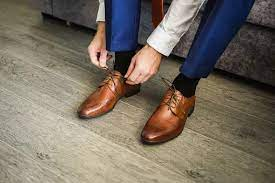

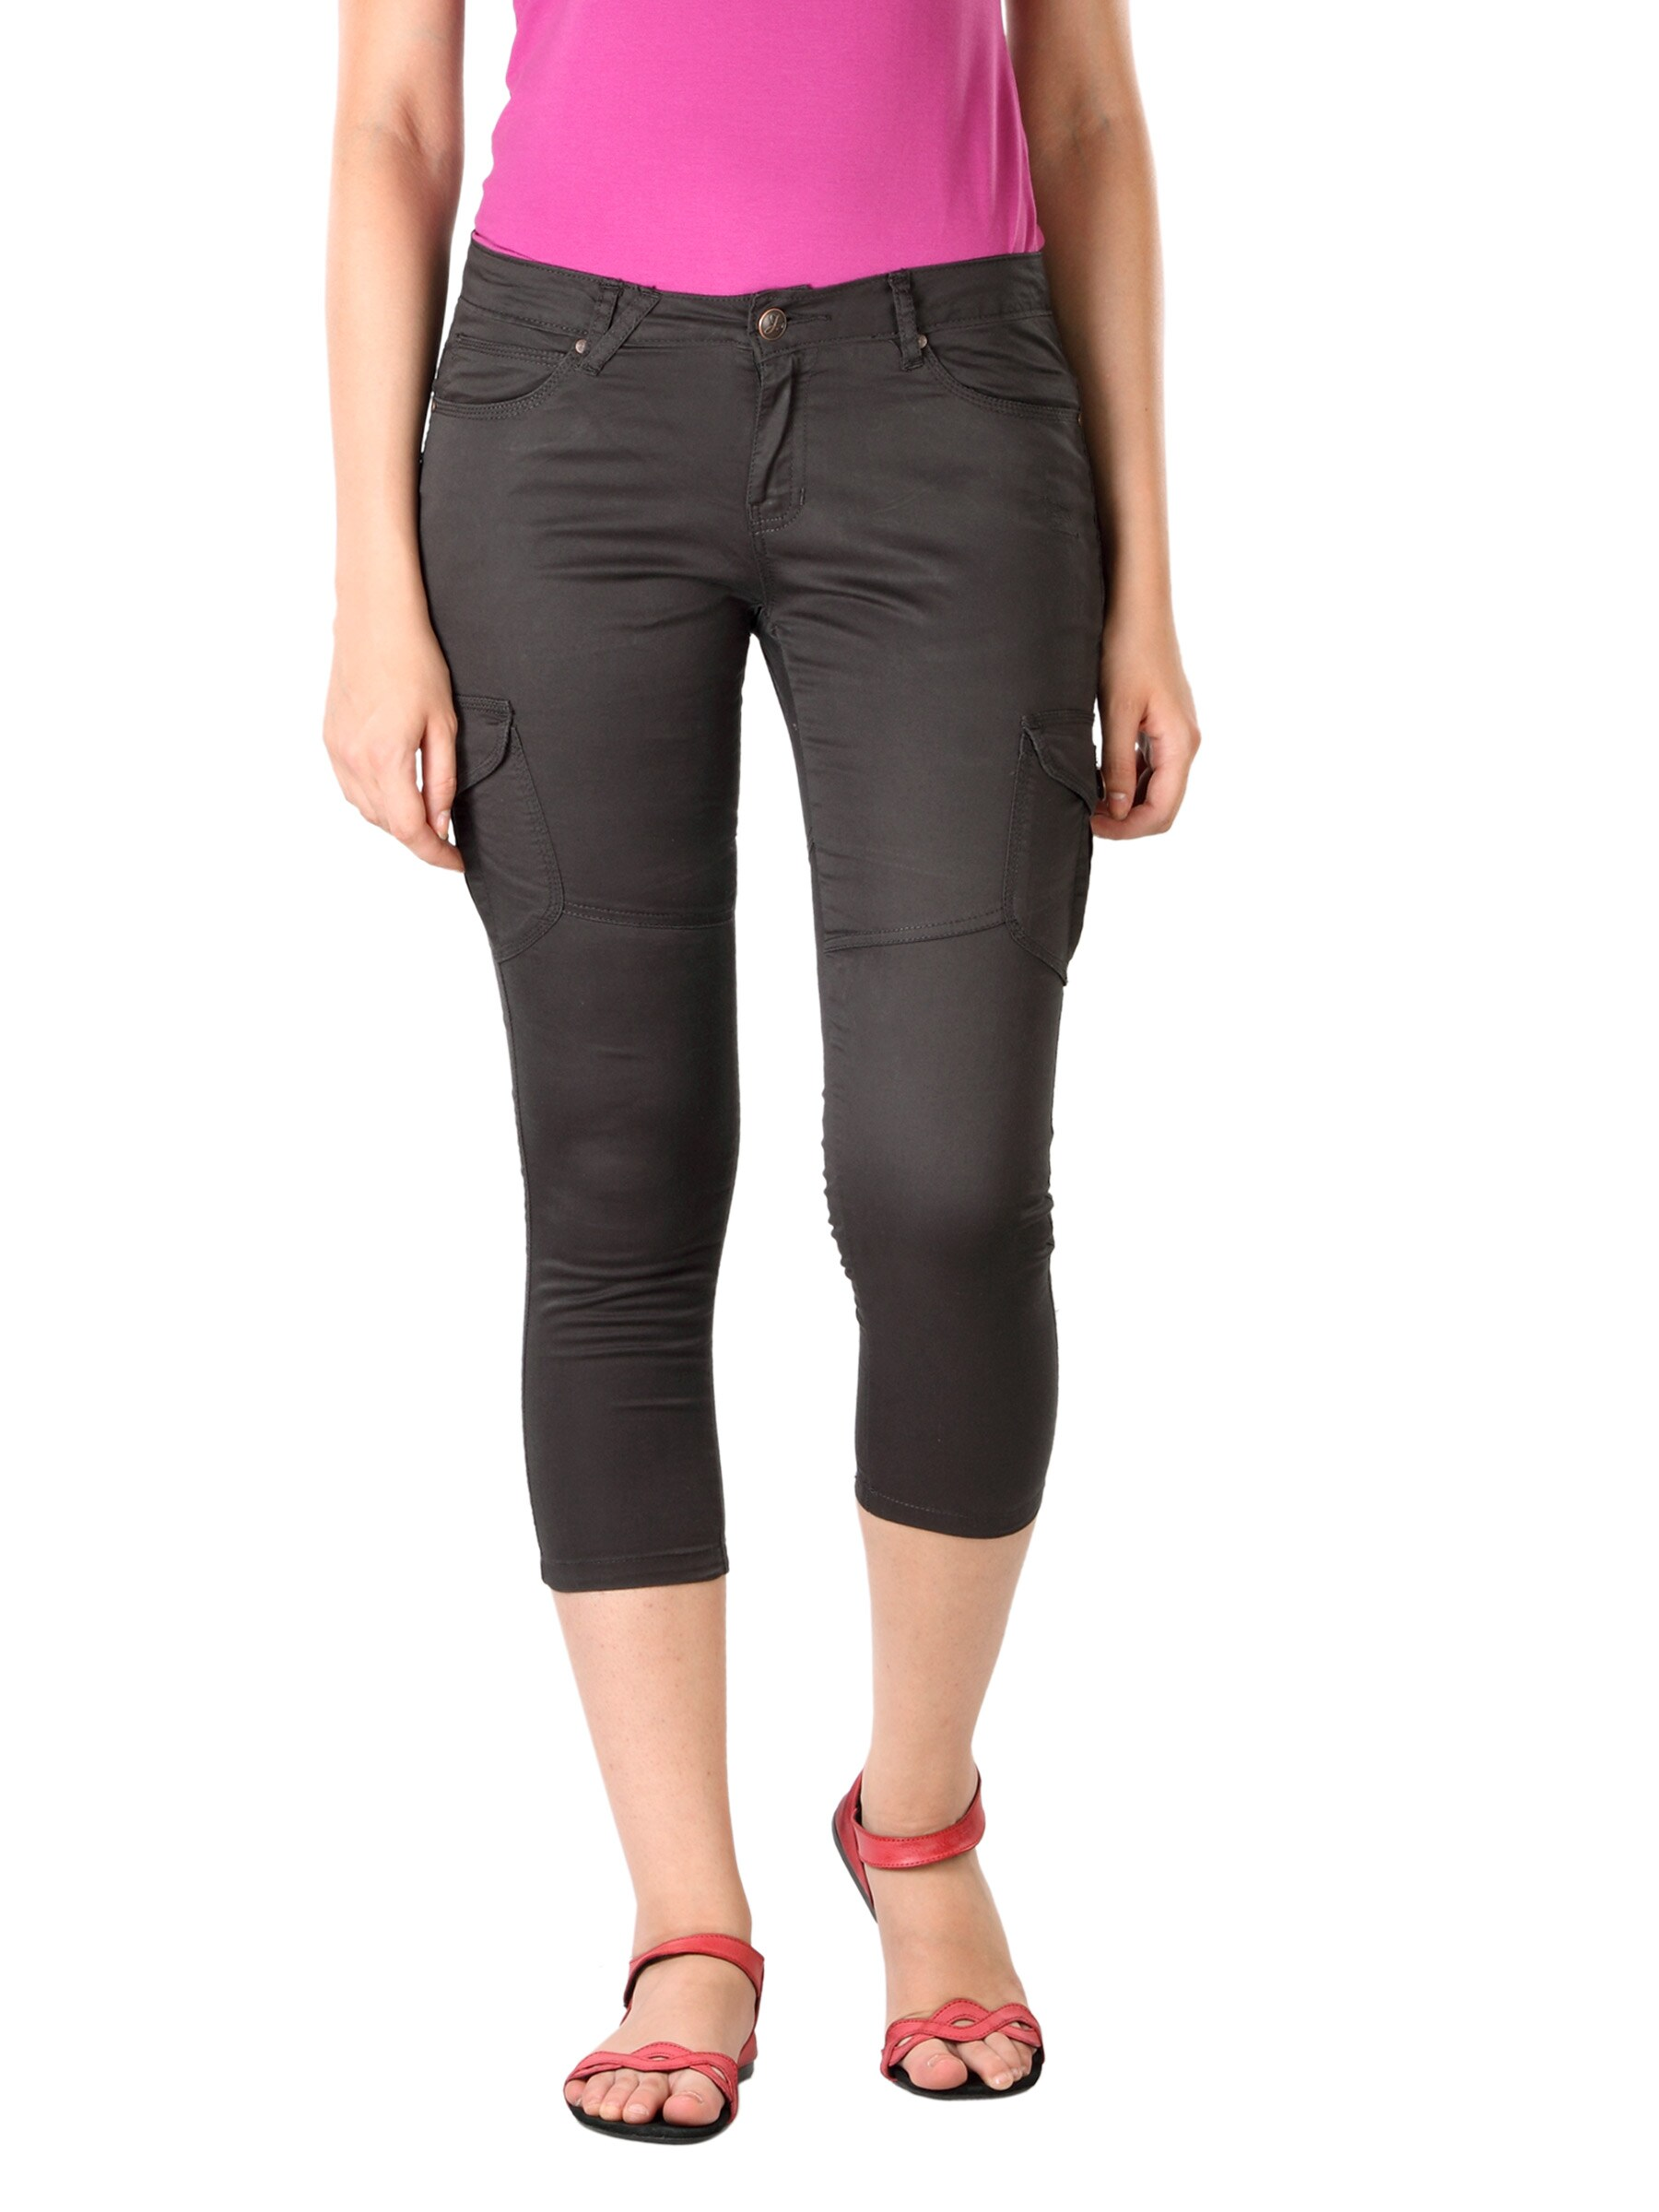

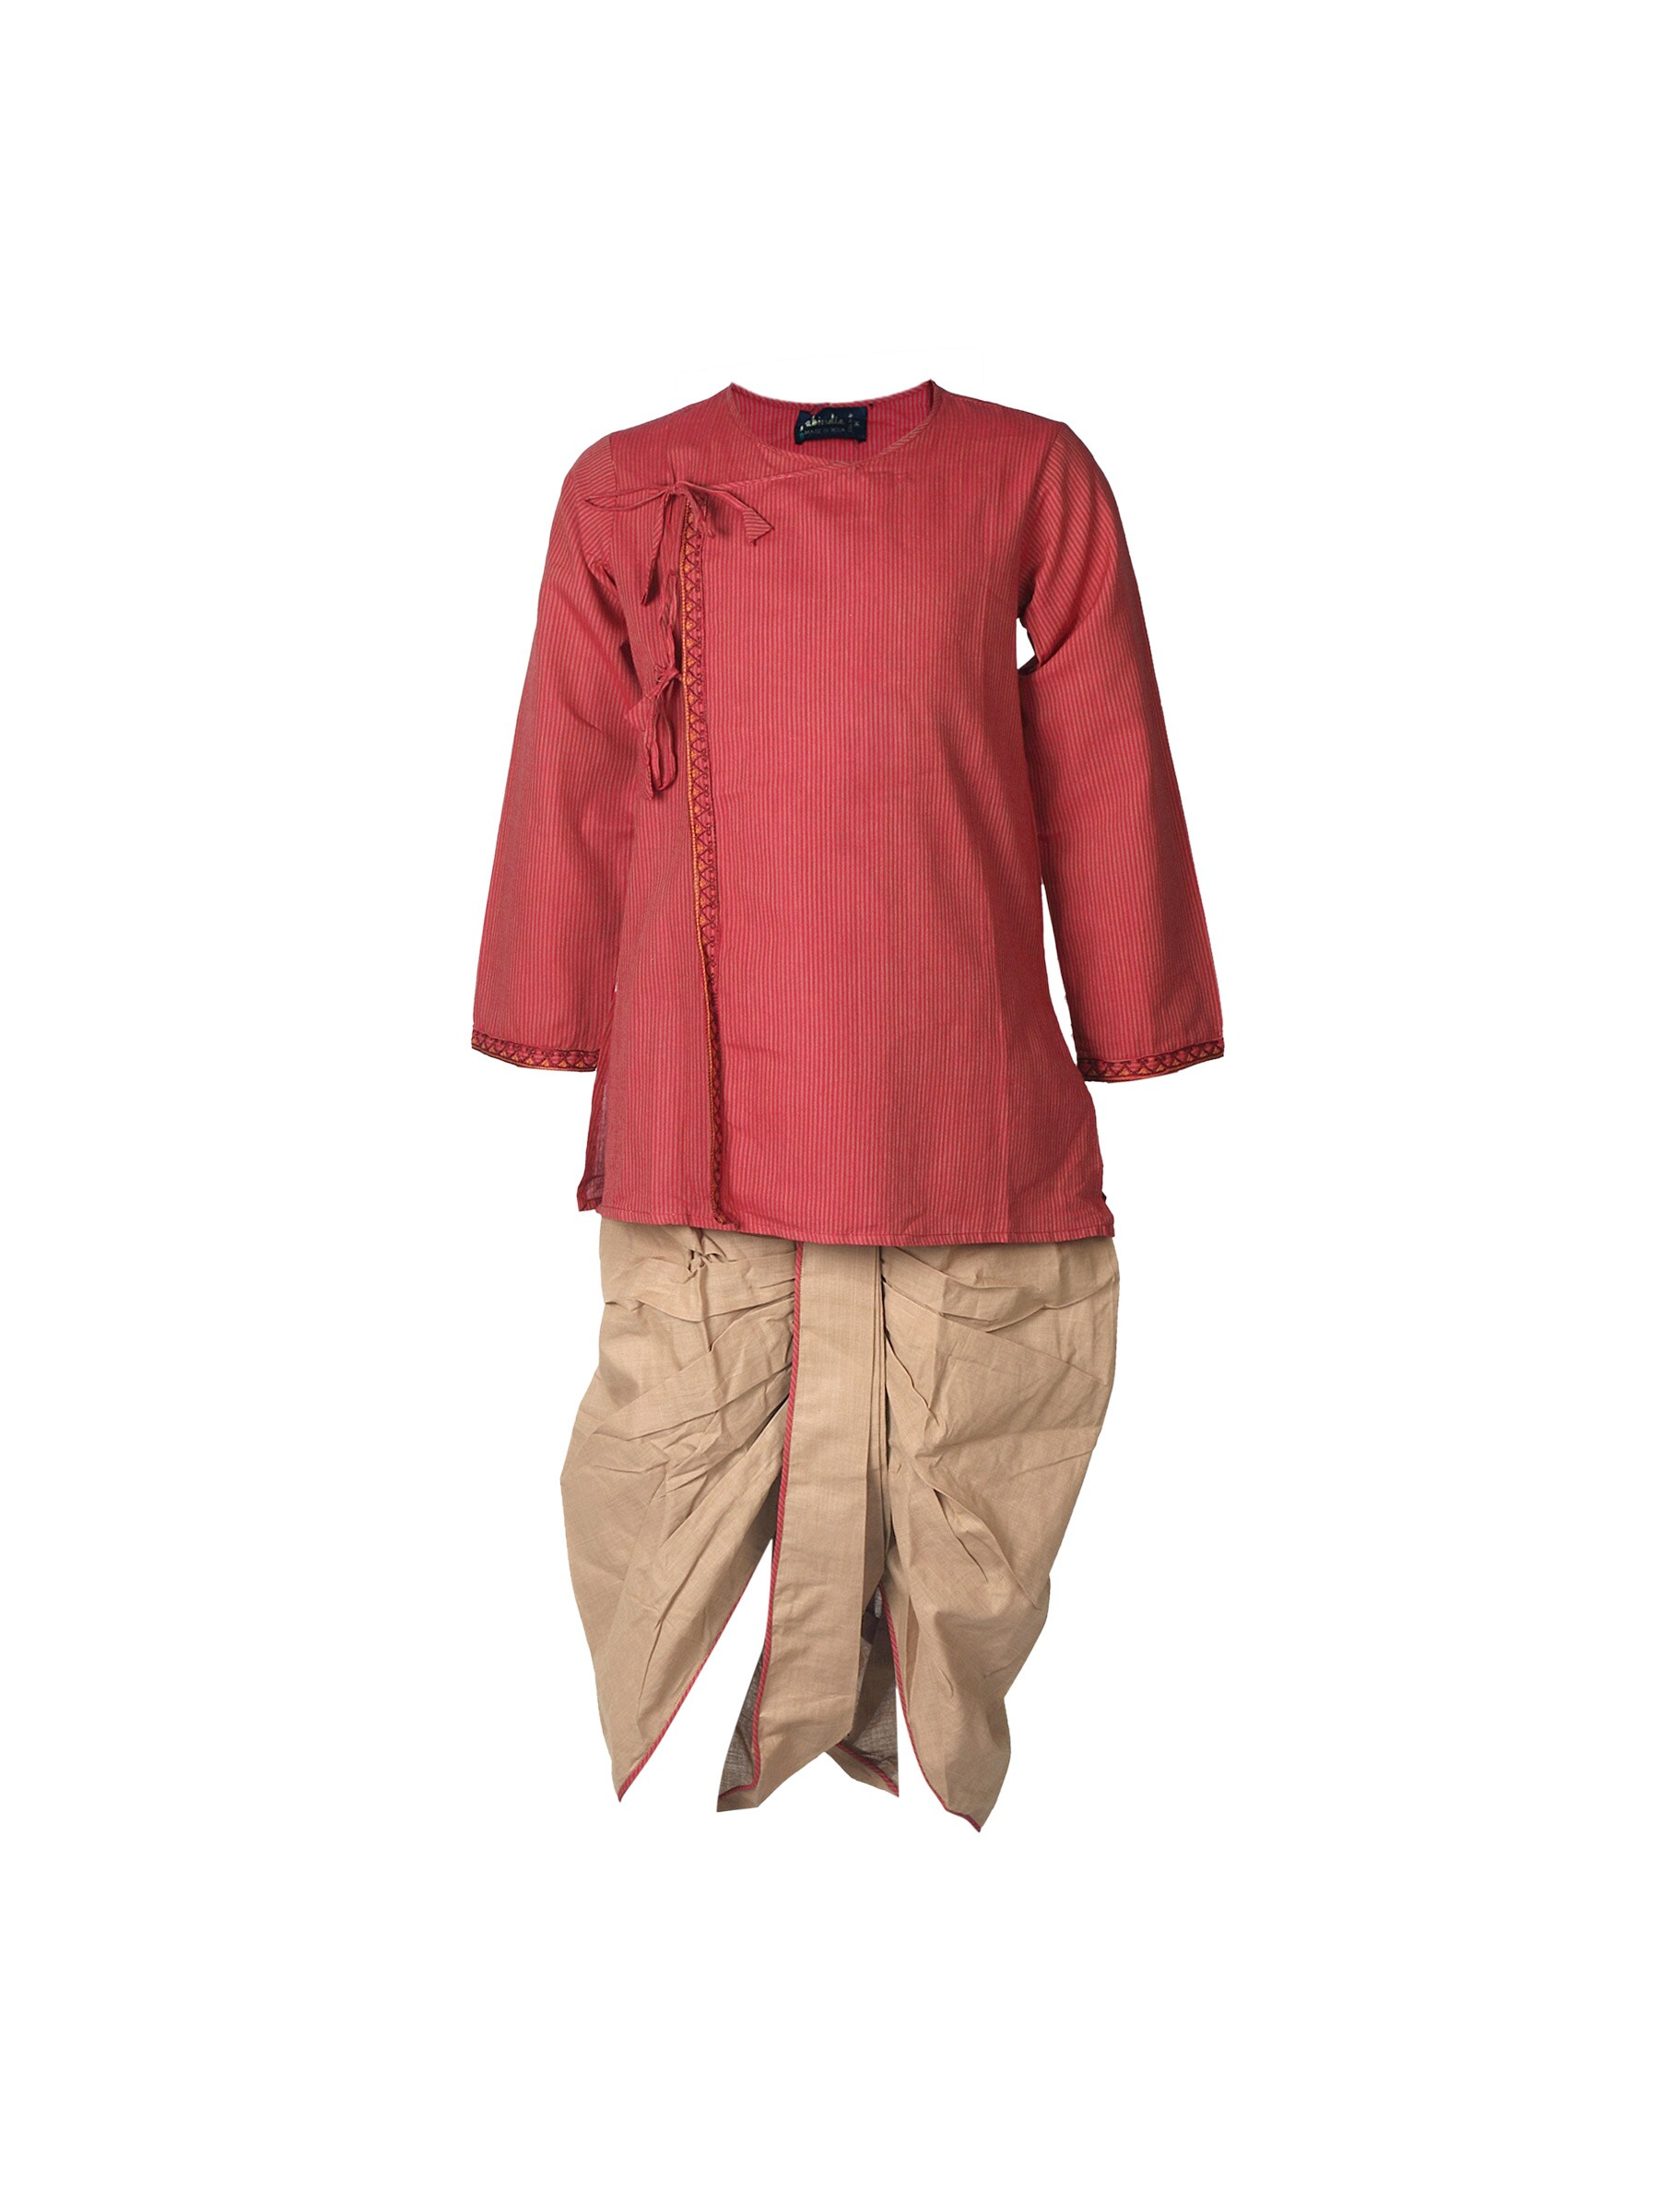

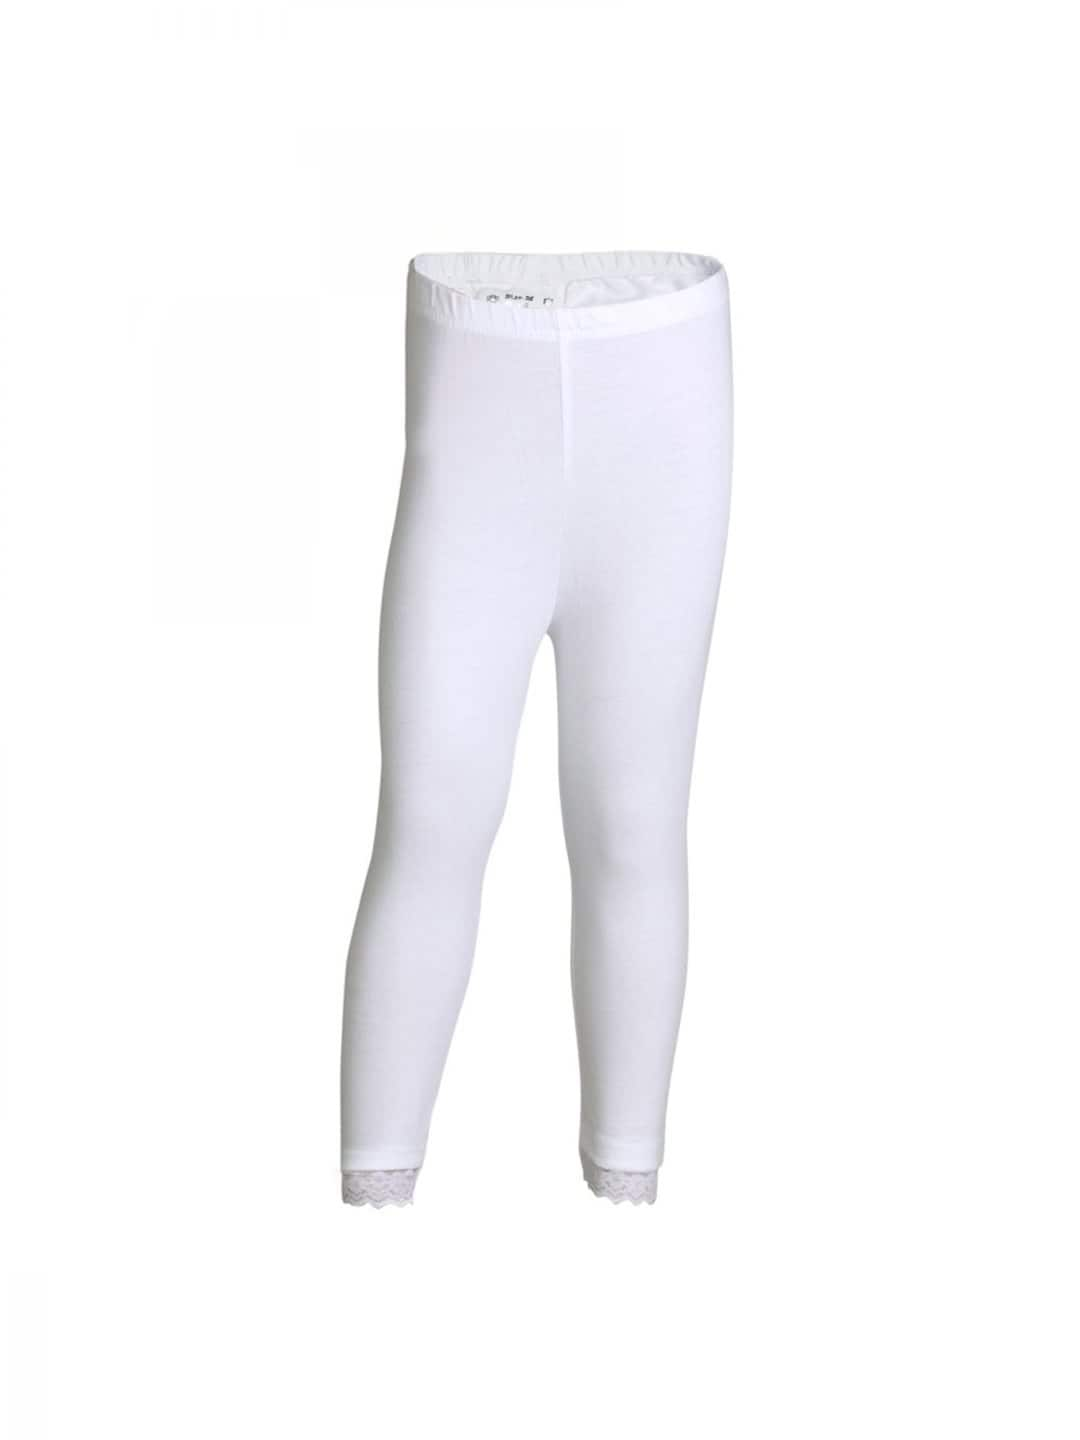

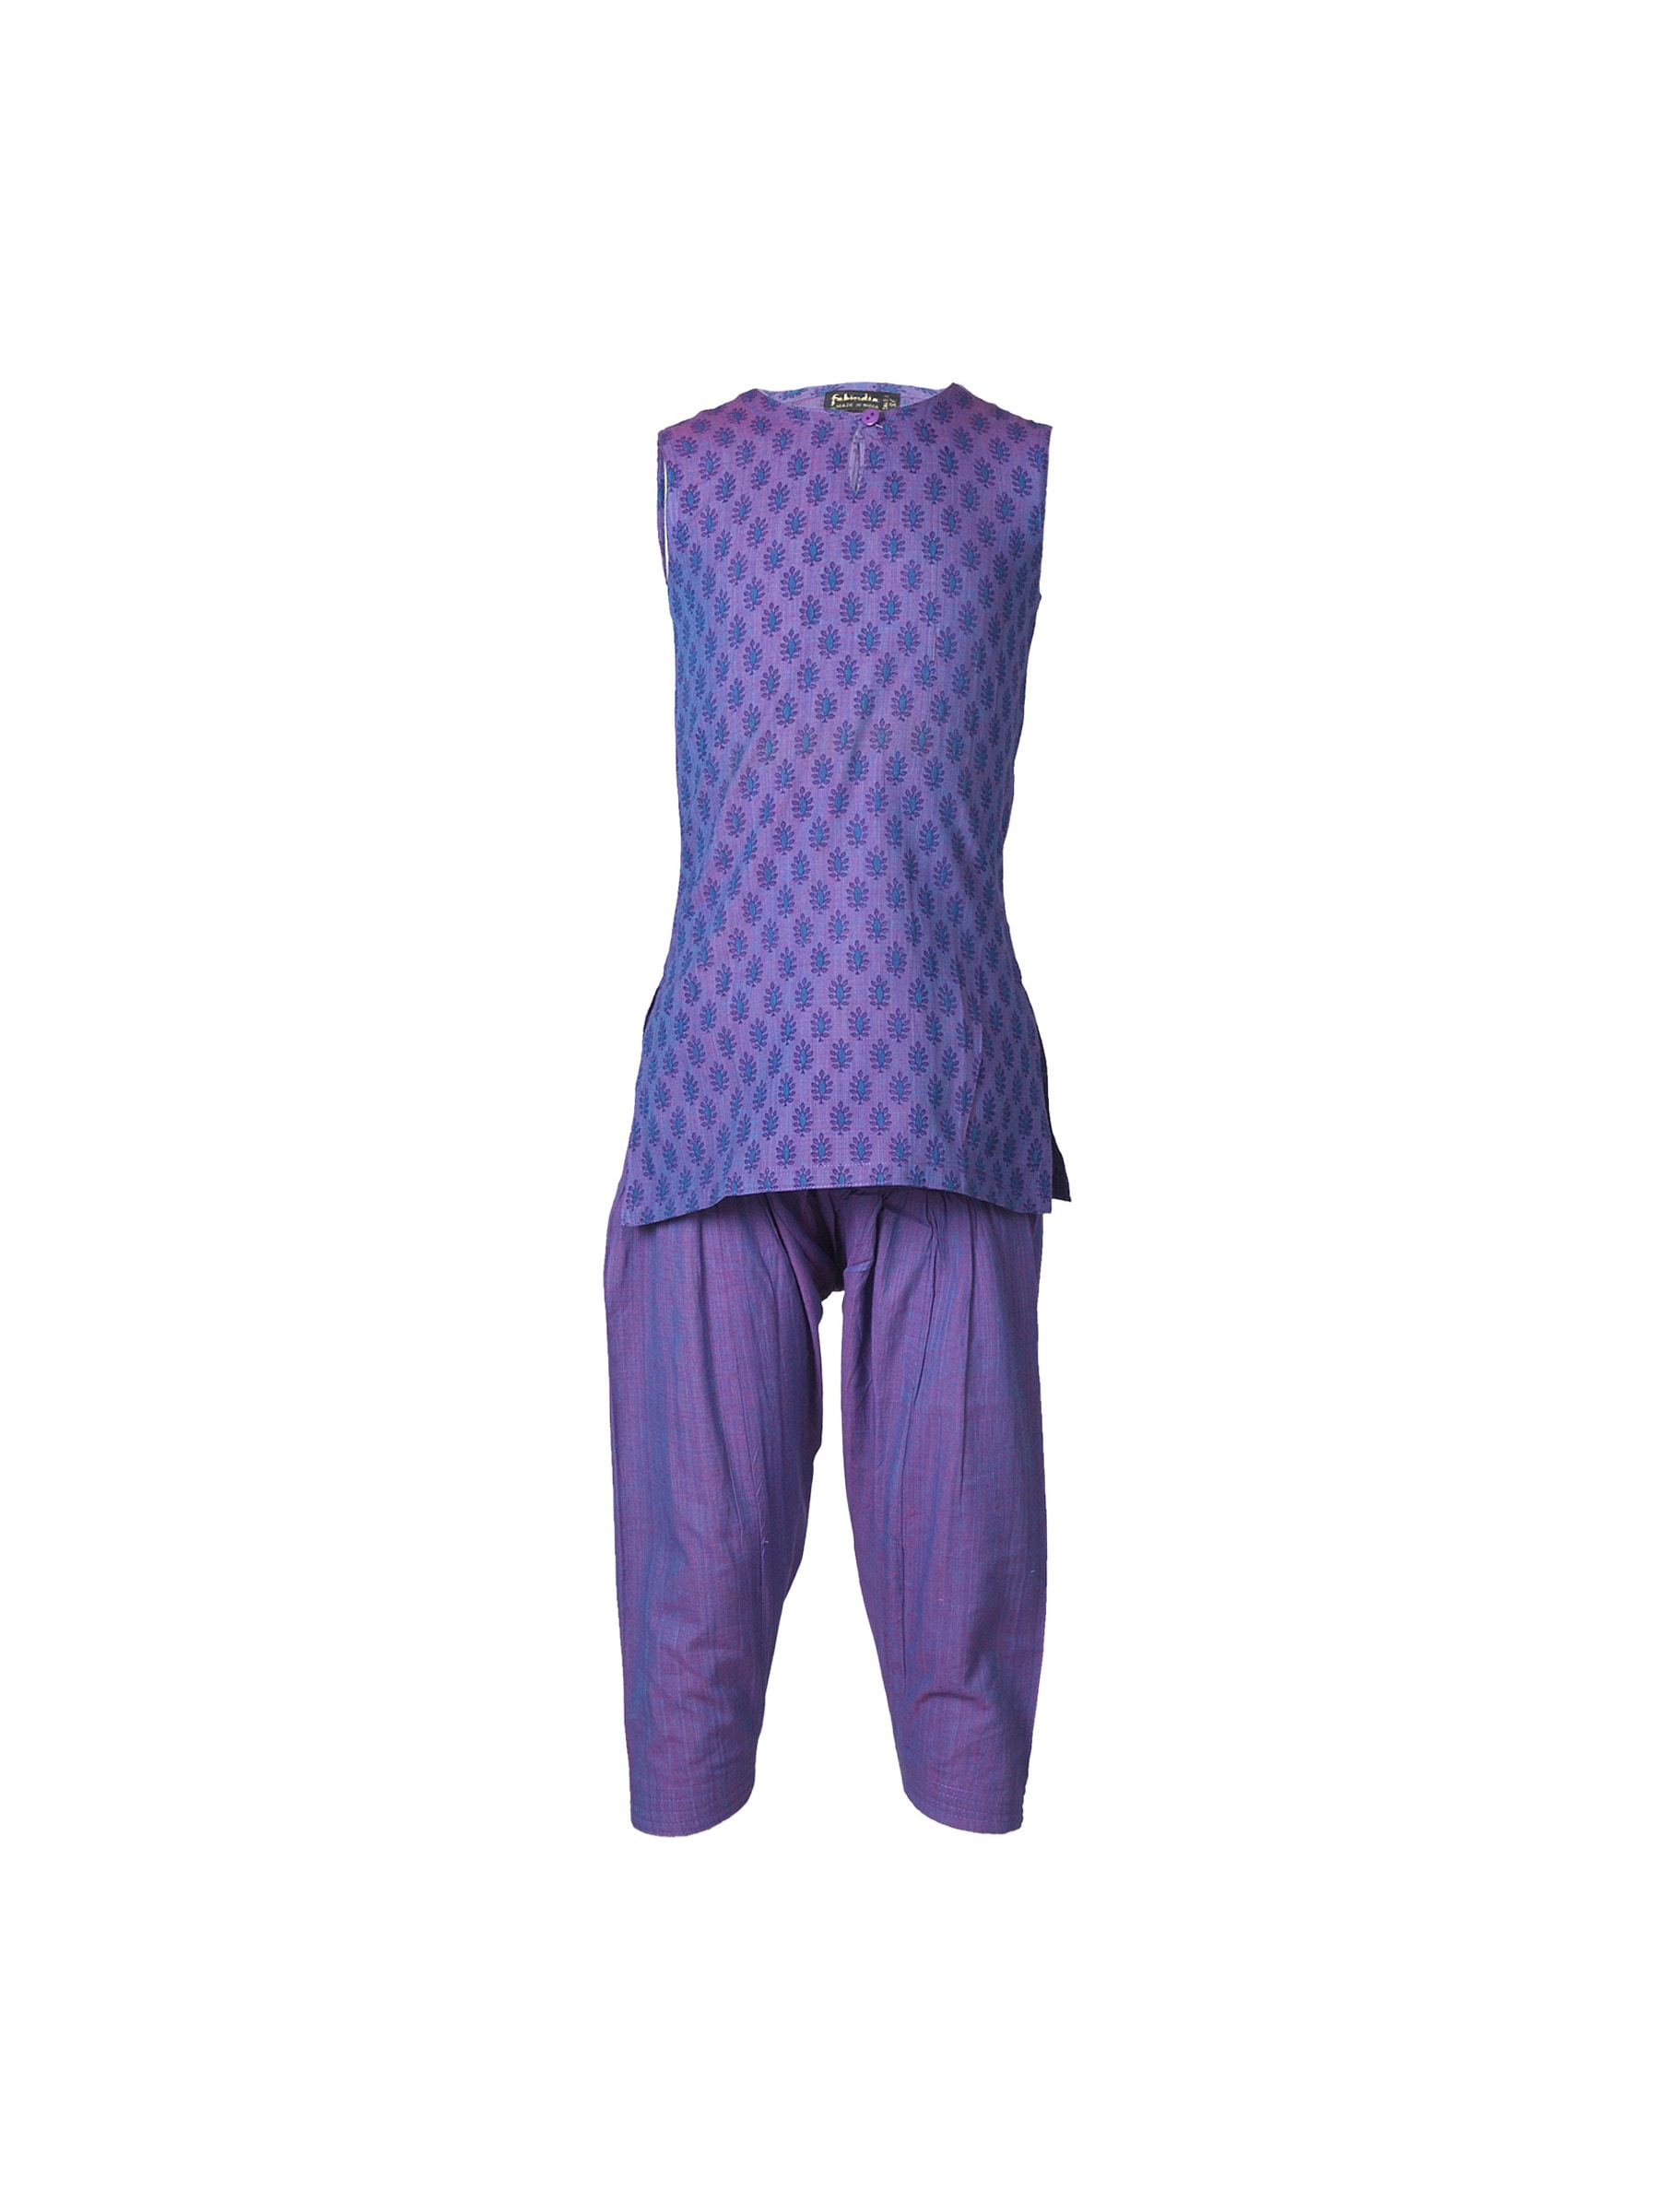

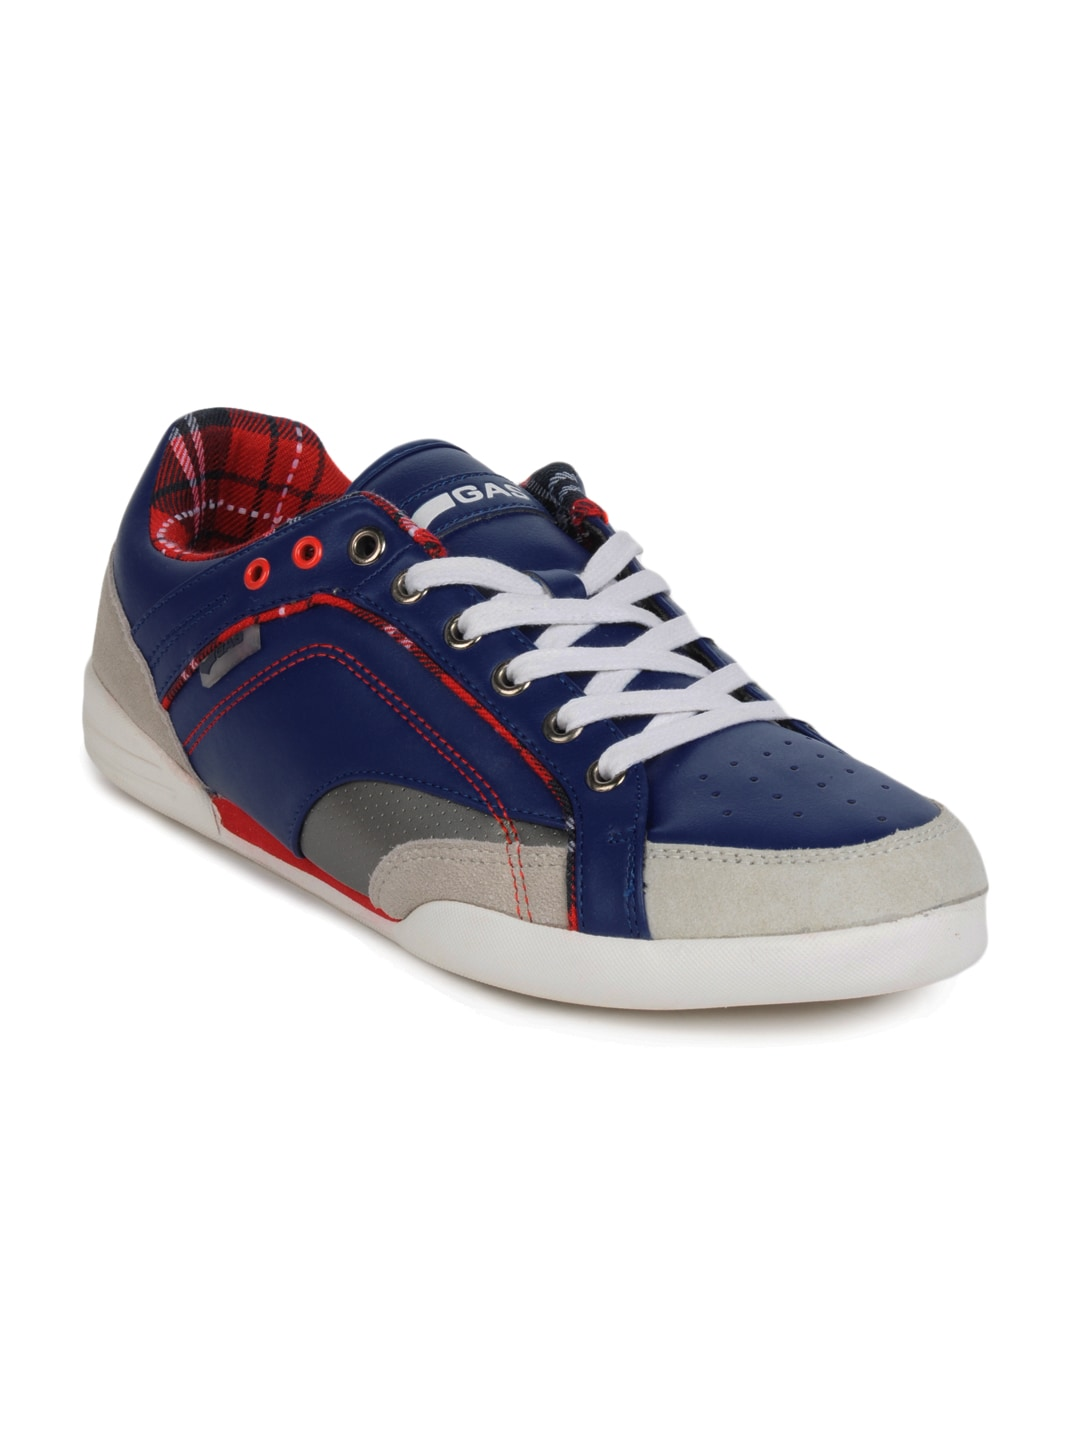

In [ ]:

featurelist=np.array(pickle.load(open('/content/drive/MyDrive/featurevector.pkl','rb')))
filename=pickle.load(open('/content/drive/MyDrive/filepaths.pkl','rb'))




#  import nearest neighbour
from sklearn.neighbors import NearestNeighbors

#  create object of nearest neighbour
model_knn=NearestNeighbors(metric='euclidean',algorithm='brute',n_neighbors=5)

#  fit the data
model_knn.fit(featurelist)

#  test image path
test_img_path=r"/content/download.jpeg"

#  extract feature of test image
test_img_feature=feature_extraction(test_img_path,model)

#  find the nearest neighbour of test image
distances,indices=model_knn.kneighbors([test_img_feature])

#  show the test image
cv2_imshow(cv2.imread(test_img_path))

#  show the similar images
for i in indices[0][:6]:
    # for j in i:
    img=cv2.imread(filename[i])
    # cv2.resize(img,(224,224))
    cv2_imshow(img)
    # cv2_imshow(img)

#  show the distance of similar images



In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 65.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 22.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 111.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 37.0 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19579 sha256=1e1f5aa82f7fa54d5a9cada324a1c74cbe641e7710a3de69d2c72a20a9059746
  Stored in directory: /root/.cache/pip/wheels/f2/ed/dd/d3a556ad245ef9dc570c6bcd2f22886d17b0b408dd3bbb9ac3
Successfully built validators
  Attempting uninstall: tzlocal
    Found existing installation: tzlocal 5.0.1
    Uninstalling tzlo

In [ ]:
%%writefile app.py


import streamlit as st
import streamlit as st
import os
from PIL import Image
import numpy as np
import pickle
import tensorflow
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from sklearn.neighbors import NearestNeighbors
from numpy.linalg import norm
import cv2






st.title('Man & Women Fashion Recommender System')

def save_uploaded_file(uploaded_file):
    try:
        with open(os.path.join('uploads',uploaded_file.name),'wb') as f:
            f.write(uploaded_file.getbuffer())
        return 1
    except:
        return 0



def recommend(features,feature_list):
    neighbors = NearestNeighbors(n_neighbors=6, algorithm='brute', metric='euclidean')
    neighbors.fit(feature_list)

    distances, indices = neighbors.kneighbors([features])

    return indices

# steps
# file upload -> save
uploaded_file = st.file_uploader("Choose an image")
print(uploaded_file)
if uploaded_file is not None:
    if save_uploaded_file(uploaded_file):
        # display the file
        display_image = Image.open(uploaded_file)
        resized_img = display_image.resize((200, 200))
        st.image(resized_img)
        # feature extract
        features = extract_feature(os.path.join("uploads",uploaded_file.name),model)
        #st.text(features)
        # recommendention
        indices = recommend(features,feature_list)
        # show
        col1,col2,col3,col4,col5 = st.columns(5)

        with col1:
            st.image(filenames[indices[0][0]])
        with col2:
            st.image(filenames[indices[0][1]])
        with col3:
            st.image(filenames[indices[0][2]])
        with col4:
            st.image(filenames[indices[0][3]])
        with col5:
            st.image(filenames[indices[0][4]])
    else:
        st.header("Some error occured in file upload")


Writing app.py
